## Covid Bayes Net


First we create a Pomegranate Bayesian Network using the protobuf interface and our utility package, bayes, that enables one to conveniently create a Bayesian network by hand without having to fill in every probability.  The same Baysian network can start with our hand entered guesses, but can later learn from data.  Any amount of questions can be answered, including no questions, to get the probabilities of having covid , the severity of illness, and the chances of going to the hospital.  The file the Bayesian net is written in is covid_bayes.py.  Our utility package can then be used to query the network with different patient states.  This is convenient for tuning hand entered parameters .



In [23]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install -e ../covid-bayesnet
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install datetime




Obtaining file:///home/opencog/covid-bayesnet
  Attempting uninstall: covid-bayes
    Found existing installation: covid-bayes 1.0
    Can't uninstall 'covid-bayes'. No files were found to uninstall.
  Running setup.py develop for covid-bayes


In [24]:
!{sys.executable} -m pip install -r requirements.txt
!sh buildproto.sh

### Covid net
Here put the name of the network you have written with the protobuf and bayes utilities.  Our example is printed out.  We created 4 functions in our utility package: any_of, all_of, if_the_else, and avg, which can together be used to express almost any set of rules, documented elsewhere.  The last lines implement the creation of the description of the network,  bayesianNetwork , with the protobuf utilities, and then the creation of the Pomegranate network with the description.  

In [25]:
text_file = open('./sn_bayes/covid_bayes.py')
file_content = text_file.read()
print(file_content)
text_file.close()

import sn_bayes
from sn_bayes.utils import any_of
from sn_bayes.utils import all_of
from sn_bayes.utils import avg
from sn_bayes.utils import if_then_else
from sn_bayes.utils import bayesInitialize
from sn_bayes.utils import addCpt


import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import BayesianNetwork


def covid_bayes():
	bayesianNetwork = BayesianNetwork()



	#probabilities within distributions must sum to 1.0
	#questions left blank or "prefer not to answer" will be computed

	#anomalies
	
	anomaly = bayesianNetwork.anomalies.add()
	anomaly.varName = "oxygen_anomaly"
	anomaly.high = 200
	anomaly.low =93
	anomaly.high_percent = 0.99
	anomaly.low_percent = 0.10
	anomaly.n = 2
	anomaly.is_all = True
	detectors = anomaly.detectors.add()
	detectors.name = "QuantileAD"
	detectors = anomaly.detectors.add()
	detectors.name = "ThresholdAD"


	anomaly = bayesianNetwork.anomalies.add()
	anomaly.varName = "heart_rate_anomaly"
	anomaly.n_steps = 14
	anomal

 Next run the file and print the rules in it in human readable format.  All routines are stateless.

In [112]:
import sn_bayes
from sn_bayes import covid_bayes
#%run -i './bayes/covid_bayes.py'
#%run -i './bayes/test.py'
bayesianNetwork, outstr = covid_bayes.covid_bayes()
print (outstr)

covid_test has the value of positive_covid_test if swab_test has the value of swab_test_positive, OR antibody_test has the value of antibody_test_positive, OR saliva_test has the value of saliva_test_positive; otherwise covid_test has the value of negative_covid_test.

metabolic_disease has the value of metabolic_disease if the values of cardiovascular_disease and diabetes and hypertension average to the highest level of risk. metabolic_disease has the value of no_metabolic_disease if the values of cardiovascular_disease and diabetes and hypertension average to the next highest level of risk. 

cancer_related has the value of cancer_related if the values of cancer and immunocompromised average to the highest level of risk. cancer_related has the value of no_cancer_related if the values of cancer and immunocompromised average to the next highest level of risk. 

lung_or_kidney_disease has the value of lung_or_kidney_disease if lung_disease has the value of lung_disease, OR kidney_diseas

For convenience of creating a table, here are all the variables in the net in order.  They should be mapped into the individual buckets of the rules.  The variables up to "systemically_disadvantaged" are the ones that the user may answer.  The rest are computed.

In [27]:
import sn_bayes
from sn_bayes.utils import complexity_check
complexity_check(bayesianNetwork)

(True, '')

In [28]:
import sn_bayes
from sn_bayes.utils import get_var_positions
var_positions = get_var_positions(bayesianNetwork)
var_positions

{'cough_test': 0,
 'vaccination': 1,
 'local_caserate': 2,
 'age': 3,
 'sex': 4,
 'height_in_feet': 5,
 'weight_in_pounds': 6,
 'psychological_disorders': 7,
 'cardiovascular_disease': 8,
 'diabetes': 9,
 'hypertension': 10,
 'lung_disease': 11,
 'kidney_disease': 12,
 'cancer': 13,
 'immunocompromised': 14,
 'body_temperature': 15,
 'shortness_of_breath': 16,
 'cough': 17,
 'rash_or_skin_discoloration': 18,
 'muscle_weakness': 19,
 'difficulty_moving': 20,
 'neck_stiffness': 21,
 'low_urine': 22,
 'frequent_diarrhea': 23,
 'nausea': 24,
 'vomiting': 25,
 'decreased_smell_or_taste': 26,
 'sore_throat': 27,
 'pink_eye': 28,
 'headache': 29,
 'feeling_well': 30,
 'congestion': 31,
 'fatigue': 32,
 'muscle_aches_or_body_pain': 33,
 'abdominal_pain': 34,
 'own_thermometer': 35,
 'breathing_problems_at_night': 36,
 'bmi': 37,
 'known_exposure': 38,
 'employment_risk': 39,
 'close_contact_unknown_exposure': 40,
 'chest_pain_independent_of_breath': 41,
 'self_quarantine_two_weeks': 42,
 'isol

Here are the positions of every bucketed response for each of the above variables:

In [29]:
import sn_bayes
from sn_bayes.utils import get_var_val_positions
var_val_positions = get_var_val_positions(bayesianNetwork)
var_val_positions

{'cough_test': {'strong_positive_cough_test': 0,
  'positive_moderate_cough_test': 1,
  'positive_mild_cough_test': 2,
  'positive_asymp_cough_test': 3,
  'healthy_cough_test': 4},
 'vaccination': {'no_vaccination': 0,
  'incomplete_vaccination': 1,
  'complete_unknown_other_Janssen_Sinovac': 2,
  'complete_Astrozeneca_Covaxin_Sinopharm': 3,
  'complete_Pfizer_Moderna_Sputnik': 4},
 'local_caserate': {'many_new_local_cases': 0,
  'moderate_new_local_cases': 1,
  'few_new_local_cases': 2,
  'no_new_local_cases': 3},
 'age': {'elderly': 0, 'adult': 1, 'young_adult': 2, 'teen': 3, 'child': 4},
 'sex': {'male': 0, 'female': 1},
 'height_in_feet': {'height_above_seven': 0,
  'height_six_to_seven': 1,
  'height_five_to_six': 2,
  'height_four_to_five': 3,
  'height_under_four': 4},
 'weight_in_pounds': {'weight_over_250': 0,
  'weight_175_to_250': 1,
  'weight_125_to_175': 2,
  'weight_100_to_125': 3,
  'weight_under_100': 4},
 'psychological_disorders': {'psychological_disorders': 0,
  'no_

We create a spreadsheet of the above for reference

In [30]:
import pandas as pd

rows_list = []
outname = "varvals.csv"
for var, valdict in var_val_positions.items():
    rowdict = {} 
    rows_list.append(rowdict)
    varstr= var +"("
    for val, pos in valdict.items():
        varstr += val
        varstr+= ","
            
    varstr=varstr[:-1]+")"
    rowdict["variable"] = varstr        

df = pd.DataFrame(rows_list)      
df.to_csv(outname, index = False)

Here we create a spreadsheet that makes a Cartesian product of desired outputs with the remainder of the variables. This can be used to, for example, fill in a treatment recommendation for variables that are returned as causing the output in the explanation module 

In [31]:
import pandas as pd
#cols = ["leaves","internal","output"]
desired_output =['social_distancing',
                 'emergency_treatment',
                 'covid_risk',
                 'covid_severity',
                 'anomalous_wearables',
                'self_care']
rows_list = []
outname = "upshot.csv"

#put leaves in the first column, then internal vars along with the vars that feed them in the second.  
#and do a cartesian product with the outvars that are also internal vars (should be all of them)

for output in desired_output:
    for dist in bayesianNetwork.discreteDistributions:
        print(dist.name)
        rowdict = {} 
        rowdict["leaves"]= dist.name
        rowdict["internal"]=""
        rowdict["output"]= output
        rows_list.append(rowdict)
    for table in bayesianNetwork.conditionalProbabilityTables:
        print ("table: {}".format(table.name))
        rowdict = {}
        rowdict["leaves"]=""
        internal_str = table.name + " ("
        for var in table.randomVariables:
            print(var.name)
            internal_str += var.name
            internal_str+= ","         
        internal_str=internal_str[:-1]+")"
        rowdict["internal"] = internal_str
        rowdict["output"]= output
        rows_list.append(rowdict)

for dist in bayesianNetwork.discreteDistributions:
    print(dist.name)
    rowdict = {} 
    rowdict["leaves"]= dist.name
    rowdict["internal"]=""
    rowdict["output"]= ""
    rows_list.append(rowdict)
for table in bayesianNetwork.conditionalProbabilityTables:
    print ("table: {}".format(table.name))
    rowdict = {}
    rowdict["leaves"]=""
    internal_str = table.name + " ("
    for var in table.randomVariables:
        print(var.name)
        internal_str += var.name
        internal_str+= ","         
    internal_str=internal_str[:-1]+")"
    rowdict["internal"] = internal_str
    rowdict["output"]= ""
    rows_list.append(rowdict)
    
df = pd.DataFrame(rows_list)      
df.to_csv(outname, index = False)

cough_test
vaccination
local_caserate
age
sex
height_in_feet
weight_in_pounds
psychological_disorders
cardiovascular_disease
diabetes
hypertension
lung_disease
kidney_disease
cancer
immunocompromised
body_temperature
shortness_of_breath
cough
rash_or_skin_discoloration
muscle_weakness
difficulty_moving
neck_stiffness
low_urine
frequent_diarrhea
nausea
vomiting
decreased_smell_or_taste
sore_throat
pink_eye
headache
feeling_well
congestion
fatigue
muscle_aches_or_body_pain
abdominal_pain
own_thermometer
breathing_problems_at_night
bmi
known_exposure
employment_risk
close_contact_unknown_exposure
chest_pain_independent_of_breath
self_quarantine_two_weeks
isolation_space
leaving_house_per_day
high_risk_place_per_week
disinfection_of_communal_objects_or_hand_sanitizer
deliveries_per_week
sanitization_of_deliveries
mask
public_transportation_per_two_weeks
workplace_social_distancing
daily_contacts_social_distancing
visits_per_week
wash_hands_per_day
tested
swab_test
antibody_test
saliva_test

chest_pain_independent_of_breath
cough
serious_shortness_of_breath
table: possible_dehydration_or_meningitis
possible_dehydration
possible_meningitis
table: emergency_treatment
cardiopulmonary_emergency
possible_dehydration_or_meningitis
table: covid_risk
high_covid
medium_exposure
table: covid_risk_binary
covid_risk
table: testing_compliance
tested
covid_risk
table: quarantine_compliance
self_quarantine_two_weeks
covid_risk
table: self_care
isolation_space
testing_compliance
quarantine_compliance
own_thermometer
table: covid_severity
age
comorbidities
cough_test
table: covid_severity_binary
covid_severity
cough_test
vaccination
local_caserate
age
sex
height_in_feet
weight_in_pounds
psychological_disorders
cardiovascular_disease
diabetes
hypertension
lung_disease
kidney_disease
cancer
immunocompromised
body_temperature
shortness_of_breath
cough
rash_or_skin_discoloration
muscle_weakness
difficulty_moving
neck_stiffness
low_urine
frequent_diarrhea
nausea
vomiting
decreased_smell_or_tast

In [32]:
df

internal  \
0                                                        
1                                                        
2                                                        
3                                                        
4                                                        
5                                                        
6                                                        
7                                                        
8                                                        
9                                                        
10                                                       
11                                                       
12                                                       
13                                                       
14                                                       
15                                                       
16                                                       
17                                                       
18                                                       
19                                                       
20                                                       
21                                                       
22                                                       
23                                                       
24                                                       
25                                                       
26                                                       
27                                                       
28                                                       
29                                                       
..                                                 ...   
775  social_distancing_following (social_distancing...   
776    social_distancing (social_distancing_following)   
777       social_distancing_binary (social_distancing)   
778  normal_activity_heart_rate_anomaly (heart_rate...   
779  anomalous_wearables (heart_rate_variability_an...   
780   anomalous_wearables_binary (anomalous_wearables)   
781  possible_dehydration (low_urine,vomiting,frequ...   
782  possible_meningitis (neck_stiffness,body_tempe...   
783  serious_shortness_of_breath (shortness_of_brea...   
784  covid_vulnerabilities (anomalous_wearables,cov...   
785  covid_symptom_level (body_temperature,cough,co...   
786  covid_environment (social_distancing,covid_sym...   
787  high_risk_covid_environment_unvaccinated (covi...   
788  medium_risk_covid_environment_unvaccinated (co...   
789  low_risk_covid_environment_unvaccinated (covid...   
790       local_cases (hotspot_anomaly,local_caserate)   
791  high_exposure (local_cases,high_risk_covid_env...   
792  known_exposure_unvaccinated (known_exposure,va...   
793  high_covid (known_exposure_unvaccinated,covid_...   
794  medium_exposure (local_cases,medium_risk_covid...   
795  cardiopulmonary_emergency (breathing_problems_...   
796  possible_dehydration_or_meningitis (possible_d...   
797  emergency_treatment (cardiopulmonary_emergency...   
798            covid_risk (high_covid,medium_exposure)   
799                     covid_risk_binary (covid_risk)   
800             testing_compliance (tested,covid_risk)   
801  quarantine_compliance (self_quarantine_two_wee...   
802  self_care (isolation_space,testing_compliance,...   
803      covid_severity (age,comorbidities,cough_test)   
804             covid_severity_binary (covid_severity)   

                         leaves             output  
0                    cough_test  social_distancing  
1                   vaccination  social_distancing  
2                local_caserate  social_distancing  
3                           age  social_distancing  
4                           sex  social_distancing  
5                height_in_feet  social_distancing  
6              weight_in_pounds  social_distancing  
7       psychological_dis

Here is a one more csv that uses a utility function to express the net in  a tree form, in a data frame and then prints it out 

In [33]:
import sn_bayes
from sn_bayes.utils import make_tree
import pandas as pd
df = make_tree(bayesianNetwork)
outname = "tree.csv"
df.to_csv(outname, index = False)

In [34]:
df

level0  \
0                                         cough_test)   
1                                        vaccination)   
2                                     local_caserate)   
3                                                age)   
4                                                sex)   
5                                     height_in_feet)   
6                                   weight_in_pounds)   
7                            psychological_disorders)   
8                             cardiovascular_disease)   
9                                           diabetes)   
10                                      hypertension)   
11                                      lung_disease)   
12                                    kidney_disease)   
13                                            cancer)   
14                                 immunocompromised)   
15                                  body_temperature)   
16                               shortness_of_breath)   
17                                             cough)   
18                        rash_or_skin_discoloration)   
19                                   muscle_weakness)   
20                                 difficulty_moving)   
21                                    neck_stiffness)   
22                                         low_urine)   
23                                 frequent_diarrhea)   
24                                            nausea)   
25                                          vomiting)   
26                          decreased_smell_or_taste)   
27                                       sore_throat)   
28                                          pink_eye)   
29                                          headache)   
..                                                ...   
34                                    abdominal_pain)   
35                                   own_thermometer)   
36                       breathing_problems_at_night)   
37                                               bmi)   
38                                    known_exposure)   
39                                   employment_risk)   
40                    close_contact_unknown_exposure)   
41                  chest_pain_independent_of_breath)   
42                         self_quarantine_two_weeks)   
43                                   isolation_space)   
44                             leaving_house_per_day)   
45                          high_risk_place_per_week)   
46  disinfection_of_communal_objects_or_hand_sanit...   
47                               deliveries_per_week)   
48                        sanitization_of_deliveries)   
49                                              mask)   
50               public_transportation_per_two_weeks)   
51                       workplace_social_distancing)   
52                  daily_contacts_social_distancing)   
53                                   visits_per_week)   
54                                wash_hands_per_day)   
55                                            tested)   
56                                         swab_test)   
57                                     antibody_test)   
58                                       saliva_test)   
59                                   hotspot_anomaly)   
60                                heart_rate_anomaly)   
61                                     steps_anomaly)   
62                    heart_rate_variability_anomaly)   
63                                    oxygen_anomaly)   

                                               level1  \
0     covid_test(swab_test,antibody_test,saliva_test)   
1   metabolic_disease(cardiovascular_disease,diabe...   
2            cancer_related(cancer,immunocompromised)   
3   lung_or_kidney_disease(lung_disease,kidney_dis...   
4   inflammation_symptoms(rash_or_skin_discolorati...   
5   head_and_neck_symptoms(neck_stiffness,pink_eye...   
6      cold_symptoms(fatigue,congestion,feeling_well)   
7   specific_covid_symptoms(decreased_smell_or_tas...   

In [35]:
import networkx as nx
import re

G = nx.DiGraph()
regex = re.compile(r'^([a-z_]*)\(.*')


for index, row in df.iterrows():
    for col in df.columns:
        if row[col] is not None:
            node = row[col][:-1] if col == "level0" else row[col]
            G.add_node(node)
            
for node1 in G.nodes:
    for node2 in G.nodes:
        match = regex.match(node1)
        if (node1+',' in node2) or (match is not None and match.group(1)+"," in node2): 
            G.add_edge(node1,node2)
            if match is not None and match.group(1)+"," in node2:
                print (node1)
                print(node2)
        

covid_test(swab_test,antibody_test,saliva_test)
high_covid(known_exposure_unvaccinated,covid_test,high_exposure,cough_test)
chronic_conditions(lung_or_kidney_disease,cancer_related,psychological_disorders)
comorbidities(chronic_conditions,metabolic_disease,bmi)
comorbidities(chronic_conditions,metabolic_disease,bmi)
covid_severity(age,comorbidities,cough_test)
covid_symptoms(sore_throat,gastrointestinal_symptoms,cold_and_flu_symptoms)
covid_vulnerabilities(anomalous_wearables,covid_symptoms,specific_covid_symptoms)
social_distancing(social_distancing_following)
covid_environment(social_distancing,covid_symptom_level)
social_distancing(social_distancing_following)
social_distancing_following(social_distancing_environment,personal_social_distancing,social_distancing_connectedness)
social_distancing(social_distancing_following)
social_distancing_environment(workplace_social_distancing,daily_contacts_social_distancing)
covid_environment(social_distancing,covid_symptom_level)
high_risk_covi

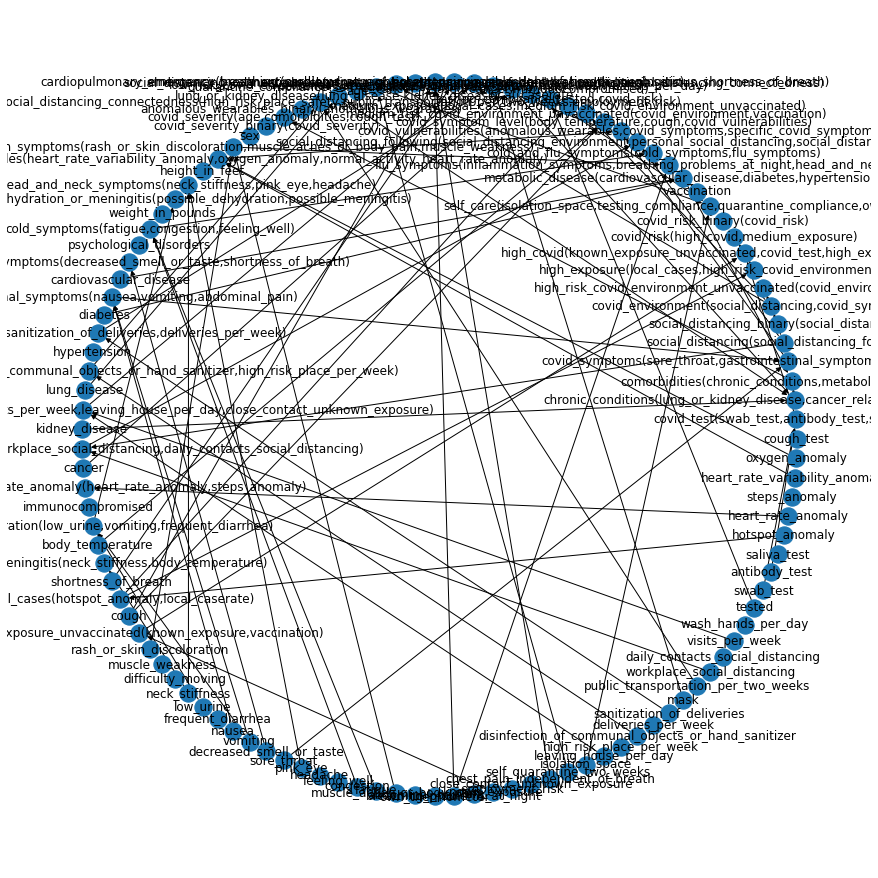

In [36]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(12,12)) 
#nx.draw(G, with_labels=True)  
#nx.draw_random(G, with_labels=True)   
nx.draw_circular(G, with_labels=True)  
#nx.draw_spectral(G, with_labels=True)   
#nx.draw_spring(G, with_labels=True)  

Here is the description of the Bayesian network in protobuf that we just created with the running of the python file.  Only the "leaves" have initial probabilities (DiscreteDistribution), the conditional probabilities (ConditionalProbabilityTable) are to be computed:

In [37]:
bayesianNetwork

discreteDistributions {
  name: "cough_test"
  variables {
    name: "strong_positive_cough_test"
    probability: 0.019999999552965164
  }
  variables {
    name: "positive_moderate_cough_test"
    probability: 0.019999999552965164
  }
  variables {
    name: "positive_mild_cough_test"
    probability: 0.029999999329447746
  }
  variables {
    name: "positive_asymp_cough_test"
    probability: 0.029999999329447746
  }
  variables {
    name: "healthy_cough_test"
    probability: 0.8999999761581421
  }
}
discreteDistributions {
  name: "vaccination"
  variables {
    name: "no_vaccination"
    probability: 0.800000011920929
  }
  variables {
    name: "incomplete_vaccination"
    probability: 0.05000000074505806
  }
  variables {
    name: "complete_unknown_other_Janssen_Sinovac"
    probability: 0.05000000074505806
  }
  variables {
    name: "complete_Astrozeneca_Covaxin_Sinopharm"
    probability: 0.05000000074505806
  }
  variables {
    name: "complete_Pfizer_Moderna_Sputnik"
   

Here is the Pomegranate net we just made with the description.  Here we compile the net so we can compute probabilities with it.

In [38]:
from sn_bayes.utils import bayesInitialize
covid = bayesInitialize(bayesianNetwork)

In [39]:
covid.bake()

We we call a Pomegranate routine that shows the computed probabilities of every variable.  We have made our own utility that pulls out particular variables.

In [40]:
covid.predict_proba({}) 

array([{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "strong_positive_cough_test" : 0.02000000019144453,
            "positive_moderate_cough_test" : 0.020000000235824357,
            "positive_mild_cough_test" : 0.030000000229587914,
            "positive_asymp_cough_test" : 0.030000000262387284,
            "healthy_cough_test" : 0.899999999080756
        }
    ],
    "frozen" : false
},
       {
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "no_vaccination" : 0.7999999999999969,
            "incomplete_vaccination" : 0.05000000000000085,
            "complete_unknown_other_Janssen_Sinovac" : 0.05000000000000085,
            "complete_Astrozeneca_Covaxin_Sinopharm" : 0.05000000000000085,
            "complete_Pfizer_Moderna_Sputnik" : 0.05000000000000085
        }
    ],
    "frozen" : false
},
       {
    "class"

## Testing the Bayesian Network

Here we use our query util to enter patient states as evidence (evidence), and then see the probabilities of particular variables we are interested in (outvars), in this case, the output variables.    The query function needs the compiled Pomegranate Bayesian network as well as the description of the network.  In the following examples, we enter a particular patients state , one question at a time, to get a continual change in probability of all states. Below, we first look at the probability of emergency treatment, covid risk, and covid severity, in general.  We start by looking at the prior distribution, before any evidence is entered.   Then, we look at it given the information that the patient is elderly. We see that the chance of severity has increased. Adding more risk factors increases risk more, and adding more severity factors increases severity more.

In [41]:
import sn_bayes
from sn_bayes.utils import query
evidence = {}
outvars= ["social_distancing","social_distancing_binary",
          "covid_risk","covid_risk_binary",
          "covid_severity", "covid_severity_binary",
          "anomalous_wearables","anomalous_wearables_binary",
          "emergency_treatment",
          "self_care"]
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.26034201591109024,
  'medium_social_distancing': 0.4611111058077002,
  'high_social_distancing': 0.2785468782812096},
 'social_distancing_binary': {'no_social_distancing': 0.4908975688149404,
  'social_distancing': 0.5091024311850596},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.792146242628494,
  'high_covid_risk': 0.1643094475034032,
  'medium_covid_risk': 0.043544309868102676},
 'covid_risk_binary': {'no_covid_risk': 0.7921462426284943,
  'covid_risk': 0.2078537573715057},
 'covid_severity': {'medium_covid_severity': 0.1324283221329066,
  'no_covid_severity': 0.5309050071330011,
  'low_covid_severity': 0.21923835033622985,
  'high_covid_severity': 0.11742832039786223},
 'covid_severity_binary': {'covid_severity': 0.24985664253076867,
  'no_covid_severity': 0.7501433574692312},
 'anomalous_wearables': {'no_anomalous_wearables': 0.467916663705311,
  'medium_anomalous_wearables': 0.03208333532268831,
  'low_anomalous_wea

To see if the Bayesian net is responsible for an error, put in the value as evidence.  Here, in an intergration test the user indicated that there was a known exposure to covid, but the radial indicator showed a low covid risk as a result.  However , the value entered in the net alone causes the correct covid risk, indicating an integrtion error.  Without known_exposure,  set to true above we see the chance of a high covid risk is about 16% , and with known_eposure below it is about 82%.

In [42]:
evidence["known_exposure"]= "known_exposure"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.26034201591109024,
  'medium_social_distancing': 0.4611111058077002,
  'high_social_distancing': 0.2785468782812096},
 'social_distancing_binary': {'no_social_distancing': 0.4908975688149404,
  'social_distancing': 0.5091024311850596},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.1678275937454363,
  'high_covid_risk': 0.8229469168774748,
  'medium_covid_risk': 0.00922548937708864},
 'covid_risk_binary': {'no_covid_risk': 0.16782759374543635,
  'covid_risk': 0.8321724062545637},
 'covid_severity': {'medium_covid_severity': 0.1324283221329066,
  'no_covid_severity': 0.5309050071330011,
  'low_covid_severity': 0.21923835033622985,
  'high_covid_severity': 0.11742832039786223},
 'covid_severity_binary': {'covid_severity': 0.24985664253076867,
  'no_covid_severity': 0.7501433574692312},
 'anomalous_wearables': {'no_anomalous_wearables': 0.467916663705311,
  'medium_anomalous_wearables': 0.03208333532268831,
  'low_anomalous_we

## Testing Explanations

The explain function will tell you which nodes, whether inner or leaf, when changed, change the output variable.  A variable is on the reverse explain list if we want to know what changes to other variables will increase it.  Otherwise we look to 
changes that decrease the variable to be explained.  One may select which explanations are relevant for their purposes, as this is just a measure of dependence. The point is to find out which variables help a situation, where the output variables are the goals.  At default values, for example the covid_risk variable, we want to find out how to decrease an output_variables probability, when we move a variable from where it is to one value to the right.  Our present rules, in covid_bayes.py, are designed so that one value to the right is an improvement.  The explanation output tells you the change in the probability of the output variable when this happens.  Those explanations with the greatest values tell the variables that when you improve them decrease the probability of the output variable the most, and are thus the most helpful in decreasing the chance of a bad thing.  However, the social_distancing variables need to additionally be on the reverse_explain_list because they are not bad things, they are good things, so as a goal, you would want to know how to increase their probability not decrease it.  So, to find an explanation for why an indicator is so good, you have to enter all the nodes of the net into reverse_evidence that were not in reverse_evidence when explainng why an indicator is doing poorly.

Below we print the explanations for the above run with known_exposure evidence.  We look in the dictionary for the explanation for covid_risk, under covid_risk, and see that known_exposure is high (  'known_exposure': 0.7083736844426133), meaning that covid_risk changed by 70 points when known_exposure was added.  We see further that known_exposure matters so much to covid_risk in this case because the user is unvaccinated (  'known_exposure_unvaccinated': 0.7264509009363671)


In [43]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'known_exposure': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': -0.12777777543804847,
  'public_social_distancing_connectedness': 6.911364258677111e-10,
  'private_social_distancing_connectedness': 9.6848162822738e-10,
  'social_distancing_connectedness': 2.8115120231930746e-09,
  'social_distancing_environment': -0.1666666631787544,
  'social_distancing_following': -0.4611111058077002,
  'social_distancing_binary': 0.0,
  'normal_activity_heart_rate_anomaly': 0.0,
  'anomalous_wearables': -5.551115123125783e-17,
  'anomal

Here is an example of the use of reverse_evidence and reverse_explain_list.  Recall, above we were looking at variables that could help a situation, where the output variables are the goals.  At default values, for example the covid_risk variable, we want to find out how to decrease an output_variables probability, when we move a variable from where it is to one value to the right.  Our present rules, in covid_bayes.py, are designed so that one value to the right is an improvement.  The explanation output tells you the change in the probability of the output variable when this happens.  At default settings, those explanations with the greatest values tell the variables that when you improve them decrease the probability of the output variable the most, and are thus the most helpful in decreasing the chance of a bad thing.  And, when that goal is a good thing, we want to know how to increase its probability, and thus we would like to know what are the best variables to change that do so, so we put goals like social_distancing on the reverse_explain_list.  However, we can also ue reverse_evidence and reverse_explain list to tell why a goal is doing well, as opposed to finding what would improve it.  In this case you would want to know what variable it is, when it worsens, worsens the output. The covid_risk variable gets worse when it is more probable, so to find out why it is doing so well, that is to find out what has sustained it, we see what makes covid_risk more  probable, when that sustaining thing is taken away.  Because we want to see what happens when it gets worse, the variables are put on the reverse_evidence_list.  In the following example we see that the covid_risk was low because the user does not have a high covid symptom level, even though they are a health care provider in a hotspot.

In [44]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'covid_test': 0.0,
  'metabolic_disease': 5.551115123125783e-17,
  'cancer_related': 5.551115123125783e-17,
  'lung_or_kidney_disease': 5.551115123125783e-17,
  'chronic_conditions': 5.551115123125783e-17,
  'comorbidities': 5.551115123125783e-17,
  'inflammation_symptoms': 5.551115123125783e-17,
  'head_and_neck_symptoms': 5.551115123125783e-17,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 5.551115123125783e-17,
  'specific_covid_symptoms': 5.551115123125783e-17,
  'gastrointestinal_symptoms': 5.551115123125783e-17,
  'covid_symptoms': 5.551115123125783e-17,
  'delivery_safety': -5.681783377120553e-10,
  'high_risk_place_safety': 5.810888992208163e-10,
  'personal_social_distancing': 0.12777777197702117,
  'public_social_distancing_connectedness': 0.0,
  'private_social_distancing_connectedness': 0.0,
  'social_distancing_connectedness': 0.0,
  'social_distancing_environment': 0.16666665969730698,
  'social_distancing_following': 0.4

## Handling multiple surveys

This example shows that is important to not put contradictory information in the Bayesian net. We present an example where both an internal node and leaf nodes are given evidence at the same time.  In this case, the internal node always overrides the leaf nodes.  There are very limited cases in which one would want to do that, for example if we know that a general question , on an internal node, is always asked after a specific question, on the leaf nodes.  (If that is not the case, for example if the general evidence is not meant to override ths specific question, then do not enter the general evidence.)  In future releases, a dynamic Bayesian met may take care of temporally changing facts , but with our present net one should enter information in a way such that it doesnt contradict.  To illustrate how this should be done, we first enter the information into the net as though there are two surveys, the first one the long and the second the short "checkin" survey.  The checkin has a general question, and when the checkin is after the long survey, we can assume that the checkin is meant to override.  Next, we show how to handle the case that the user does the short survey before the long.  Another way to ensure no contradiction is to ask non overlapping questions on different surverys that can be taken together, and put an expiration date on data to ask again, entering only non-expired information into the net.  Gender and chronic conditions may never expire and never need changing, but things that can change should be possible to change, and depending on their expiration dates even asked about.

In [45]:
#developer example 1
evidence = {'diabetes':'diabetes', 'kidney_disease':'kidney_disease','age':'young_adult','cough_test':'positive_asymp_cough_test', 'vaccination': 'no_vaccination', 'local_caserate': 'many_new_local_cases',
'mask':'no_mask','disinfection_of_communal_objects_or_hand_sanitizer':'disinfection_of_communal_objects_or_hand_sanitizer',
'cough':'cough_up_blood','employment_risk':'high_volume_employment','breathing_problems_at_night':'no_breathing_problems_at_night',
'shortness_of_breath':'no_shortness_of_breath','sanitization_of_deliveries':'sanitization_of_deliveries',
'known_exposure':'known_exposure','muscle_weakness':'no_muscle_weakness','pink_eye':'new_or_worse_or_severe_pink_eye',
'wash_hands_per_day':'wash_hands_once_or_twice_per_day','decreased_smell_or_taste':'new_or_worse_or_severe_decreased_smell_or_taste',
'neck_stiffness':'new_or_worse_or_severe_neck_stiffness','nausea':'no_nausea',
'visits_per_week':'visits_more_than_twice_per_week','difficulty_moving':'no_difficulty_moving',
'low_urine':'normal_urine',																						
'frequent_diarrhea':'new_or_worse_or_severe_frequent_diarrhea',																					
'vomiting':'no_vomiting',																				
'sore_throat':'no_sore_throat',				
'headache':'new_or_worse_or_severe_headache',
'own_thermometer':'dont_own_thermometer',																		
'close_contact_unknown_exposure':'no_close_contact_unknown_exposure',
'self_quarantine_two_weeks':'self_quarantine_two_weeks',																						
'isolation_space':'no_isolation_space',
'leaving_house_per_day':'leave_house_more_than_twice_per_day',																					
'high_risk_place_per_week':'high_risk_place_zero_per_week',																						
'deliveries_per_week':'deliveries_once_per_week',																								
'public_transportation_per_two_weeks':'public_transportation_zero_per_two_weeks',																
'workplace_social_distancing':'workplace_social_distancing',
'daily_contacts_social_distancing':'no_daily_contacts_social_distancing'}


In [46]:
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.41666666278615594,
  'medium_social_distancing': 0.4444444436166016,
  'high_social_distancing': 0.13888889359724232},
 'social_distancing_binary': {'no_social_distancing': 0.6388888845944569,
  'social_distancing': 0.36111111540554314},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.0,
  'high_covid_risk': 1.0,
  'medium_covid_risk': 0.0},
 'covid_risk_binary': {'no_covid_risk': 0.0, 'covid_risk': 1.0},
 'covid_severity': {'medium_covid_severity': 0.26083333474359466,
  'no_covid_severity': 0.2391666684974079,
  'low_covid_severity': 0.4058333297624035,
  'high_covid_severity': 0.09416666699659408},
 'covid_severity_binary': {'covid_severity': 0.35500000174018864,
  'no_covid_severity': 0.6449999982598115},
 'anomalous_wearables': {'no_anomalous_wearables': 0.4679166647787248,
  'medium_anomalous_wearables': 0.032083335260354576,
  'low_anomalous_wearables': 0.46791666469737886,
  'high_anomalous_wearables': 0.032083335263

In [47]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'diabetes': 0.0,
  'kidney_disease': 0.0,
  'age': 0.0,
  'cough_test': 0.0,
  'vaccination': 0.0,
  'local_caserate': 0.0,
  'mask': 0.11111110579912309,
  'cough': 5.551115123125783e-17,
  'employment_risk': 0.0,
  'known_exposure': 1.6653345369377348e-16,
  'pink_eye': 0.0,
  'wash_hands_per_day': -3.0354214697325688e-09,
  'decreased_smell_or_taste': 0.0,
  'neck_stiffness': 0.0,
  'visits_per_week': 0.0,
  'frequent_diarrhea': 0.0,
  'headache': 0.0,
  'own_thermometer': 0.0,
  'isolation_space': 0.0,
  'leaving_house_per_day': 0.0,
  'deliveries_per_week': 0.0,
  'daily_contacts_social_distancing': -2.483526884144993e-09,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 1.1102230246251565e-16,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_

In [48]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'age': 0.0,
  'cough_test': 0.0,
  'disinfection_of_communal_objects_or_hand_sanitizer': 0.0,
  'employment_risk': 0.0,
  'breathing_problems_at_night': 5.551115123125783e-17,
  'shortness_of_breath': -5.551115123125783e-17,
  'sanitization_of_deliveries': 1.3797368803025734e-10,
  'muscle_weakness': -1.1102230246251565e-16,
  'wash_hands_per_day': 0.055555555279607705,
  'nausea': 0.0,
  'difficulty_moving': 0.0,
  'low_urine': 0.0,
  'vomiting': 0.0,
  'sore_throat': 0.0,
  'close_contact_unknown_exposure': 0.0,
  'self_quarantine_two_weeks': 0.0,
  'high_risk_place_per_week': 0.0,
  'deliveries_per_week': 1.3797368803025734e-10,
  'public_transportation_per_two_weeks': 0.0,
  'workplace_social_distancing': -2.483526884144993e-09,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': -1.1102230246251565e-16,
  'head_and_neck_sympt

In [49]:
new_data = {
'vaccination':'no_vaccination',																					
'local_caserate':'many_new_local_cases',
'body_temperature':'body_temperature_above_100F',	
'shortness_of_breath':'moderate_shortness_of_breath',
'vomiting':'no_vomiting',
'feeling_well':'not_feeling_well',									
'known_exposure':'known_exposure',
'social_distancing_following':'sometimes_social_distancing_following',
'swab_test':'swab_test_positive'}										


In [50]:
evidence.update(new_data)
evidence

{'diabetes': 'diabetes',
 'kidney_disease': 'kidney_disease',
 'age': 'young_adult',
 'cough_test': 'positive_asymp_cough_test',
 'vaccination': 'no_vaccination',
 'local_caserate': 'many_new_local_cases',
 'mask': 'no_mask',
 'disinfection_of_communal_objects_or_hand_sanitizer': 'disinfection_of_communal_objects_or_hand_sanitizer',
 'cough': 'cough_up_blood',
 'employment_risk': 'high_volume_employment',
 'breathing_problems_at_night': 'no_breathing_problems_at_night',
 'shortness_of_breath': 'moderate_shortness_of_breath',
 'sanitization_of_deliveries': 'sanitization_of_deliveries',
 'known_exposure': 'known_exposure',
 'muscle_weakness': 'no_muscle_weakness',
 'pink_eye': 'new_or_worse_or_severe_pink_eye',
 'wash_hands_per_day': 'wash_hands_once_or_twice_per_day',
 'decreased_smell_or_taste': 'new_or_worse_or_severe_decreased_smell_or_taste',
 'neck_stiffness': 'new_or_worse_or_severe_neck_stiffness',
 'nausea': 'no_nausea',
 'visits_per_week': 'visits_more_than_twice_per_week',
 'd

In [51]:
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.0,
  'medium_social_distancing': 1.0,
  'high_social_distancing': 0.0},
 'social_distancing_binary': {'no_social_distancing': 0.5,
  'social_distancing': 0.5},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.0,
  'high_covid_risk': 1.0,
  'medium_covid_risk': 0.0},
 'covid_risk_binary': {'no_covid_risk': 0.0, 'covid_risk': 1.0},
 'covid_severity': {'medium_covid_severity': 0.26083333474359466,
  'no_covid_severity': 0.2391666684974079,
  'low_covid_severity': 0.4058333297624035,
  'high_covid_severity': 0.09416666699659408},
 'covid_severity_binary': {'covid_severity': 0.35500000174018864,
  'no_covid_severity': 0.6449999982598115},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666565732287,
  'medium_anomalous_wearables': 0.03208333501781351,
  'low_anomalous_wearables': 0.46791666409542443,
  'high_anomalous_wearables': 0.03208333522943913},
 'anomalous_wearables_binary': {'anomalous_wearables': 0.0641666702472

In [52]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'diabetes': 0.0,
  'kidney_disease': 0.0,
  'age': 0.0,
  'cough_test': 0.0,
  'vaccination': 0.0,
  'local_caserate': 0.0,
  'mask': 0.0,
  'cough': 0.0,
  'employment_risk': 0.0,
  'shortness_of_breath': 0.0,
  'known_exposure': 0.0,
  'pink_eye': 0.0,
  'wash_hands_per_day': 0.0,
  'decreased_smell_or_taste': 0.0,
  'neck_stiffness': 0.0,
  'visits_per_week': 0.0,
  'frequent_diarrhea': 0.0,
  'headache': 0.0,
  'own_thermometer': 0.0,
  'isolation_space': 0.0,
  'leaving_house_per_day': 0.0,
  'deliveries_per_week': 0.0,
  'daily_contacts_social_distancing': 0.0,
  'body_temperature': 0.0,
  'feeling_well': 0.0,
  'social_distancing_following': -1.0,
  'swab_test': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_sympto

In [53]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'age': 0.0,
  'cough_test': 0.0,
  'disinfection_of_communal_objects_or_hand_sanitizer': 0.0,
  'employment_risk': 0.0,
  'breathing_problems_at_night': 0.0,
  'shortness_of_breath': 0.0,
  'sanitization_of_deliveries': 0.0,
  'muscle_weakness': 0.0,
  'wash_hands_per_day': 0.0,
  'nausea': 0.0,
  'difficulty_moving': 0.0,
  'low_urine': 0.0,
  'vomiting': 0.0,
  'sore_throat': 0.0,
  'close_contact_unknown_exposure': 0.0,
  'self_quarantine_two_weeks': 0.0,
  'high_risk_place_per_week': 0.0,
  'deliveries_per_week': 0.0,
  'public_transportation_per_two_weeks': 0.0,
  'workplace_social_distancing': 0.0,
  'body_temperature': 0.0,
  'social_distancing_following': 1.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0

To make the general not override the specific questions , such as when the checkin survey is dont before the long survey, remove the general question from the evidence when the long survey answers are processed. First, with the same survey questions as above, we show what happens in the net if only informatin from the checkin survey is entered.  Social distance following is applied directly to the output variable, setting it to 1.0.

In [54]:
#results after checkin survey
evidence = {
'vaccination':'no_vaccination',																					
'local_caserate':'many_new_local_cases',
'body_temperature':'body_temperature_above_100F',	
'shortness_of_breath':'moderate_shortness_of_breath',
'vomiting':'no_vomiting',
'feeling_well':'not_feeling_well',									
'known_ex`posure':'known_exposure',
'social_distancing_following':'sometimes_social_distancing_following',
'swab_test':'swab_test_positive'}										



In [55]:
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.0,
  'medium_social_distancing': 1.0,
  'high_social_distancing': 0.0},
 'social_distancing_binary': {'no_social_distancing': 0.5,
  'social_distancing': 0.5},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.0,
  'high_covid_risk': 1.0,
  'medium_covid_risk': 0.0},
 'covid_risk_binary': {'no_covid_risk': 0.0, 'covid_risk': 1.0},
 'covid_severity': {'medium_covid_severity': 0.1324283221329066,
  'no_covid_severity': 0.5309050071330011,
  'low_covid_severity': 0.21923835033622985,
  'high_covid_severity': 0.11742832039786223},
 'covid_severity_binary': {'covid_severity': 0.24985664253076867,
  'no_covid_severity': 0.7501433574692312},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666578286245,
  'medium_anomalous_wearables': 0.03208333502004689,
  'low_anomalous_wearables': 0.4679166639683937,
  'high_anomalous_wearables': 0.03208333522869707},
 'anomalous_wearables_binary': {'anomalous_wearables': 0.06416667024874

In [56]:
#results after checkin survey is followed by long survey

evidence = {
'vaccination':'no_vaccination',																					
'local_caserate':'many_new_local_cases',
'body_temperature':'body_temperature_above_100F',	
'shortness_of_breath':'moderate_shortness_of_breath',
'vomiting':'no_vomiting',
'feeling_well':'not_feeling_well',									
'known_exposure':'known_exposure',
#'social_distancing_following':'sometimes_social_distancing_following',
'swab_test':'swab_test_positive'}

new_data = {'diabetes':'diabetes', 'kidney_disease':'kidney_disease','age':'young_adult','cough_test':'positive_asymp_cough_test', 'vaccination': 'no_vaccination', 'local_caserate': 'many_new_local_cases',
'mask':'no_mask','disinfection_of_communal_objects_or_hand_sanitizer':'disinfection_of_communal_objects_or_hand_sanitizer',
'cough':'cough_up_blood','employment_risk':'high_volume_employment','breathing_problems_at_night':'no_breathing_problems_at_night',
'shortness_of_breath':'no_shortness_of_breath','sanitization_of_deliveries':'sanitization_of_deliveries',
'known_exposure':'known_exposure','muscle_weakness':'no_muscle_weakness','pink_eye':'new_or_worse_or_severe_pink_eye',
'wash_hands_per_day':'wash_hands_once_or_twice_per_day','decreased_smell_or_taste':'new_or_worse_or_severe_decreased_smell_or_taste',
'neck_stiffness':'new_or_worse_or_severe_neck_stiffness','nausea':'no_nausea',
'visits_per_week':'visits_more_than_twice_per_week','difficulty_moving':'no_difficulty_moving',
'low_urine':'normal_urine',																						
'frequent_diarrhea':'new_or_worse_or_severe_frequent_diarrhea',																					
'vomiting':'no_vomiting',																				
'sore_throat':'no_sore_throat',				
'headache':'new_or_worse_or_severe_headache',
'own_thermometer':'dont_own_thermometer',																		
'close_contact_unknown_exposure':'no_close_contact_unknown_exposure',
'self_quarantine_two_weeks':'self_quarantine_two_weeks',																						
'isolation_space':'no_isolation_space',
'leaving_house_per_day':'leave_house_more_than_twice_per_day',																					
'high_risk_place_per_week':'high_risk_place_zero_per_week',																						
'deliveries_per_week':'deliveries_once_per_week',																								
'public_transportation_per_two_weeks':'public_transportation_zero_per_two_weeks',																
'workplace_social_distancing':'workplace_social_distancing',
'daily_contacts_social_distancing':'no_daily_contacts_social_distancing'}
evidence.update(new_data)
results = query(covid,bayesianNetwork,evidence,outvars)
results



{'social_distancing': {'low_social_distancing': 0.41666666278615605,
  'medium_social_distancing': 0.44444444361660157,
  'high_social_distancing': 0.13888889359724238},
 'social_distancing_binary': {'no_social_distancing': 0.6388888845944568,
  'social_distancing': 0.3611111154055431},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.0,
  'high_covid_risk': 1.0,
  'medium_covid_risk': 0.0},
 'covid_risk_binary': {'no_covid_risk': 0.0, 'covid_risk': 1.0},
 'covid_severity': {'medium_covid_severity': 0.26083333474359466,
  'no_covid_severity': 0.2391666684974079,
  'low_covid_severity': 0.4058333297624035,
  'high_covid_severity': 0.09416666699659408},
 'covid_severity_binary': {'covid_severity': 0.35500000174018864,
  'no_covid_severity': 0.6449999982598115},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666603845733,
  'medium_anomalous_wearables': 0.03208333504394652,
  'low_anomalous_wearables': 0.4679166637142902,
  'high_anomalous_wearables': 0.0320833352033

In [57]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'vaccination': 0.0,
  'local_caserate': 0.0,
  'body_temperature': 1.6653345369377348e-16,
  'feeling_well': 1.6653345369377348e-16,
  'known_exposure': 0.0,
  'swab_test': 0.0,
  'diabetes': 0.0,
  'kidney_disease': 0.0,
  'age': 0.0,
  'cough_test': 0.0,
  'mask': 0.11111110579912314,
  'cough': 5.551115123125783e-17,
  'employment_risk': 0.0,
  'pink_eye': 0.0,
  'wash_hands_per_day': -3.0354214142214175e-09,
  'decreased_smell_or_taste': 1.6653345369377348e-16,
  'neck_stiffness': 0.0,
  'visits_per_week': 0.0,
  'frequent_diarrhea': 0.0,
  'headache': 0.0,
  'own_thermometer': 0.0,
  'isolation_space': 0.0,
  'leaving_house_per_day': 0.0,
  'deliveries_per_week': 0.0,
  'daily_contacts_social_distancing': -2.483526884144993e-09,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 5.55111512312

In [58]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'body_temperature': -1.6653345369377348e-16,
  'shortness_of_breath': -1.1102230246251565e-16,
  'vomiting': 0.0,
  'age': 0.0,
  'cough_test': 0.0,
  'disinfection_of_communal_objects_or_hand_sanitizer': 0.0,
  'employment_risk': 0.0,
  'breathing_problems_at_night': -5.551115123125783e-17,
  'sanitization_of_deliveries': 1.3797368803025734e-10,
  'muscle_weakness': -5.551115123125783e-17,
  'wash_hands_per_day': 0.055555555279607705,
  'nausea': 0.0,
  'difficulty_moving': 0.0,
  'low_urine': 0.0,
  'sore_throat': 0.0,
  'close_contact_unknown_exposure': 0.0,
  'self_quarantine_two_weeks': 0.0,
  'high_risk_place_per_week': 0.0,
  'deliveries_per_week': 1.3797368803025734e-10,
  'public_transportation_per_two_weeks': 0.0,
  'workplace_social_distancing': -2.483526884144993e-09,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms':

## Edge Cases

We present 4 edge cases:  one where all three indicators show a high risk state because of a few factors, where all three indicators show a high risk state as the result of many factors, one where all indicators show a low risk state because of a few factors, and one that shows  a low risk state because of many factors. These illustrate the functioning of the explanation facility:  when many factors make an indicator true, the removal of individual factors makes less of a difference, and so the best explanation occurs where factors combine in the middle nodes.  In high risk scenarios, the explainations of why things are doing poorly are clearer and the explanations of why things are doing well (those with reverse evidence) zero out - because they are not doing well.  In low risk sceanarios , it is the reverse:     the explainations of why things are doing well are clearer and the explanations of why things are doing poorly zero out to the extent that they are not doing poorly. 

In [59]:
#Example 1.  Every indicator is high risk, because of a few items

evidence = {'diabetes':'diabetes', 'kidney_disease':'kidney_disease','age':'elderly','cough_test':'positive_asymp_cough_test', 'vaccination': 'no_vaccination', 'local_caserate': 'many_new_local_cases',
'mask':'no_mask','disinfection_of_communal_objects_or_hand_sanitizer':'disinfection_of_communal_objects_or_hand_sanitizer',
'cough':'cough_up_blood','employment_risk':'high_volume_employment','breathing_problems_at_night':'no_breathing_problems_at_night',
'shortness_of_breath':'no_shortness_of_breath','sanitization_of_deliveries':'sanitization_of_deliveries',
'known_exposure':'known_exposure','muscle_weakness':'no_muscle_weakness','pink_eye':'new_or_worse_or_severe_pink_eye',
'wash_hands_per_day':'wash_hands_once_or_twice_per_day','decreased_smell_or_taste':'new_or_worse_or_severe_decreased_smell_or_taste',
'neck_stiffness':'new_or_worse_or_severe_neck_stiffness','nausea':'no_nausea',
'visits_per_week':'visits_more_than_twice_per_week','difficulty_moving':'no_difficulty_moving',
'low_urine':'normal_urine',																						
'frequent_diarrhea':'new_or_worse_or_severe_frequent_diarrhea',																					
'vomiting':'no_vomiting',																				
'sore_throat':'no_sore_throat',				
'headache':'new_or_worse_or_severe_headache',
'own_thermometer':'dont_own_thermometer',																		
'close_contact_unknown_exposure':'no_close_contact_unknown_exposure',
'self_quarantine_two_weeks':'self_quarantine_two_weeks',																						
'isolation_space':'no_isolation_space',
'leaving_house_per_day':'leave_house_more_than_twice_per_day',																					
'high_risk_place_per_week':'high_risk_place_zero_per_week',																						
'deliveries_per_week':'deliveries_once_per_week',																								
'public_transportation_per_two_weeks':'public_transportation_zero_per_two_weeks',																
'workplace_social_distancing':'workplace_social_distancing',
'daily_contacts_social_distancing':'no_daily_contacts_social_distancing'}




In [60]:
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.41666666278615594,
  'medium_social_distancing': 0.4444444436166016,
  'high_social_distancing': 0.13888889359724232},
 'social_distancing_binary': {'no_social_distancing': 0.6388888845944569,
  'social_distancing': 0.36111111540554314},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.0,
  'high_covid_risk': 1.0,
  'medium_covid_risk': 0.0},
 'covid_risk_binary': {'no_covid_risk': 0.0, 'covid_risk': 1.0},
 'covid_severity': {'medium_covid_severity': 0.09416666717900911,
  'no_covid_severity': 0.2391666689607098,
  'low_covid_severity': 0.2391666689607098,
  'high_covid_severity': 0.4274999948995714},
 'covid_severity_binary': {'covid_severity': 0.5216666620785804,
  'no_covid_severity': 0.4783333379214196},
 'anomalous_wearables': {'no_anomalous_wearables': 0.4679166647787248,
  'medium_anomalous_wearables': 0.032083335260354576,
  'low_anomalous_wearables': 0.46791666469737886,
  'high_anomalous_wearables': 0.03208333526354

In [61]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'diabetes': 0.0,
  'kidney_disease': 0.0,
  'age': 0.0,
  'cough_test': 0.0,
  'vaccination': 0.0,
  'local_caserate': 0.0,
  'mask': 0.11111110579912309,
  'cough': 5.551115123125783e-17,
  'employment_risk': 0.0,
  'known_exposure': 1.6653345369377348e-16,
  'pink_eye': 0.0,
  'wash_hands_per_day': -3.0354214697325688e-09,
  'decreased_smell_or_taste': 0.0,
  'neck_stiffness': 0.0,
  'visits_per_week': 0.0,
  'frequent_diarrhea': 0.0,
  'headache': 0.0,
  'own_thermometer': 0.0,
  'isolation_space': 0.0,
  'leaving_house_per_day': 0.0,
  'deliveries_per_week': 0.0,
  'daily_contacts_social_distancing': -2.483526884144993e-09,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 1.1102230246251565e-16,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_

In [62]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'cough_test': 0.0,
  'disinfection_of_communal_objects_or_hand_sanitizer': 0.0,
  'employment_risk': 0.0,
  'breathing_problems_at_night': 5.551115123125783e-17,
  'shortness_of_breath': -5.551115123125783e-17,
  'sanitization_of_deliveries': 1.3797368803025734e-10,
  'muscle_weakness': -1.1102230246251565e-16,
  'wash_hands_per_day': 0.055555555279607705,
  'nausea': 0.0,
  'difficulty_moving': 0.0,
  'low_urine': 0.0,
  'vomiting': 0.0,
  'sore_throat': 0.0,
  'close_contact_unknown_exposure': 0.0,
  'self_quarantine_two_weeks': 0.0,
  'high_risk_place_per_week': 0.0,
  'deliveries_per_week': 1.3797368803025734e-10,
  'public_transportation_per_two_weeks': 0.0,
  'workplace_social_distancing': -2.483526884144993e-09,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': -1.1102230246251565e-16,
  'head_and_neck_symptoms': 0.0,
  '

In [63]:
#Example 2.  Every indicator is high risk, because of a many items.  start with the same evidence as example 1 and add more 
# in every category


evidence = {'diabetes':'diabetes', 'kidney_disease':'kidney_disease','age':'elderly','cough_test':'positive_asymp_cough_test', 'vaccination': 'no_vaccination', 'local_caserate': 'many_new_local_cases',
'mask':'no_mask','disinfection_of_communal_objects_or_hand_sanitizer':'disinfection_of_communal_objects_or_hand_sanitizer',
'cough':'cough_up_blood','employment_risk':'high_volume_employment','breathing_problems_at_night':'no_breathing_problems_at_night',
'shortness_of_breath':'no_shortness_of_breath','sanitization_of_deliveries':'sanitization_of_deliveries',
'known_exposure':'known_exposure','muscle_weakness':'no_muscle_weakness','pink_eye':'new_or_worse_or_severe_pink_eye',
'wash_hands_per_day':'wash_hands_once_or_twice_per_day','decreased_smell_or_taste':'new_or_worse_or_severe_decreased_smell_or_taste',
'neck_stiffness':'new_or_worse_or_severe_neck_stiffness','nausea':'no_nausea',
'visits_per_week':'visits_more_than_twice_per_week','difficulty_moving':'no_difficulty_moving',
'low_urine':'normal_urine',																						
'frequent_diarrhea':'new_or_worse_or_severe_frequent_diarrhea',																					
'vomiting':'no_vomiting',																				
'sore_throat':'no_sore_throat',				
'headache':'new_or_worse_or_severe_headache',
'own_thermometer':'dont_own_thermometer',																		
'close_contact_unknown_exposure':'no_close_contact_unknown_exposure',
'self_quarantine_two_weeks':'self_quarantine_two_weeks',																						
'isolation_space':'no_isolation_space',
'leaving_house_per_day':'leave_house_more_than_twice_per_day',																					
'high_risk_place_per_week':'high_risk_place_zero_per_week',																						
'deliveries_per_week':'deliveries_once_per_week',																								
'public_transportation_per_two_weeks':'public_transportation_zero_per_two_weeks',																
'workplace_social_distancing':'workplace_social_distancing',
'daily_contacts_social_distancing':'no_daily_contacts_social_distancing'}

increased_evidence = {"cancer": "cancer", "nausea": "new_or_worse_or_severe_nausea", "fatigue": "fatigue", 
                      "lung_disease":"lung_disease", "hypertension":"hypertension","cardiovascular_disease":"cardiovascular_disease",
"vomiting": "new_or_worse_or_severe_vomiting", "swab_test": "swab_test_positive","cough_test":"strong_positive_cough_test",
"congestion": "congestion", "sore_throat": "new_or_worse_or_severe_sore_throat", "feeling_well": "not_feeling_well", 
"hypertension": "hypertension", "lung_disease": "lung_disease", "abdominal_pain": "abdominal_pain",
"close_contact_unknown_exposure": "close_contact_unknown_exposure", 
 "employment_risk": "health_care_worker_or_first_responder", 
"isolation_space": "no_isolation_space", "muscle_weakness": "new_or_worse_or_severe_muscle_weakness", 
 "body_temperature": "body_temperature_above_102F_or_long_lasting", 
"difficulty_moving": "new_or_worse_or_severe_difficulty_moving", "immunocompromised": "immunocompromised", 
"wash_hands_per_day": "wash_hands_zero_per_day", "deliveries_per_week": "deliveries_over_three_per_week", 
"shortness_of_breath": "painful_shortness_of_breath", 
"psychological_disorders": "psychological_disorders", "high_risk_place_per_week": "high_risk_place_over_three_per_week", 
"muscle_aches_or_body_pain": "muscle_aches_or_body_pain", 
"self_quarantine_two_weeks": "no_self_quarantine_two_weeks", 
"rash_or_skin_discoloration": "rash_or_skin_discoloration", "sanitization_of_deliveries": "no_sanitization_of_deliveries", 
"public_transportation_per_two_weeks": "public_transportation_over_three_per_two_weeks",
"disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}

evidence.update(increased_evidence)
results = query(covid,bayesianNetwork,evidence,outvars)
results



{'social_distancing': {'low_social_distancing': 0.5277777721036082,
  'medium_social_distancing': 0.38888889202779064,
  'high_social_distancing': 0.08333333586860099},
 'social_distancing_binary': {'no_social_distancing': 0.7222222181175038,
  'social_distancing': 0.27777778188249636},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.0,
  'high_covid_risk': 1.0,
  'medium_covid_risk': 0.0},
 'covid_risk_binary': {'no_covid_risk': 0.0, 'covid_risk': 1.0},
 'covid_severity': {'medium_covid_severity': 0.12638889261055755,
  'no_covid_severity': 0.04027777970613326,
  'low_covid_severity': 0.04027777970613326,
  'high_covid_severity': 0.7930555479771759},
 'covid_severity_binary': {'covid_severity': 0.9194444405877338,
  'no_covid_severity': 0.08055555941226633},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666510007485,
  'medium_anomalous_wearables': 0.032083334979605034,
  'low_anomalous_wearables': 0.46791666510007485,
  'high_anomalous_wearables': 0.0320833348

In [64]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'diabetes': 0.0,
  'kidney_disease': 0.0,
  'age': 0.0,
  'cough_test': 0.0,
  'vaccination': 0.0,
  'local_caserate': 0.0,
  'mask': -0.1111111052817213,
  'disinfection_of_communal_objects_or_hand_sanitizer': 0.0,
  'cough': 1.1102230246251565e-16,
  'employment_risk': 0.0,
  'shortness_of_breath': 1.1102230246251565e-16,
  'sanitization_of_deliveries': -0.02777777722588265,
  'known_exposure': 0.0,
  'muscle_weakness': 0.0,
  'pink_eye': 0.0,
  'wash_hands_per_day': -0.05555555136460377,
  'decreased_smell_or_taste': 0.0,
  'neck_stiffness': 0.0,
  'nausea': 0.0,
  'visits_per_week': 0.0,
  'difficulty_moving': 0.0,
  'frequent_diarrhea': 0.0,
  'vomiting': 0.0,
  'sore_throat': 0.0,
  'headache': 0.0,
  'own_thermometer': 0.0,
  'close_contact_unknown_exposure': 0.0,
  'self_quarantine_two_weeks': 0.0,
  'isolation_space': 0.0,
  'leaving_house_per_day': 0.0,
  'high_risk_place_per_week': 0.0,
  'deliveries_per_week': 0.0,
  'public_transportation_per_two_wee

In [65]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'breathing_problems_at_night': 0.0,
  'low_urine': 0.0,
  'workplace_social_distancing': -0.08333333321260672,
  'psychological_disorders': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': 0.0,
  'public_social_distancing_connectedness': 0.0,
  'private_social_distancing_connectedness': 0.0,
  'social_distancing_connectedness': 0.0,
  'social_distancing_environment': -0.24999999629195635,
  'social_distancing_following': 0.0,
  'social_distancing': 0.0,
  'social_distancing_binary': 0.0,
  'normal_activity_heart_rate_anomaly'

In [66]:
#Example 3.  Every indicator is low risk, based on a fewer facts
evidence = {'mask':'n95_mask',
            'disinfection_of_communal_objects_or_hand_sanitizer':'disinfection_of_communal_objects_or_hand_sanitizer',
'employment_risk':'low_employment_risk','sanitization_of_deliveries':'sanitization_of_deliveries',
'wash_hands_per_day':'wash_hands_over_five_per_day',
'visits_per_week':'visits_zero_per_week'#,
#'close_contact_unknown_exposure':'no_close_contact_unknown_exposure',
#'leaving_house_per_day':'leave_house_zero_per_day',																					
#'high_risk_place_per_week':'high_risk_place_zero_per_week',																						
#'deliveries_per_week':'deliveries_zero_per_week',																								
#'public_transportation_per_two_weeks':'public_transportation_zero_per_two_weeks',																
#'workplace_social_distancing':'workplace_social_distancing',
#'daily_contacts_social_distancing':'daily_contacts_social_distancing'
}

good_severity_evidence = {'diabetes':'no_diabetes', 'kidney_disease':'no_kidney_disease','age':'young_adult'#,
            #'cough_test':'healthy_cough_test', "cancer": "no_cancer", "bmi":"bmi_under_25_healthy",
                     #"lung_disease":"no_lung_disease", "hypertension":"no_hypertension",
                     #"cardiovascular_disease":"no_cardiovascular_disease","immunocompromised": "not_immunocompromised",
                     #"psychological_disorders": "no_psychological_disorders"
                         }
evidence.update(good_severity_evidence)
                     
                     
good_covid_risk_evidence = {
 "body_temperature": "normal_body_temperature" #,                      
#"vomiting": "no_vomiting", 
#"congestion": "no_congestion", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", 
#"abdominal_pain": "no_abdominal_pain","muscle_weakness": "no_muscle_weakness", 
#"difficulty_moving": "no_difficulty_moving", 
#"shortness_of_breath": "no_shortness_of_breath", "muscle_aches_or_body_pain": "no_muscle_aches_or_body_pain", 
#"rash_or_skin_discoloration": "no_rash_or_skin_discoloration"
}


evidence.update(good_covid_risk_evidence)




results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing': {'low_social_distancing': 0.15291666980016808,
  'medium_social_distancing': 0.38888888801292826,
  'high_social_distancing': 0.45819444218690364},
 'social_distancing_binary': {'no_social_distancing': 0.3473611138066321,
  'social_distancing': 0.652638886193368},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.8085404136733819,
  'high_covid_risk': 0.15817231269499424,
  'medium_covid_risk': 0.033287273631623565},
 'covid_risk_binary': {'no_covid_risk': 0.8085404136733823,
  'covid_risk': 0.19145958632661778},
 'covid_severity': {'medium_covid_severity': 0.20749847915902275,
  'no_covid_severity': 0.4391681840702211,
  'low_covid_severity': 0.31083485945201433,
  'high_covid_severity': 0.0424984773187417},
 'covid_severity_binary': {'covid_severity': 0.24999695647776432,
  'no_covid_severity': 0.7500030435222357},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666359995043,
  'medium_anomalous_wearables': 0.03208333533888999,
  'low_anomalo

In [67]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'age': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': -5.551115123125783e-17,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': 0.0,
  'public_social_distancing_connectedness': 0.0,
  'private_social_distancing_connectedness': 0.0637499967620978,
  'social_distancing_connectedness': 0.10291666211477268,
  'social_distancing_environment': 0.20833332998600218,
  'social_distancing_following': 0.0,
  'social_distancing': 0.0,
  'social_distancing_binary': 0.0,
  'normal_activity_heart_rate_anomaly': 0.0,
  'anomalous_wearables': -5.551115123125783e-17,
  'anomalous_wearables_binar

In [68]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'mask': 0.1111111065887242,
  'disinfection_of_communal_objects_or_hand_sanitizer': 0.03749999759342337,
  'employment_risk': 0.06374999579314983,
  'sanitization_of_deliveries': 0.0277777766260065,
  'wash_hands_per_day': 0.0555555522845238,
  'visits_per_week': 0.0,
  'diabetes': 0.0,
  'kidney_disease': 0.0,
  'age': 0.0,
  'body_temperature': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': -5.551115123125783e-17,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': -5.551115123125783e-17,
  'covid_symptoms': -5.551115123125783e-17,
  'delivery_safety': 0.04722221959437667,
  'high_risk_place_safety': 0.06374999579314983,
  'personal_social_distancing': 0.2694444391464883,
  'public_social_distanc

In [69]:
#Example 4.  Every indicator is low risk, based on a many facts
evidence = {'mask':'n95_mask',
            'disinfection_of_communal_objects_or_hand_sanitizer':'disinfection_of_communal_objects_or_hand_sanitizer',
'employment_risk':'low_employment_risk','sanitization_of_deliveries':'sanitization_of_deliveries',
'wash_hands_per_day':'wash_hands_over_five_per_day',
'visits_per_week':'visits_zero_per_week',
'close_contact_unknown_exposure':'no_close_contact_unknown_exposure',
'leaving_house_per_day':'leave_house_zero_per_day',																					
'high_risk_place_per_week':'high_risk_place_zero_per_week',																						
'deliveries_per_week':'deliveries_zero_per_week',																								
'public_transportation_per_two_weeks':'public_transportation_zero_per_two_weeks',																
'workplace_social_distancing':'workplace_social_distancing',
'daily_contacts_social_distancing':'daily_contacts_social_distancing'}

good_severity_evidence = {'diabetes':'no_diabetes', 'kidney_disease':'no_kidney_disease','age':'young_adult',
            'cough_test':'healthy_cough_test', "cancer": "no_cancer", "bmi":"bmi_under_25_healthy",
                     "lung_disease":"no_lung_disease", "hypertension":"no_hypertension",
                     "cardiovascular_disease":"no_cardiovascular_disease","immunocompromised": "not_immunocompromised",
                     "psychological_disorders": "no_psychological_disorders"}
evidence.update(good_severity_evidence)
                     
                     
good_covid_risk_evidence = {
                     
"vomiting": "no_vomiting", 
"congestion": "no_congestion", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", 
"abdominal_pain": "no_abdominal_pain","muscle_weakness": "no_muscle_weakness", 
 "body_temperature": "normal_body_temperature", 
"difficulty_moving": "no_difficulty_moving", 
"shortness_of_breath": "no_shortness_of_breath", "muscle_aches_or_body_pain": "no_muscle_aches_or_body_pain", 
"rash_or_skin_discoloration": "no_rash_or_skin_discoloration"}


evidence.update(good_covid_risk_evidence)




results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing': {'low_social_distancing': 0.0,
  'medium_social_distancing': 0.388888894683785,
  'high_social_distancing': 0.6111111053162147},
 'social_distancing_binary': {'no_social_distancing': 0.19444444734189273,
  'social_distancing': 0.8055555526581073},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.8623471613675353,
  'high_covid_risk': 0.11289879187483189,
  'medium_covid_risk': 0.02475404675763257},
 'covid_risk_binary': {'no_covid_risk': 0.8623471613675356,
  'covid_risk': 0.13765283863246439},
 'covid_severity': {'medium_covid_severity': 0.16666666915019362,
  'no_covid_severity': 0.4999999925494194,
  'low_covid_severity': 0.33333333830038686,
  'high_covid_severity': 0.0},
 'covid_severity_binary': {'covid_severity': 0.1666666691501937,
  'no_covid_severity': 0.8333333308498063},
 'anomalous_wearables': {'no_anomalous_wearables': 0.4679166635936567,
  'medium_anomalous_wearables': 0.032083335338458446,
  'low_anomalous_wearables': 0.4679166657191451,

In [70]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'age': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 1.1102230246251565e-16,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': 0.0,
  'public_social_distancing_connectedness': 0.0,
  'private_social_distancing_connectedness': 0.0,
  'social_distancing_connectedness': 0.0,
  'social_distancing_environment': 0.16666666307934963,
  'social_distancing_following': 0.0,
  'social_distancing': 0.0,
  'social_distancing_binary': 0.0,
  'normal_activity_heart_rate_anomaly': 0.0,
  'anomalous_wearables': 0.0,
  'anomalous_wearables_binary': 0.0,
  'possible_dehydration': 0.0,
  'possibl

In [71]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'mask': 0.11111110531621476,
  'disinfection_of_communal_objects_or_hand_sanitizer': 0.08333333028066525,
  'employment_risk': 0.16666665838824396,
  'sanitization_of_deliveries': 0.02777777741559717,
  'wash_hands_per_day': 0.05555555141634405,
  'visits_per_week': 0.0,
  'close_contact_unknown_exposure': 0.16666665838824396,
  'leaving_house_per_day': 0.0,
  'high_risk_place_per_week': 0.0,
  'deliveries_per_week': 0.0,
  'public_transportation_per_two_weeks': 0.0,
  'workplace_social_distancing': 0.0833333332126065,
  'daily_contacts_social_distancing': 0.0833333332126065,
  'diabetes': 0.0,
  'kidney_disease': 0.0,
  'age': 0.0,
  'cough_test': 0.0,
  'cancer': 0.0,
  'bmi': 0.0,
  'lung_disease': 0.0,
  'hypertension': 0.0,
  'cardiovascular_disease': 0.0,
  'immunocompromised': 0.0,
  'vomiting': 0.0,
  'congestion': 0.0,
  'sore_throat': 0.0,
  'feeling_well': 0.0,
  'abdominal_pain': -1.1102230246251565e-16,
  'muscle_weakness': 0.0,
  'body_temperature':

## Additional examples from integration tests

In [72]:
#developer example 1.  
evidence = {"age": "young_adult", "mask": "n95_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "fatigue": "fatigue", "diabetes": "no_diabetes", "headache": "moderate_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "swab_test": "swab_test_positive", "congestion": "congestion", "sore_throat": "moderate_sore_throat", "feeling_well": "not_feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "abdominal_pain": "no_abdominal_pain", "kidney_disease": "no_kidney_disease", "known_exposure": "known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_zero_per_week", "body_temperature": "normal_body_temperature", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_zero_per_day", "deliveries_per_week": "deliveries_zero_per_week", "shortness_of_breath": "no_shortness_of_breath", "leaving_house_per_day": "leave_house_zero_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_zero_per_week", "muscle_aches_or_body_pain": "muscle_aches_or_body_pain", "self_quarantine_two_weeks": "self_quarantine_two_weeks", "rash_or_skin_discoloration": "no_rash_or_skin_discoloration", "sanitization_of_deliveries": "sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_zero_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}
 

In [73]:
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.0,
  'medium_social_distancing': 0.0,
  'high_social_distancing': 1.0},
 'social_distancing_binary': {'no_social_distancing': 0.0,
  'social_distancing': 1.0},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.0,
  'high_covid_risk': 1.0,
  'medium_covid_risk': 0.0},
 'covid_risk_binary': {'no_covid_risk': 0.0, 'covid_risk': 1.0},
 'covid_severity': {'medium_covid_severity': 0.19027778074234505,
  'no_covid_severity': 0.4563888820643161,
  'low_covid_severity': 0.32805555856356206,
  'high_covid_severity': 0.025277778629776808},
 'covid_severity_binary': {'covid_severity': 0.2155555593721217,
  'no_covid_severity': 0.7844444406278783},
 'anomalous_wearables': {'no_anomalous_wearables': 0.4679166634905889,
  'medium_anomalous_wearables': 0.03208333534732744,
  'low_anomalous_wearables': 0.46791666581475616,
  'high_anomalous_wearables': 0.03208333534732744},
 'anomalous_wearables_binary': {'anomalous_wearables': 0.0641666706946

In [74]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'age': 0.0,
  'fatigue': 0.0,
  'headache': 0.0,
  'swab_test': 0.0,
  'congestion': 0.0,
  'sore_throat': 0.0,
  'feeling_well': 0.0,
  'known_exposure': 0.0,
  'wash_hands_per_day': 0.0,
  'muscle_aches_or_body_pain': 0.0,
  'close_contact_unknown_exposure': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': 0.0,
  'public_social_distancing_connectedness': 0.0,
  'private_social_distancing_connectedness': 0.0,
  'social_distancing_connectedness': 0.0,
  'social_distancing_environment': 0.0,
  'social_distancing': 0.0,
  'soci

In [75]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'age': 0.0,
  'mask': 0.0,
  'cough': 0.0,
  'cancer': 0.0,
  'nausea': 0.0,
  'diabetes': 0.0,
  'headache': 0.0,
  'pink_eye': 0.0,
  'vomiting': 0.0,
  'low_urine': 0.0,
  'sore_throat': 0.0,
  'hypertension': 0.0,
  'lung_disease': 0.0,
  'abdominal_pain': 0.0,
  'kidney_disease': 0.0,
  'neck_stiffness': 0.0,
  'employment_risk': 0.0,
  'isolation_space': 0.0,
  'muscle_weakness': 0.0,
  'visits_per_week': 0.0,
  'body_temperature': 0.0,
  'difficulty_moving': 0.0,
  'frequent_diarrhea': 0.0,
  'immunocompromised': 0.0,
  'deliveries_per_week': 0.0,
  'shortness_of_breath': 0.0,
  'leaving_house_per_day': 0.0,
  'cardiovascular_disease': 0.0,
  'decreased_smell_or_taste': 0.0,
  'high_risk_place_per_week': 0.0,
  'self_quarantine_two_weeks': 0.0,
  'rash_or_skin_discoloration': 0.0,
  'sanitization_of_deliveries': 0.0,
  'social_distancing_following': 1.0,
  'daily_contacts_social_distancing': 0.0,
  'public_transportation_per_two_weeks': 0.0,
  'disinfectio

In [76]:
#developer example 2
evidence = {"age": "young_adult", "mask": "n95_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "fatigue": "fatigue", "diabetes": "no_diabetes", "headache": "moderate_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "swab_test": "swab_test_positive", "congestion": "congestion", "sore_throat": "moderate_sore_throat", "feeling_well": "not_feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "abdominal_pain": "no_abdominal_pain", "kidney_disease": "no_kidney_disease", "known_exposure": "known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_zero_per_week", "body_temperature": "normal_body_temperature", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_zero_per_day", "deliveries_per_week": "deliveries_zero_per_week", "shortness_of_breath": "moderate_shortness_of_breath", "leaving_house_per_day": "leave_house_zero_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_zero_per_week", "muscle_aches_or_body_pain": "muscle_aches_or_body_pain", "self_quarantine_two_weeks": "self_quarantine_two_weeks", "rash_or_skin_discoloration": "no_rash_or_skin_discoloration", "sanitization_of_deliveries": "sanitization_of_deliveries", "social_distancing_following": "no_social_distancing_following", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_zero_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"} 

In [77]:
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 1.0,
  'medium_social_distancing': 0.0,
  'high_social_distancing': 0.0},
 'social_distancing_binary': {'no_social_distancing': 1.0,
  'social_distancing': 0.0},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.0,
  'high_covid_risk': 1.0,
  'medium_covid_risk': 0.0},
 'covid_risk_binary': {'no_covid_risk': 0.0, 'covid_risk': 1.0},
 'covid_severity': {'medium_covid_severity': 0.19027778074234505,
  'no_covid_severity': 0.4563888820643161,
  'low_covid_severity': 0.32805555856356206,
  'high_covid_severity': 0.025277778629776808},
 'covid_severity_binary': {'covid_severity': 0.2155555593721217,
  'no_covid_severity': 0.7844444406278783},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666320297315,
  'medium_anomalous_wearables': 0.03208333532760667,
  'low_anomalous_wearables': 0.4679166661023719,
  'high_anomalous_wearables': 0.03208333536704818},
 'anomalous_wearables_binary': {'anomalous_wearables': 0.0641666706946

In [78]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'age': 0.0,
  'fatigue': 0.0,
  'headache': 0.0,
  'swab_test': 0.0,
  'congestion': 0.0,
  'sore_throat': 0.0,
  'feeling_well': 0.0,
  'known_exposure': 0.0,
  'wash_hands_per_day': 0.0,
  'shortness_of_breath': 0.0,
  'muscle_aches_or_body_pain': 0.0,
  'social_distancing_following': -1.0,
  'close_contact_unknown_exposure': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': 0.0,
  'public_social_distancing_connectedness': 0.0,
  'private_social_distancing_connectedness': 0.0,
  'social_distancing_connectedness': 0.0,
  'soc

In [79]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'age': 0.0,
  'mask': 0.0,
  'cough': 0.0,
  'cancer': 0.0,
  'nausea': 0.0,
  'diabetes': 0.0,
  'headache': 0.0,
  'pink_eye': 0.0,
  'vomiting': 0.0,
  'low_urine': 0.0,
  'sore_throat': 0.0,
  'hypertension': 0.0,
  'lung_disease': 0.0,
  'abdominal_pain': 0.0,
  'kidney_disease': 0.0,
  'neck_stiffness': 0.0,
  'employment_risk': 0.0,
  'isolation_space': 0.0,
  'muscle_weakness': 0.0,
  'visits_per_week': 0.0,
  'body_temperature': 0.0,
  'difficulty_moving': 0.0,
  'frequent_diarrhea': 0.0,
  'immunocompromised': 0.0,
  'deliveries_per_week': 0.0,
  'shortness_of_breath': 0.0,
  'leaving_house_per_day': 0.0,
  'cardiovascular_disease': 0.0,
  'decreased_smell_or_taste': 0.0,
  'high_risk_place_per_week': 0.0,
  'self_quarantine_two_weeks': 0.0,
  'rash_or_skin_discoloration': 0.0,
  'sanitization_of_deliveries': 0.0,
  'daily_contacts_social_distancing': 0.0,
  'public_transportation_per_two_weeks': 0.0,
  'disinfection_of_communal_objects_or_hand_sanitize

## Adding information to the net incrementally instead of through completed surveys

We have looked at adding information to the in large sets at a time, as would be taken from surveys.  However Bayesian nets have the property that you can add information incrementally and will give you a result given the information added.  We demonstrate that property, which may be used as a fun feature in an app.

In [80]:
evidence = {}
evidence['isolation_space']= 'isolation_space'
evidence['local_caserate']= 'moderate_new_local_cases'
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.26034201591109024,
  'medium_social_distancing': 0.4611111058077002,
  'high_social_distancing': 0.2785468782812096},
 'social_distancing_binary': {'no_social_distancing': 0.4908975688149404,
  'social_distancing': 0.5091024311850596},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.6689176878583721,
  'high_covid_risk': 0.2009769328243693,
  'medium_covid_risk': 0.1301053793172584},
 'covid_risk_binary': {'no_covid_risk': 0.6689176878583725,
  'covid_risk': 0.3310823121416277},
 'covid_severity': {'medium_covid_severity': 0.1324283221329066,
  'no_covid_severity': 0.5309050071330011,
  'low_covid_severity': 0.21923835033622985,
  'high_covid_severity': 0.11742832039786223},
 'covid_severity_binary': {'covid_severity': 0.24985664253076867,
  'no_covid_severity': 0.7501433574692312},
 'anomalous_wearables': {'no_anomalous_wearables': 0.467916663705311,
  'medium_anomalous_wearables': 0.03208333532268831,
  'low_anomalous_wear

In [81]:
evidence["age"]= "elderly"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.26034201591109024,
  'medium_social_distancing': 0.4611111058077002,
  'high_social_distancing': 0.2785468782812096},
 'social_distancing_binary': {'no_social_distancing': 0.4908975688149404,
  'social_distancing': 0.5091024311850596},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.6689176879692412,
  'high_covid_risk': 0.200976932691936,
  'medium_covid_risk': 0.1301053793388226},
 'covid_risk_binary': {'no_covid_risk': 0.6689176879692416,
  'covid_risk': 0.3310823120307586},
 'covid_severity': {'medium_covid_severity': 0.04909498710753837,
  'no_covid_severity': 0.4309050094421316,
  'low_covid_severity': 0.13590501556435788,
  'high_covid_severity': 0.3840949878859721},
 'covid_severity_binary': {'covid_severity': 0.43318997499351036,
  'no_covid_severity': 0.5668100250064896},
 'anomalous_wearables': {'no_anomalous_wearables': 0.467916663705311,
  'medium_anomalous_wearables': 0.03208333532268831,
  'low_anomalous_weara

In [82]:
evidence["body_temperature"]= "body_temperature_above_102F_or_long_lasting"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.2603420159110902,
  'medium_social_distancing': 0.46111110580770015,
  'high_social_distancing': 0.2785468782812096},
 'social_distancing_binary': {'no_social_distancing': 0.4908975688149403,
  'social_distancing': 0.5091024311850597},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.5749702496802733,
  'high_covid_risk': 0.2569870423730246,
  'medium_covid_risk': 0.16804270794670198},
 'covid_risk_binary': {'no_covid_risk': 0.5749702496802734,
  'covid_risk': 0.4250297503197264},
 'covid_severity': {'medium_covid_severity': 0.04909498710753833,
  'no_covid_severity': 0.43090500944213156,
  'low_covid_severity': 0.1359050155643579,
  'high_covid_severity': 0.3840949878859721},
 'covid_severity_binary': {'covid_severity': 0.4331899749935105,
  'no_covid_severity': 0.5668100250064896},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666496055667,
  'medium_anomalous_wearables': 0.03208333496366443,
  'low_anomalous_we

In [83]:
evidence["diabetes"]= "diabetes"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.2603420159110902,
  'medium_social_distancing': 0.46111110580770015,
  'high_social_distancing': 0.2785468782812096},
 'social_distancing_binary': {'no_social_distancing': 0.49089756881494023,
  'social_distancing': 0.5091024311850597},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.5749702497116884,
  'high_covid_risk': 0.256987042332428,
  'medium_covid_risk': 0.1680427079558834},
 'covid_risk_binary': {'no_covid_risk': 0.5749702497116885,
  'covid_risk': 0.42502975028831136},
 'covid_severity': {'medium_covid_severity': 0.06539128334565295,
  'no_covid_severity': 0.4146087145852553,
  'low_covid_severity': 0.11960871935319788,
  'high_covid_severity': 0.40039128271589386},
 'covid_severity_binary': {'covid_severity': 0.4657825660615468,
  'no_covid_severity': 0.5342174339384533},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666496055667,
  'medium_anomalous_wearables': 0.03208333496366443,
  'low_anomalous_w

In [84]:
evidence["hotspot_anomaly"]= "hotspot_anomaly"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.2603420159110902,
  'medium_social_distancing': 0.46111110580770015,
  'high_social_distancing': 0.2785468782812096},
 'social_distancing_binary': {'no_social_distancing': 0.49089756881494023,
  'social_distancing': 0.5091024311850597},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.5749702497116884,
  'high_covid_risk': 0.256987042332428,
  'medium_covid_risk': 0.1680427079558834},
 'covid_risk_binary': {'no_covid_risk': 0.5749702497116885,
  'covid_risk': 0.42502975028831136},
 'covid_severity': {'medium_covid_severity': 0.06539128334565295,
  'no_covid_severity': 0.4146087145852553,
  'low_covid_severity': 0.11960871935319788,
  'high_covid_severity': 0.40039128271589386},
 'covid_severity_binary': {'covid_severity': 0.4657825660615468,
  'no_covid_severity': 0.5342174339384533},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666496055667,
  'medium_anomalous_wearables': 0.03208333496366443,
  'low_anomalous_w

In [85]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing': {'local_caserate': 0.0,
  'age': 0.0,
  'body_temperature': 0.0,
  'diabetes': 0.0,
  'hotspot_anomaly': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': -0.12777777543804847,
  'public_social_distancing_connectedness': 6.911364813788623e-10,
  'private_social_distancing_connectedness': 9.684816837385313e-10,
  'social_distancing_connectedness': 2.811512134215377e-09,
  'social_distancing_environment': -0.16666666317875445,
  'social_distancing_following': -0.46111110580770015,
  'social_distancing_binary': 0.0,
  'normal_acti

In [86]:
evidence["known_exposure"]= "known_exposure"
results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing': {'low_social_distancing': 0.2603420159110902,
  'medium_social_distancing': 0.46111110580770015,
  'high_social_distancing': 0.2785468782812096},
 'social_distancing_binary': {'no_social_distancing': 0.49089756881494023,
  'social_distancing': 0.5091024311850597},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.12181573084804843,
  'high_covid_risk': 0.8425820005239729,
  'medium_covid_risk': 0.035602268627978495},
 'covid_risk_binary': {'no_covid_risk': 0.12181573084804843,
  'covid_risk': 0.8781842691519516},
 'covid_severity': {'medium_covid_severity': 0.06539128334565299,
  'no_covid_severity': 0.4146087145852552,
  'low_covid_severity': 0.11960871935319783,
  'high_covid_severity': 0.4003912827158939},
 'covid_severity_binary': {'covid_severity': 0.4657825660615469,
  'no_covid_severity': 0.5342174339384531},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666496055667,
  'medium_anomalous_wearables': 0.03208333496366443,
  'low_anomalou

In [87]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing': {'local_caserate': 0.0,
  'age': 0.0,
  'body_temperature': 0.0,
  'diabetes': 0.0,
  'hotspot_anomaly': 0.0,
  'known_exposure': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': -0.12777777543804847,
  'public_social_distancing_connectedness': 6.911364258677111e-10,
  'private_social_distancing_connectedness': 9.684817392496825e-10,
  'social_distancing_connectedness': 2.811512134215377e-09,
  'social_distancing_environment': -0.16666666317875445,
  'social_distancing_following': -0.46111110580770015,
  'social_distancing_bin

Here we reset the evidence.  Compare this result to the baseline

In [88]:
evidence = {}
evidence["employment_risk"]= "health_care_worker_or_first_responder"
evidence['local_caserate']= 'many_new_local_cases'
evidence["body_temperature"]= "body_temperature_above_102F_or_long_lasting"
results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing': {'low_social_distancing': 0.28888889000217144,
  'medium_social_distancing': 0.46111110522661125,
  'high_social_distancing': 0.2500000047712173},
 'social_distancing_binary': {'no_social_distancing': 0.5194444426154771,
  'social_distancing': 0.48055555738452294},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.5669874962747425,
  'high_covid_risk': 0.2618568299963831,
  'medium_covid_risk': 0.171155673728874},
 'covid_risk_binary': {'no_covid_risk': 0.5669874962747429,
  'covid_risk': 0.433012503725257},
 'covid_severity': {'medium_covid_severity': 0.1324283221329066,
  'no_covid_severity': 0.5309050071330011,
  'low_covid_severity': 0.21923835033622985,
  'high_covid_severity': 0.11742832039786223},
 'covid_severity_binary': {'covid_severity': 0.24985664253076867,
  'no_covid_severity': 0.7501433574692312},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666496055667,
  'medium_anomalous_wearables': 0.03208333496366443,
  'low_anomalous_we

In [89]:
evidence["mask"]= "no_mask"
evidence["workplace_social_distancing"]= "no_workplace_social_distancing"
results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing': {'low_social_distancing': 0.4388888863050033,
  'medium_social_distancing': 0.4222222215177972,
  'high_social_distancing': 0.13888889217719963},
 'social_distancing_binary': {'no_social_distancing': 0.6499999970639019,
  'social_distancing': 0.3500000029360982},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.531497830679744,
  'high_covid_risk': 0.2874452045657425,
  'medium_covid_risk': 0.1810569647545134},
 'covid_risk_binary': {'no_covid_risk': 0.5314978306797442,
  'covid_risk': 0.46850216932025585},
 'covid_severity': {'medium_covid_severity': 0.1324283221329066,
  'no_covid_severity': 0.5309050071330011,
  'low_covid_severity': 0.21923835033622985,
  'high_covid_severity': 0.11742832039786223},
 'covid_severity_binary': {'covid_severity': 0.24985664253076867,
  'no_covid_severity': 0.7501433574692312},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666496055667,
  'medium_anomalous_wearables': 0.03208333496366443,
  'low_anomalous_we

In [90]:
evidence["vaccination"]="no_vaccination"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'low_social_distancing': 0.4388888863050032,
  'medium_social_distancing': 0.4222222215177972,
  'high_social_distancing': 0.13888889217719963},
 'social_distancing_binary': {'no_social_distancing': 0.6499999970639019,
  'social_distancing': 0.3500000029360982},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.4554276569782775,
  'high_covid_risk': 0.332589997961896,
  'medium_covid_risk': 0.21198234505982627},
 'covid_risk_binary': {'no_covid_risk': 0.45542765697827753,
  'covid_risk': 0.5445723430217226},
 'covid_severity': {'medium_covid_severity': 0.1324283221329066,
  'no_covid_severity': 0.5309050071330011,
  'low_covid_severity': 0.21923835033622985,
  'high_covid_severity': 0.11742832039786223},
 'covid_severity_binary': {'covid_severity': 0.24985664253076867,
  'no_covid_severity': 0.7501433574692312},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666496055667,
  'medium_anomalous_wearables': 0.03208333496366443,
  'low_anomalous_w

In [91]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing': {'employment_risk': 0.0,
  'local_caserate': 0.0,
  'body_temperature': 0.0,
  'mask': -0.1111111061562679,
  'workplace_social_distancing': -0.08333333208234273,
  'vaccination': 5.551115123125783e-17,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': -5.551115123125783e-17,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': -0.1638888806270396,
  'public_social_distancing_connectedness': -0.031249998734997064,
  'private_social_distancing_connectedness': 5.551115123125783e-17,
  'social_distancing_connectedness': -0.0833333297591759,
  'social_distancing_environment': -0.10833333563944

Here we enter alot of evidence for improvement of social distancing at once.

In [92]:
evidence["mask"]= "n95_mask"
evidence["workplace_social_distancing"]= "workplace_social_distancing"
evidence["employment_risk"]="low_employment_risk"
evidence["daily_contacts_social_distancing"]="daily_contacts_social_distancing"
evidence["wash_hands_per_day"]="wash_hands_over_five_per_day"
evidence["visits_per_week"]="visits_zero_per_week"
evidence["public_transportation_per_two_weeks"]= "public_transportation_zero_per_two_weeks"
evidence["sanitization_of_deliveries"]="sanitization_of_deliveries"
evidence["disinfection_of_communal_objects_or_hand_sanitizer"]="disinfection_of_communal_objects_or_hand_sanitizer"
evidence["high_risk_place_per_week"]= "high_risk_place_zero_per_week"
results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing': {'low_social_distancing': 0.09166666894607943,
  'medium_social_distancing': 0.38888888920450365,
  'high_social_distancing': 0.519444441849417},
 'social_distancing_binary': {'no_social_distancing': 0.2861111135483312,
  'social_distancing': 0.7138888864516688},
 'covid_risk': {'low_covid_risk': 0.0,
  'no_covid_risk': 0.5756384253827058,
  'high_covid_risk': 0.25964761881548004,
  'medium_covid_risk': 0.16471395580181405},
 'covid_risk_binary': {'no_covid_risk': 0.5756384253827059,
  'covid_risk': 0.42436157461729396},
 'covid_severity': {'medium_covid_severity': 0.1324283221329066,
  'no_covid_severity': 0.5309050071330011,
  'low_covid_severity': 0.21923835033622985,
  'high_covid_severity': 0.11742832039786223},
 'covid_severity_binary': {'covid_severity': 0.24985664253076867,
  'no_covid_severity': 0.7501433574692312},
 'anomalous_wearables': {'no_anomalous_wearables': 0.46791666496055667,
  'medium_anomalous_wearables': 0.03208333496366443,
  'low_anomalous

In [93]:
from sn_bayes.utils import explain

explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing': {'local_caserate': 0.0,
  'body_temperature': 0.0,
  'vaccination': -1.1102230246251565e-16,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'cancer_related': 0.0,
  'lung_or_kidney_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.0,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': 0.0,
  'public_social_distancing_connectedness': 0.0,
  'private_social_distancing_connectedness': 0.08333333016295585,
  'social_distancing_connectedness': 0.08333333016295585,
  'social_distancing_environment': 0.0,
  'social_distancing_following': 0.0,
  'social_distancing': 0.0,
  'social_distancing_binary': 0.0,
  'normal_activity_heart_rate_anomaly': 0.0,
  'anomalous_wearables': -1.110

In [94]:
reverse_evidence =["social_distancing_following","cold_and_flu_symptoms","flu_symptoms","public_social_distancing_connectedness", "private_social_distancing_connectedness", "local_caserate","local_cases","vaccination", "medium_exposure", "high_exposure", "known_exposure_unvaccinated", "low_risk_covid_environment_unvaccinated", "medium_risk_environment_unvaccinated", "high_risk_environment_unvaccinated", "lung_or_kidney_disease","cancer_related","cough_test","age","sex","height_in_feet","weight_in_pounds","cardiovascular_disease","diabetes","hypertension","lung_disease","kidney_disease","cancer","immunocompromised","body_temperature","body_temperature","shortness_of_breath","cough","rash_or_skin_discoloration","muscle_weakness","difficulty_moving","neck_stiffness","low_urine","frequent_diarrhea","nausea","vomiting","decreased_smell_or_taste","sore_throat","pink_eye","headache","feeling_well","congestion","fatigue","muscle_aches_or_body_pain","abdominal_pain","own_thermometer","breathing_problems_at_night","bmi","known_exposure","employment_risk","social_distancing_following","close_contact_unknown_exposure","chest_pain_independent_of_breath","self_quarantine_two_weeks","isolation_space","leaving_house_per_day","high_risk_place_per_week","disinfection_of_communal_objects_or_hand_sanitizer","deliveries_per_week","sanitization_of_deliveries","mask","public_transportation_per_two_weeks","workplace_social_distancing","daily_contacts_social_distancing","visits_per_week","wash_hands_per_day","tested","swab_test","antibody_test","saliva_test","hotspot_anomaly","heart_rate_anomaly","steps_anomaly","heart_rate_variability_anomaly","oxygen_anomaly","covid_test","metabolic_disease","chronic_conditions","comorbidities","inflammation_symptoms","head_and_neck_symptoms","cold_symptoms","specific_covid_symptoms","gastrointestinal_symptoms","covid_symptoms","delivery_safety","high_risk_place_safety","personal_social_distancing","social_distancing_connectedness","social_distancing_environment","social_distancing","social_distancing_binary","normal_activity_heart_rate_anomaly","anomalous_wearables","possible_dehydration","possible_meningitis","serious_shortness_of_breath","covid_vulnerabilities","covid_symptom_level","covid_environment","high_exposure","high_covid","medium_exposure","cardiopulmonary_emergency","other_emergency ","emergency_treatment","high_covid","covid_risk_binary","testing_compliance","quarantine_compliance","self_care","covid_severity_binary","covid_severity"]
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'employment_risk': 0.08333332806748023,
  'mask': 0.11111110597434948,
  'workplace_social_distancing': 0.0833333326114718,
  'daily_contacts_social_distancing': 0.0833333326114718,
  'wash_hands_per_day': 0.055555552008251186,
  'visits_per_week': 0.0,
  'public_transportation_per_two_weeks': 0.0,
  'sanitization_of_deliveries': 0.027777776675712573,
  'disinfection_of_communal_objects_or_hand_sanitizer': 0.04166666429567445,
  'high_risk_place_per_week': 0.0,
  'covid_test': 1.1102230246251565e-16,
  'metabolic_disease': 1.1102230246251565e-16,
  'cancer_related': 1.1102230246251565e-16,
  'lung_or_kidney_disease': 1.1102230246251565e-16,
  'chronic_conditions': 1.1102230246251565e-16,
  'comorbidities': 1.1102230246251565e-16,
  'inflammation_symptoms': -1.1102230246251565e-16,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 1.1102230246251565e-16,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_

In [95]:
reverse_explain_list = ["anomalous_wearables","covid_risk","covid_severity","emergency_treatment" ]

In [96]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = reverse_explain_list, reverse_evidence = reverse_evidence)
explain_results

{'social_distancing': {'employment_risk': 0.08333332806748023,
  'mask': 0.11111110597434948,
  'workplace_social_distancing': 0.0833333326114718,
  'daily_contacts_social_distancing': 0.0833333326114718,
  'wash_hands_per_day': 0.055555552008251186,
  'visits_per_week': 0.0,
  'public_transportation_per_two_weeks': 0.0,
  'sanitization_of_deliveries': 0.027777776675712573,
  'disinfection_of_communal_objects_or_hand_sanitizer': 0.04166666429567445,
  'high_risk_place_per_week': 0.0,
  'covid_test': 1.1102230246251565e-16,
  'metabolic_disease': 1.1102230246251565e-16,
  'cancer_related': 1.1102230246251565e-16,
  'lung_or_kidney_disease': 1.1102230246251565e-16,
  'chronic_conditions': 1.1102230246251565e-16,
  'comorbidities': 1.1102230246251565e-16,
  'inflammation_symptoms': -1.1102230246251565e-16,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 1.1102230246251565e-16,
  'flu_symptoms': 0.0,
  'cold_and_flu_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_

## Testing the Service

Now start the server from somewhere else than here.  Use the first command uncommented if you are running in a notebook , or the second command if you are running from command line.  First we run a test of the server from this jupyter notebook, then the same test from a script

In [97]:
#%run -i './sn_service/bayes_service.py' 
#python3 ./sn_service/bayes_service.py


In [99]:
from sn_bayes.utils import create_query

bayesianNetwork,outstr= covid_bayes.covid_bayes()
evidence = {}
evidence["age"]= "elderly"
evidence["diabetes"]= "diabetes"
outvars= ["social_distancing", "social_distancing_binary","emergency_treatment","covid_risk","covid_risk_binary",
          "covid_severity","covid_severity_binary", "anomalous_wearables", "anomalous_wearables_binary"]
explainvars= ["social_distancing", "social_distancing_binary","emergency_treatment","covid_risk","covid_risk_binary",
              "covid_severity","covid_severity_binary","anomalous_wearables","anomalous_wearables_binary"]
reverse_explainvars = ["social_distancing", "social_distancing_binary"]
timeseries = []
oxygen = {}
timeseries.append(oxygen)
oxygen["var"] = "heart_rate_anomaly"
timevals = []
oxygen["timevals"] = timevals

heart_rate_df = pd.read_csv(f'./data/sleep-accel/heart_rate/1066528_heartrate.txt')
firstrow = None
lastrow = None
for index, row in heart_rate_df.iterrows():
    if firstrow is None:
        firstrow= row[0]
    thisrow = row[0]-lastrow if lastrow is not None else row[0]-firstrow
    lastrow = row[0]
    reading = {}
    reading["val"] = row[1]
    reading["interval"] = thisrow
    timevals.append(reading)
query = create_query(bayesianNetwork,evidence,outvars,explainvars,reverse_explainvars,[],timeseries)


In [100]:
import grpc
import sn_service.service_spec.bayesian_pb2_grpc as grpc_bayes_grpc
import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import BayesianNetworkQuery
from sn_service.service_spec.bayesian_pb2 import QueryId

from sn_service import registry

query1= query
BAYES_NET_SERVICE_DAEMON_ENDPOINTS_IN_OFFLINE_MODE = "https://bayesiannet.singularitynet.io:8084"
endpoint1 = BAYES_NET_SERVICE_DAEMON_ENDPOINTS_IN_OFFLINE_MODE
endpoint1 = "localhost:7003" 
channel1 = grpc.insecure_channel("{}".format(endpoint1))
stub1 = grpc_bayes_grpc.BayesNetStub(channel1)

response1 = stub1.StartNet(bayesianNetwork)
print("response1.id")
print(response1.id)
print("response1.error_msg")
print(response1.error_msg)
queryId1 = QueryId()
queryId1.id = response1.id
queryId1.query.CopyFrom(query1)
response2 = stub1.AskNet(queryId1)
print("response2.varAnswers")
print(response2.varAnswers)
print("response2.explanations")
print(response2.explanations)
print("response2.anomalies")
print(response2.anomalies)
print("response2.error_msg")
print(response2.error_msg)


response1.id

response1.error_msg

response2.varAnswers
[]
response2.explanations
[]
response2.anomalies
[]
response2.error_msg
Net 0 does not exist


In [101]:
from sn_service.service_spec.bayesian_pb2 import Id
id_num = Id()
id_num.id = queryId1 .id
response = stub1.EndNet(id_num)

Here is a test of the server.  It is saving an ID for the network sent to it, in a pickle file of json.  If you run the service again, it will start at another id.


Now start the server from somewhere else than here. Use the first command uncommented if you are running in a notebook , or the second command if you are running from command line.

In [102]:
text_file = open('./test_bayes_service.py')
file_content = text_file.read()
print(file_content)
text_file.close()

import sys
import grpc
import sn_bayes
from sn_bayes.utils import create_query
import pandas as pd


	

# import the generated classes
import sn_service.service_spec.bayesian_pb2_grpc as grpc_bayes_grpc
import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import BayesianNetworkQuery
from sn_service.service_spec.bayesian_pb2 import QueryId

from sn_service import registry

from sn_bayes import covid_bayes

if __name__ == "__main__":

    try:
        test_flag = False
        if len(sys.argv) == 2:
            if sys.argv[1] == "auto":
                test_flag = True

        endpoint = input("Endpoint (localhost:{}): ".format(registry["bayes_service"]["grpc"])) if not test_flag else ""
        if endpoint == "":
            endpoint = "localhost:{}".format(registry["bayes_service"]["grpc"])
        bayesianNetwork = covid_bayes.covid_bayes()
        evidence = {}
        evidence["age"]= "elderly"
        evidence["diabetes"]= "diabetes"
        outvar

In [103]:
#%run -i './sn_service/bayes_service.py' 
#python3 ./sn_service/bayes_service.py

In [111]:
%run -i './test_bayes_service.py' stateless

Endpoint (localhost:7005): localhost:7005
Method (stateless|statefull): stateless
Exception
<_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "failed to connect to all addresses"
	debug_error_string = "{"created":"@1623138167.364669323","description":"Failed to pick subchannel","file":"src/core/ext/filters/client_channel/client_channel.cc","file_line":4142,"referenced_errors":[{"created":"@1623138167.364667098","description":"failed to connect to all addresses","file":"src/core/ext/filters/client_channel/lb_policy/pick_first/pick_first.cc","file_line":397,"grpc_status":14}]}"
>


## Testing Anomaly Detection

Wearable values can be sent in, and if there is a seasonal anomaly it will be set in the bayesian network.  Access the anomaly value by making the corresponding bayesian node value an output variable.

Read in apple watch data.  Send in a proto of a value and an interval.   For synced data, make sure the interval of the first items all tell the distance from the same point.  An interval of zero (the default in proto) means that the same as the previous is repeated.  The following gives an example with synced data.

In [105]:
import os
import re
import fnmatch
import pandas as pd

id_re = re.compile(r'^(\d+)\_.+')

anomaly_tuples = {}

for root, dirs, files in os.walk("./data/sleep-accel/heart_rate"):
    for i, filename in enumerate(files):
        if i < 10:
            #print(filename)
            pid = id_re.match(filename)
            print (f'patient {pid[1]}')
            anomaly_tuples[pid[1]] = {}
            heart_rate_df = pd.read_csv(f'./data/sleep-accel/heart_rate/{filename}')
            anomaly_tuples[pid[1]]["heart_rate_anomaly"]=[]
            firstrow = None
            lastrow = None
            for index, row in heart_rate_df.iterrows():
                if firstrow is None:
                    firstrow= row[0]
                thisrow = row[0]-lastrow if lastrow is not None else row[0]-firstrow
                lastrow = row[0]
                anomaly_tuples[pid[1]]["heart_rate_anomaly"].append((row[1],thisrow))


            listOfFiles = os.listdir("./data/sleep-accel/steps/")
            pattern = (f"{pid[1]}*")
            for entry in listOfFiles:
                if fnmatch.fnmatch(entry,pattern):
                    #print(entry)
                    steps_df = pd.read_csv(f'./data/sleep-accel/steps/{entry}')
                    anomaly_tuples[pid[1]]["steps_anomaly"]=[] #fixme, use a steps_anomaly
                    lastrow = None
                    for index, row in steps_df.iterrows():

                        if firstrow < row[0]:
                            thisrow = row[0]-lastrow if lastrow is not None else row[0]-firstrow
                            lastrow = row[0]
                            if thisrow:
                                anomaly_tuples[pid[1]]["steps_anomaly"].append((row[1],thisrow))
anomaly_params = {}

anomaly_params['heart_rate_anomaly']={}
anomaly_params['heart_rate_anomaly']['c']= 12
anomaly_params['heart_rate_anomaly']['n']=12
anomaly_params['heart_rate_anomaly']['step_size'] = 24
anomaly_params['heart_rate_anomaly']['side']='positive'
anomaly_params['heart_rate_anomaly']['window'] = 24
anomaly_params['heart_rate_anomaly']['n_steps']= 14
anomaly_params['heart_rate_anomaly']['is_all'] = False
anomaly_params['heart_rate_anomaly']['detectors']= ["InterQuartileRangeAD","AutoregressionAD", "LevelShiftAD"]


anomaly_params['steps_anomaly']={}
anomaly_params['steps_anomaly']['c']= 12
anomaly_params['steps_anomaly']['n']=12
anomaly_params['steps_anomaly']['step_size'] = 24
anomaly_params['steps_anomaly']['side']='positive'
anomaly_params['steps_anomaly']['window'] = 24
anomaly_params['steps_anomaly']['n_steps']= 14
anomaly_params['steps_anomaly']['is_all'] = False
anomaly_params['steps_anomaly']['detectors']= ["InterQuartileRangeAD","AutoregressionAD", "LevelShiftAD"]

anomaly_params['oxygen_anomaly']={}
anomaly_params['oxygen_anomaly']['n']= 2
anomaly_params['oxygen_anomaly']['high']=200
anomaly_params['oxygen_anomaly']['low'] = 93
anomaly_params['oxygen_anomaly']['high_percent']=0.99
anomaly_params['oxygen_anomaly']['low_percent'] =0.10
anomaly_params['oxygen_anomaly']['is_all'] = True
anomaly_params['oxygen_anomaly']['detectors']= ["QuantileAD","ThresholdAD"]



patient 9106476
patient 2638030
patient 4426783
patient 1449548
patient 3997827
patient 46343
patient 1360686
patient 759667
patient 6220552
patient 8000685


To detect anomalies use detect_anomalies, a routine which will detect an anomaly in any or all of five ways:  autoregression for cycle based anomaly detection, level shift to detect a shift in the mean, interquartile algorithms for traditional anomaly detection, hard threshold, and percentile based threshold for rule based anomaly. The user may indicate more than one, and also that an anomaly must be considered an anomaly by any of the algoritms listed or by all the algorithms listed to be output as an anomaly. The user can adjust the parameters based on the data, for example hourly readings may require a step size of 24 for autoregression cycles every 24 hours, and 7 steps may be required for a weeks worth of hourly data.  The c parameter tells how far outside the sample we may want to define an anomaly. The routines output a high and low which are the percentiles it is set to find in an individual's data, or the individual's normal range as defined by the interquartile algorithms. These values are returned for explanations.  The bayes net is set to have an anomaly only if there exist an anomaly in the n most recent readings.  To do simple rule based threshold, set "ThresholdAD" as a detector in detect_anomalies , and to do either a threshold or a percent over a baseline, use both "ThresholdAD" and "QuantileAD", with hard threshold entered through 'high' and 'low', and percentile thresholds entered through 'high_percent' and 'low_percent', settin "is_all" to False (the default) so as to ensure that an anomaly in either algorithm would be flagged as an anomaly.  This combination is useful to medicine, for example, oxygen SPO3 should be above 90, or in the case of a chronic condition, 3% above baseline.  All these parameters are set in the protofile.  See the ADTK documentation for more information on the parameters.  

In [106]:
pwd

'/home/opencog/covid-bayesnet'

In [107]:
anomaly_tuples1 = {}
anomaly_tuples1["snet1"]= {}
anomaly_tuples1["snet1"]["oxygen_anomaly"]=[]
o2_df = pd.read_csv(f'./o2.2.csv', names = ["o2","date","none"])
for index, row in o2_df.iterrows():
    anomaly_tuples
    anomaly_tuples1["snet1"]["oxygen_anomaly"].append((row[0],row[1].strip()))
sorted_tuples = sorted(anomaly_tuples1['snet1']['oxygen_anomaly'], key=lambda x: x[1])

In [108]:
from datetime import datetime
lasttime = None
int_tuples = []
for tup in sorted_tuples:
    if lasttime is None:
        lasttime = datetime.strptime(tup[1],'%Y-%m-%d %H:%M:%S')
        int_tuples.append((tup[0],0))
    else:
        nexttime = datetime.strptime(tup[1],'%Y-%m-%d %H:%M:%S')
        delta = nexttime-lasttime
        int_tuples.append((tup[0],delta.total_seconds()))
anomaly_tuples1['snet1']['oxygen_anomaly'] =int_tuples

In [109]:
anomaly_tuples.update(anomaly_tuples1)
anomaly_tuples

{'9106476': {'heart_rate_anomaly': [(72.0, 0.0),
   (89.0, 703.8743999999715),
   (91.0, 197.87510000006296),
   (88.0, 233.99993000004906),
   (91.0, 271.5),
   (98.0, 257.37484000006225),
   (57.0, 168.54267999983858),
   (58.0, 2.0),
   (114.0, 8.0),
   (114.0, 2.0),
   (115.0, 4.0),
   (96.0, 54.12079000007361),
   (96.0, 1.9999700000043958),
   (72.0, 9.000029999995604),
   (71.0, 4.0),
   (69.0, 6.0),
   (69.0, 1.0),
   (69.0, 9.0),
   (120.0, 137.61369999998715),
   (121.0, 1.0),
   (68.0, 10.0),
   (67.0, 5.0),
   (67.0, 5.0),
   (67.0, 1.0),
   (67.0, 5.0),
   (119.0, 89.07863999996334),
   (121.0, 5.0),
   (121.0, 2.0),
   (113.0, 8.0),
   (113.0, 4.0),
   (113.0, 3.0),
   (113.0, 4.0000300001120195),
   (108.0, 24.452730000019073),
   (62.0, 89.08049999992363),
   (62.0, 4.0),
   (97.0, 58.023649999988265),
   (105.0, 9.0),
   (105.0, 3.0),
   (107.0, 8.0),
   (107.0, 1.0),
   (106.0, 10.0),
   (120.0, 65.46927000000142),
   (120.0, 3.0),
   (120.0, 3.0),
   (120.0, 5.000029

9106476
AutoregressionAD-steps_anomaly RuntimeError
Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.
var
heart_rate_anomaly
var
steps_anomaly
{'heart_rate_anomaly': 'no_heart_rate_anomaly', 'steps_anomaly': 'no_steps_anomaly'}
pid 9106476 results {'social_distancing': {'low_social_distancing': 0.2603420159110902, 'medium_social_distancing': 0.46111110580770015, 'high_social_distancing': 0.2785468782812096}, 'social_distancing_binary': {'no_social_distancing': 0.4908975688149403, 'social_distancing': 0.5091024311850597}, 'emergency_treatment': {'emergency_treatment': 0.05119667252686381, 'no_emergency_treatment': 0.9488033274731362}, 'covid_risk': {'low_covid_risk': 0.0, 'no_covid_risk': 0.7923118886903348, 'high_covid_risk': 0.16422352091705775, 'medium_covid_risk': 0.04346459039260719}, 'covid_risk_binary': {'no_covid_risk': 0.7923118886903352, 'covid_risk': 0.20768811130966486}, 'covid_severity': {'medium_covid_severity': 0.065391283

no iqr anomalies
AutoregressionAD-steps_anomaly RuntimeError
Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.
var
heart_rate_anomaly
var
steps_anomaly
{'heart_rate_anomaly': 'no_heart_rate_anomaly', 'steps_anomaly': 'steps_anomaly'}
pid 46343 results {'social_distancing': {'low_social_distancing': 0.2603420159110902, 'medium_social_distancing': 0.46111110580770015, 'high_social_distancing': 0.2785468782812096}, 'social_distancing_binary': {'no_social_distancing': 0.4908975688149403, 'social_distancing': 0.5091024311850597}, 'emergency_treatment': {'emergency_treatment': 0.05119667252686381, 'no_emergency_treatment': 0.9488033274731362}, 'covid_risk': {'low_covid_risk': 0.0, 'no_covid_risk': 0.7923118886903348, 'high_covid_risk': 0.16422352091705775, 'medium_covid_risk': 0.04346459039260719}, 'covid_risk_binary': {'no_covid_risk': 0.7923118886903352, 'covid_risk': 0.20768811130966486}, 'covid_severity': {'medium_covid_severity': 0.06539

var
oxygen_anomaly
{'oxygen_anomaly': 'no_oxygen_anomaly'}


/usr/local/lib/python3.6/dist-packages/adtk/visualization/_visualization.py:248: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  nrows=len(curve_group), figsize=figsize, sharex=True


pid snet1 results {'social_distancing': {'low_social_distancing': 0.26034201591109024, 'medium_social_distancing': 0.46111110580770015, 'high_social_distancing': 0.27854687828120966}, 'social_distancing_binary': {'no_social_distancing': 0.49089756881494034, 'social_distancing': 0.5091024311850597}, 'emergency_treatment': {'emergency_treatment': 0.05119667252708174, 'no_emergency_treatment': 0.9488033274729183}, 'covid_risk': {'low_covid_risk': 0.0, 'no_covid_risk': 0.7925067883705588, 'high_covid_risk': 0.16412243103168062, 'medium_covid_risk': 0.04337078059776037}, 'covid_risk_binary': {'no_covid_risk': 0.7925067883705591, 'covid_risk': 0.20749321162944087}, 'covid_severity': {'medium_covid_severity': 0.06539128334565299, 'no_covid_severity': 0.4146087145852552, 'low_covid_severity': 0.11960871935319783, 'high_covid_severity': 0.4003912827158939}, 'covid_severity_binary': {'covid_severity': 0.46578256606154683, 'no_covid_severity': 0.5342174339384532}, 'anomalous_wearables': {'no_anom

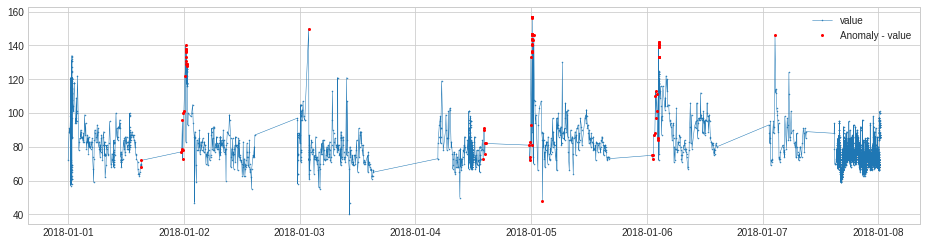

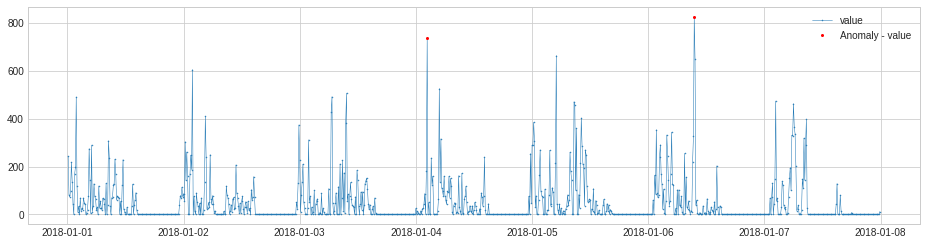

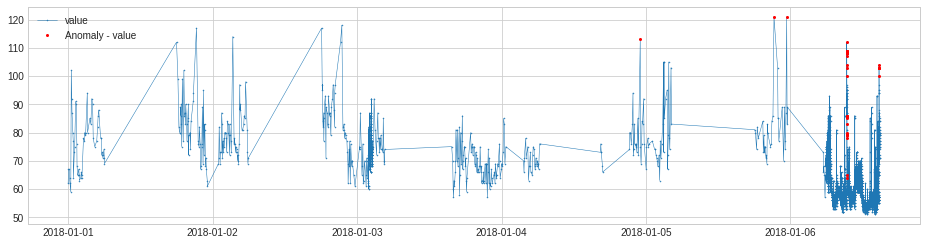

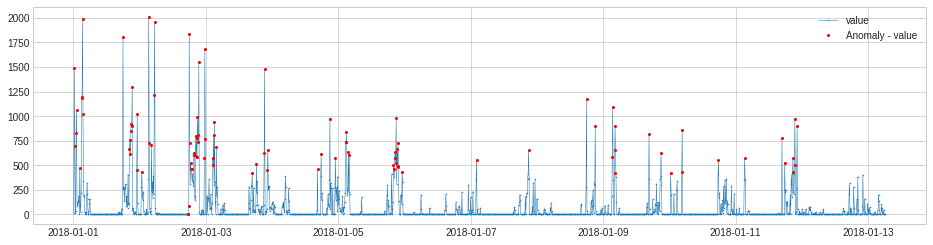

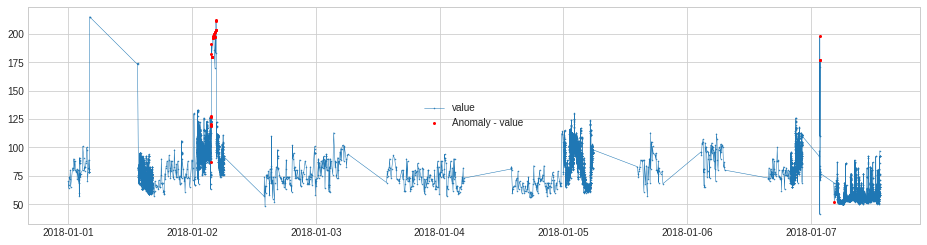

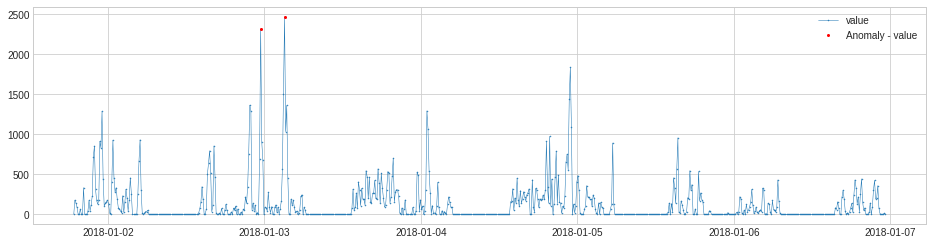

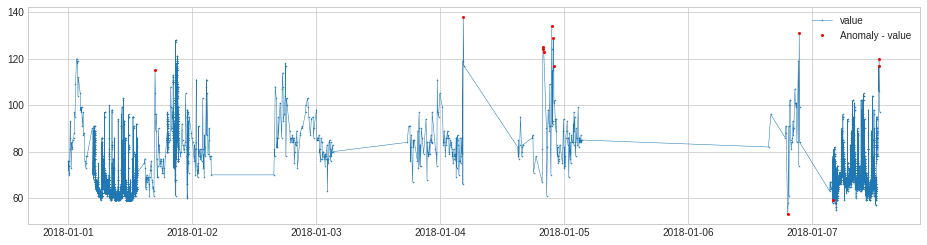

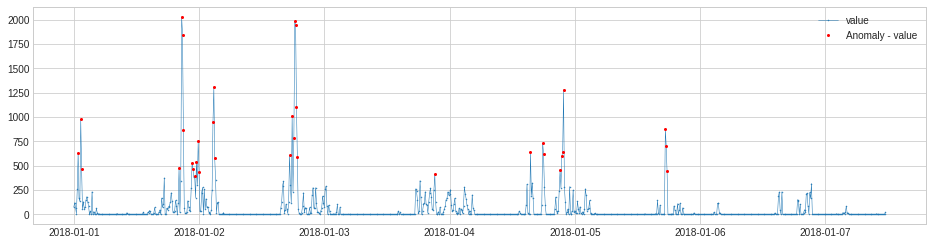

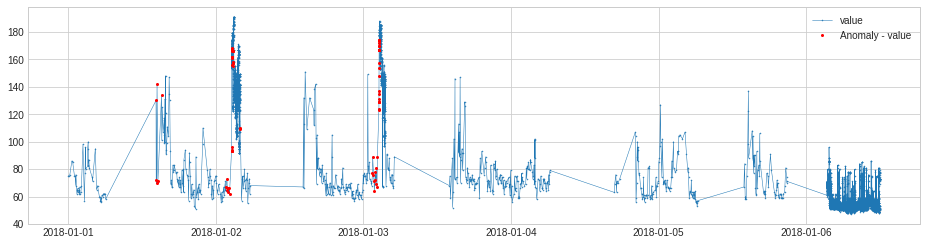

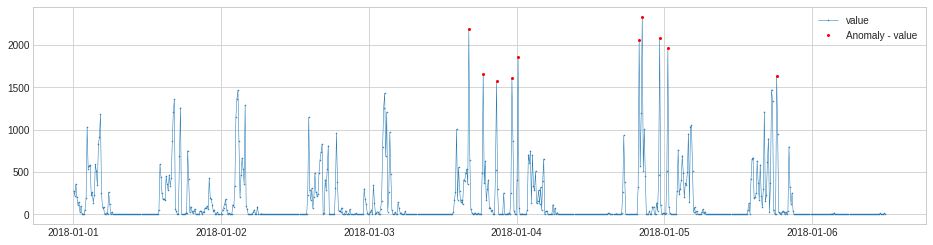

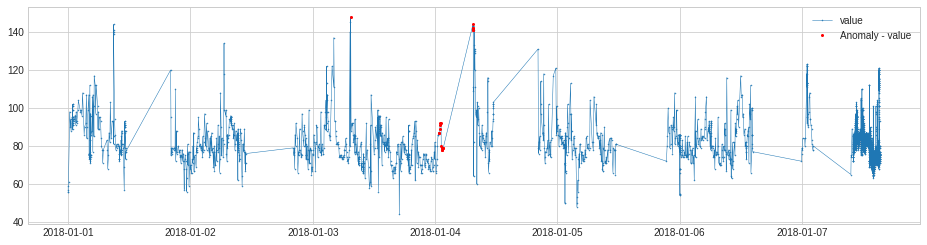

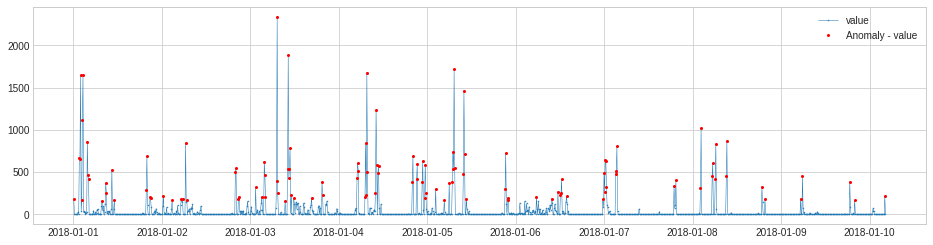

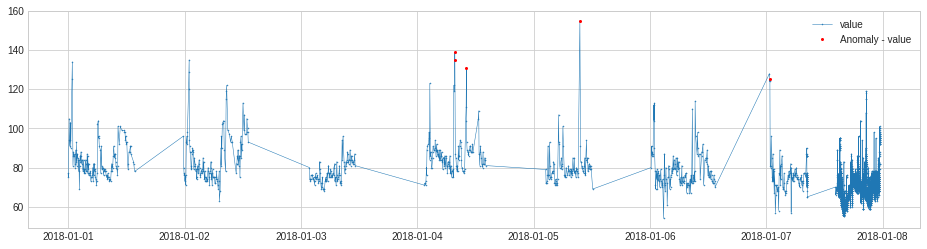

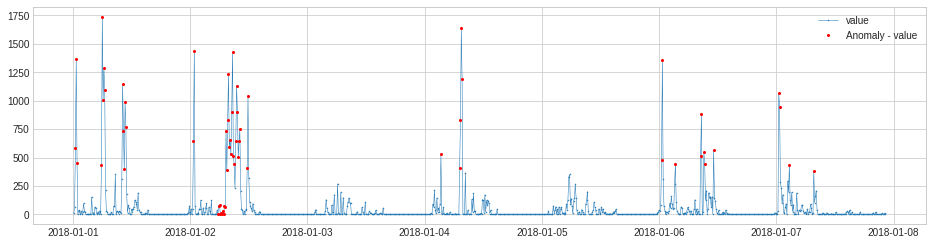

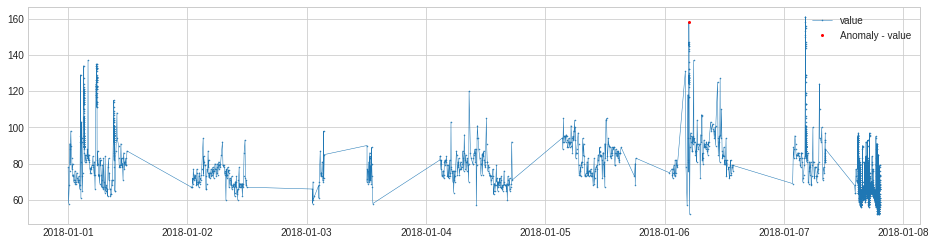

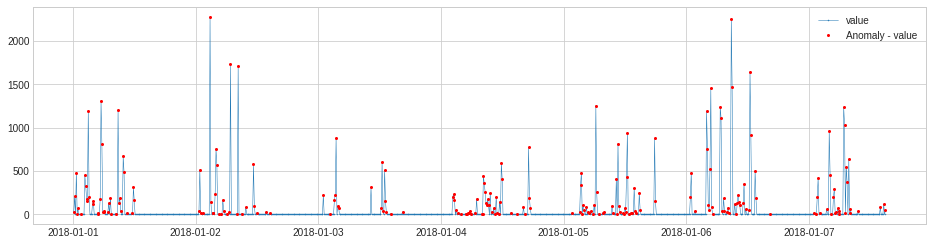

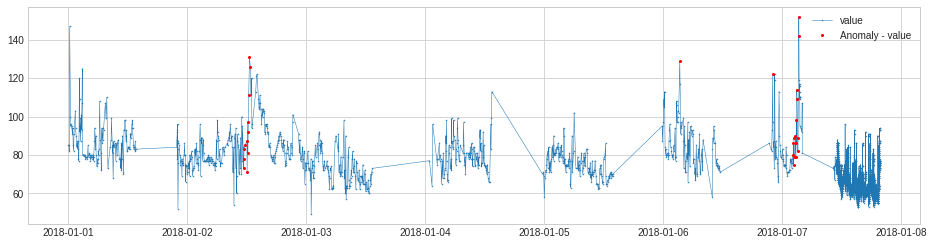

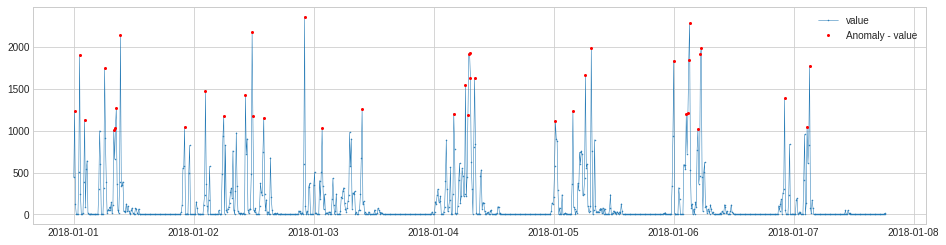

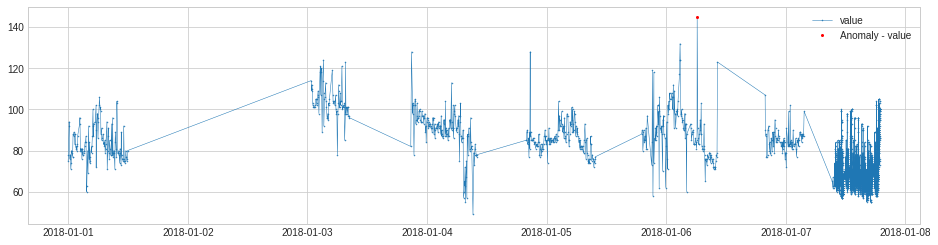

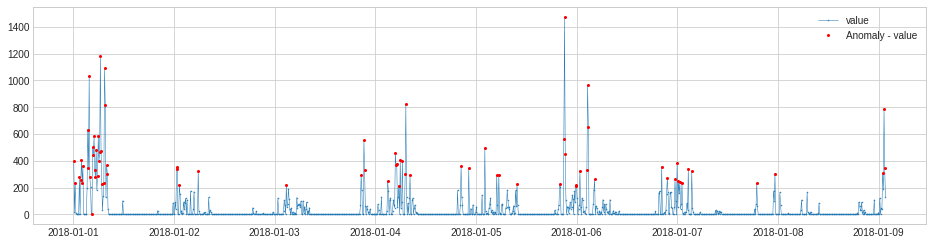

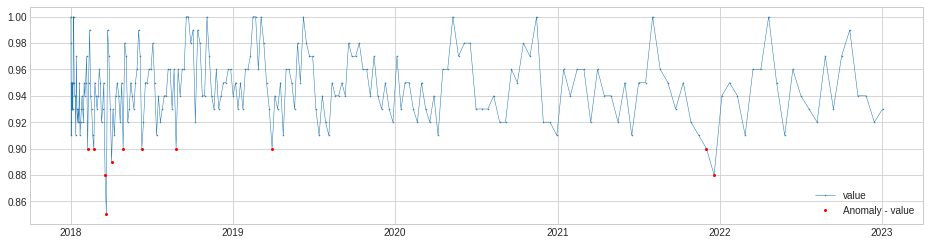

In [113]:
from sn_bayes.utils import detect_anomalies, query
from adtk.visualization import plot
pd.set_option('display.max_rows', None)

outvars= ["social_distancing", "social_distancing_binary","emergency_treatment","covid_risk","covid_risk_binary",
          "covid_severity","covid_severity_binary", "anomalous_wearables", "anomalous_wearables_binary","heart_rate_anomaly","steps_anomaly"]

for pid,at in anomaly_tuples.items():
    print(pid)
    anomaly_out = detect_anomalies(at,bayesianNetwork,anomaly_params)
    wearable_evidence = anomaly_out['evidence']
    anomaly_dict = anomaly_out['anomalies']
    signal_dict = anomaly_out['signal']
    for var,anomalies in anomaly_dict.items():
        
        print ("var")
        print(var)
        #print ("signal_dict[var]")
        #print (signal_dict[var])
        #print("anomalies")
        #print(anomalies)
        if len(anomalies)> 0 and len(anomalies)== len(signal_dict[var]):
            plot(signal_dict[var], anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

    print(wearable_evidence)
    evidence.update(wearable_evidence)
    results = query(covid,bayesianNetwork,evidence,outvars)
    print (f'pid {pid} results {results}')
    print("anomaly_out['fitted']")
    print(anomaly_out['fitted'])


Above we see signals for 10 patients for heart rate and steps from an internet data set, and one oxygen signal.  The signals for heart rate and steps alternate, and that the last signal, for snet1, is the oxygen signal.  Note that our typical setting for n on the anomaly detection in our Rejuve app is 2, meaning that an anomaly is reported if it occurs in the last two readings of signals.  The reason our rules are designed this way is to allow improvements in the signal to be processed by the Bayesian net.  Above the signals we see how they were processed by the Bayesian network. We see that only the forth patient's heart and steps signals contributed to the Bayesian net anomalous wearable value. A glance at the steps anomaly shows that there are many more red dots indicating anomalies than in the other signals. The reason that this is important is that there is a rule in the Bayesian network to report an anomaly for heart rate only if there is not a positive steps anomaly. In order to prevent alerting the user every time he is excersizing, we conservatively eliminate heart rate anomalies that cooccur with any sign of excersize.  

Above we see that the oxygen anomaly had a recent anomaly (near the 2022 mark) but that it was not registed in the above Bayesian net. This is because the signal was put into the net as it is, all at once, without being run through the net in a reading by reading manner.  n is set to 2 in the oxygen_anomaly rule, meaning only the last two anomalies in a signal are reported to the Bayesian net.  Because n only allows an alert for the minimal amount of time, it is very possible that alerts would be recorded by the wearable and arrive at the app not one at a time, but in groups greater than two.  If it arrives more than 2 readings ago, then the anomaly would never reach the Bayesian net.  To deal with inconsistant delivery of data, the app client should run through the data that was delivered in groups as though each reading was delivered individually.  Below, we send the oxygen anomaly through the Bayeesian net reading by reading, so that no anomaly is missed.  

Below we assume that we have variable signal readings returned by the wearables, and in this case, we have 25 readings of the wearable at one time, in addition to previous readings that we have saved.  Assume that the old readings and the new 25 readings have been concatenated into one signal and that we have already sent the user anomalies for parts of the signal before the last 25 readings.

In [114]:
original_at = anomaly_tuples['snet1']['oxygen_anomaly']
for i in range (25):
    at = {'oxygen_anomaly':original_at[:-(25-i)]}
    anomaly_out = detect_anomalies(at,bayesianNetwork,anomaly_params)
    wearable_evidence = anomaly_out['evidence']
    print(f'wearable_evidence is {wearable_evidence}')
    results = query(covid,bayesianNetwork,wearable_evidence,outvars)
    print (f'reading {i} results {results}')

wearable_evidence is {'oxygen_anomaly': 'no_oxygen_anomaly'}
reading 0 results {'social_distancing': {'low_social_distancing': 0.26034201591109024, 'medium_social_distancing': 0.4611111058077002, 'high_social_distancing': 0.2785468782812096}, 'social_distancing_binary': {'no_social_distancing': 0.4908975688149404, 'social_distancing': 0.5091024311850596}, 'emergency_treatment': {'emergency_treatment': 0.05072230414666315, 'no_emergency_treatment': 0.9492776958533368}, 'covid_risk': {'low_covid_risk': 0.0, 'no_covid_risk': 0.7923411219404247, 'high_covid_risk': 0.16420835761831223, 'medium_covid_risk': 0.043450520441262686}, 'covid_risk_binary': {'no_covid_risk': 0.7923411219404252, 'covid_risk': 0.2076588780595748}, 'covid_severity': {'medium_covid_severity': 0.1324283221329066, 'no_covid_severity': 0.5309050071330011, 'low_covid_severity': 0.21923835033622985, 'high_covid_severity': 0.11742832039786223}, 'covid_severity_binary': {'covid_severity': 0.24985664253076867, 'no_covid_severi

wearable_evidence is {'oxygen_anomaly': 'no_oxygen_anomaly'}
reading 6 results {'social_distancing': {'low_social_distancing': 0.26034201591109024, 'medium_social_distancing': 0.4611111058077002, 'high_social_distancing': 0.2785468782812096}, 'social_distancing_binary': {'no_social_distancing': 0.4908975688149404, 'social_distancing': 0.5091024311850596}, 'emergency_treatment': {'emergency_treatment': 0.05072230414666315, 'no_emergency_treatment': 0.9492776958533368}, 'covid_risk': {'low_covid_risk': 0.0, 'no_covid_risk': 0.7923411219404247, 'high_covid_risk': 0.16420835761831223, 'medium_covid_risk': 0.043450520441262686}, 'covid_risk_binary': {'no_covid_risk': 0.7923411219404252, 'covid_risk': 0.2076588780595748}, 'covid_severity': {'medium_covid_severity': 0.1324283221329066, 'no_covid_severity': 0.5309050071330011, 'low_covid_severity': 0.21923835033622985, 'high_covid_severity': 0.11742832039786223}, 'covid_severity_binary': {'covid_severity': 0.24985664253076867, 'no_covid_severi

reading 12 results {'social_distancing': {'low_social_distancing': 0.26034201591109024, 'medium_social_distancing': 0.4611111058077002, 'high_social_distancing': 0.2785468782812096}, 'social_distancing_binary': {'no_social_distancing': 0.4908975688149404, 'social_distancing': 0.5091024311850596}, 'emergency_treatment': {'emergency_treatment': 0.05072230414666315, 'no_emergency_treatment': 0.9492776958533368}, 'covid_risk': {'low_covid_risk': 0.0, 'no_covid_risk': 0.7923411219404247, 'high_covid_risk': 0.16420835761831223, 'medium_covid_risk': 0.043450520441262686}, 'covid_risk_binary': {'no_covid_risk': 0.7923411219404252, 'covid_risk': 0.2076588780595748}, 'covid_severity': {'medium_covid_severity': 0.1324283221329066, 'no_covid_severity': 0.5309050071330011, 'low_covid_severity': 0.21923835033622985, 'high_covid_severity': 0.11742832039786223}, 'covid_severity_binary': {'covid_severity': 0.24985664253076867, 'no_covid_severity': 0.7501433574692312}, 'anomalous_wearables': {'no_anomal

wearable_evidence is {'oxygen_anomaly': 'no_oxygen_anomaly'}
reading 18 results {'social_distancing': {'low_social_distancing': 0.26034201591109024, 'medium_social_distancing': 0.4611111058077002, 'high_social_distancing': 0.2785468782812096}, 'social_distancing_binary': {'no_social_distancing': 0.4908975688149404, 'social_distancing': 0.5091024311850596}, 'emergency_treatment': {'emergency_treatment': 0.05072230414666315, 'no_emergency_treatment': 0.9492776958533368}, 'covid_risk': {'low_covid_risk': 0.0, 'no_covid_risk': 0.7923411219404247, 'high_covid_risk': 0.16420835761831223, 'medium_covid_risk': 0.043450520441262686}, 'covid_risk_binary': {'no_covid_risk': 0.7923411219404252, 'covid_risk': 0.2076588780595748}, 'covid_severity': {'medium_covid_severity': 0.1324283221329066, 'no_covid_severity': 0.5309050071330011, 'low_covid_severity': 0.21923835033622985, 'high_covid_severity': 0.11742832039786223}, 'covid_severity_binary': {'covid_severity': 0.24985664253076867, 'no_covid_sever

reading 24 results {'social_distancing': {'low_social_distancing': 0.26034201591109024, 'medium_social_distancing': 0.4611111058077002, 'high_social_distancing': 0.2785468782812096}, 'social_distancing_binary': {'no_social_distancing': 0.4908975688149404, 'social_distancing': 0.5091024311850596}, 'emergency_treatment': {'emergency_treatment': 0.05072230414666315, 'no_emergency_treatment': 0.9492776958533368}, 'covid_risk': {'low_covid_risk': 0.0, 'no_covid_risk': 0.7923411219404247, 'high_covid_risk': 0.16420835761831223, 'medium_covid_risk': 0.043450520441262686}, 'covid_risk_binary': {'no_covid_risk': 0.7923411219404252, 'covid_risk': 0.2076588780595748}, 'covid_severity': {'medium_covid_severity': 0.1324283221329066, 'no_covid_severity': 0.5309050071330011, 'low_covid_severity': 0.21923835033622985, 'high_covid_severity': 0.11742832039786223}, 'covid_severity_binary': {'covid_severity': 0.24985664253076867, 'no_covid_severity': 0.7501433574692312}, 'anomalous_wearables': {'no_anomal

The 25 signal packet arrives at reading 26, so that reading 0 is 25 readings previus.    Note that oxygen_anomalies were found at readings 3,4,5,and 6.  This covers the two read dots near the 2022 mark in the oxygen signal.  Each one is reported on its reading and at one reading after that.  This information can then be sent to the app to alert the user that an anomaly occured during the delay in readings.

## Integration Test

After we enter the data as it is in the spreadsheet, convert to our form of the data, then print results for comparison.  This is highly dependent on the order of variables, which often changes, so the results will become invalid upon changing covid_bayes.py, however we leave the template here for future tests.

In [115]:
#changed social_distance_following to social_distancing_following

In [116]:
distribution_states=[
{"request_1": {"age": "adult", "cough": "cough_up_blood", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "no_social_distancing_following", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "daily_contacts_social_distancing": "no_daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "adult", "cough": "cough_up_blood", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "no_social_distancing_following", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "daily_contacts_social_distancing": "no_daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "new_or_worse_or_severe_low_urine", "swab_test": "swab_test_negative", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "no_isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_zero_per_week", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_zero_per_day", "deliveries_per_week": "deliveries_zero_per_week", "leaving_house_per_day": "leave_house_zero_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_zero_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "no_social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_zero_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "new_or_worse_or_severe_low_urine", "swab_test": "swab_test_negative", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "no_isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_zero_per_week", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_zero_per_day", "deliveries_per_week": "deliveries_zero_per_week", "leaving_house_per_day": "leave_house_zero_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_zero_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "no_social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_zero_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "sex": "male", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "swab_test": "swab_test_negative", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "no_isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_zero_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_zero_per_week", "leaving_house_per_day": "leave_house_zero_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_zero_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "sex": "male", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "swab_test": "swab_test_negative", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "no_isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_zero_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_zero_per_week", "leaving_house_per_day": "leave_house_zero_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_zero_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "adult", "sex": "female", "mask": "surgical_mask_or_untrained_n95", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "visits_per_week": "visits_more_than_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_more_than_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "adult", "sex": "female", "mask": "surgical_mask_or_untrained_n95", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "visits_per_week": "visits_more_than_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_more_than_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "sex": "female", "cough": "cough_up_blood", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_175_to_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "sex": "female", "cough": "cough_up_blood", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_175_to_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "adult", "sex": "male", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_zero_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_two_or_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_zero_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "adult", "sex": "male", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_zero_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_two_or_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_zero_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "sex": "male", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "fatigue": "fatigue", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "congestion": "congestion", "sore_throat": "no_sore_throat", "feeling_well": "not_feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "abdominal_pain": "no_abdominal_pain", "height_in_feet": "height_six_to_seven", "kidney_disease": "no_kidney_disease", "known_exposure": "known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_175_to_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_two_or_three_per_week", "shortness_of_breath": "no_shortness_of_breath", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "muscle_aches_or_body_pain": "no_muscle_aches_or_body_pain", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "rash_or_skin_discoloration": "no_rash_or_skin_discoloration", "sanitization_of_deliveries": "sanitization_of_deliveries", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "sex": "male", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "fatigue": "fatigue", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "congestion": "congestion", "sore_throat": "no_sore_throat", "feeling_well": "not_feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "abdominal_pain": "no_abdominal_pain", "height_in_feet": "height_six_to_seven", "kidney_disease": "no_kidney_disease", "known_exposure": "known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_175_to_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_two_or_three_per_week", "shortness_of_breath": "no_shortness_of_breath", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "muscle_aches_or_body_pain": "no_muscle_aches_or_body_pain", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "rash_or_skin_discoloration": "no_rash_or_skin_discoloration", "sanitization_of_deliveries": "sanitization_of_deliveries", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "sex": "male", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "new_or_worse_or_severe_low_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "no_isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_over_three_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "sex": "male", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "new_or_worse_or_severe_low_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "no_isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_over_three_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "sex": "male", "mask": "surgical_mask_or_untrained_n95", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "fatigue": "fatigue", "diabetes": "no_diabetes", "headache": "moderate_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "congestion": "no_congestion", "sore_throat": "no_sore_throat", "feeling_well": "not_feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "abdominal_pain": "no_abdominal_pain", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "health_care_worker_or_first_responder", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_175_to_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "muscle_aches_or_body_pain": "muscle_aches_or_body_pain", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "rash_or_skin_discoloration": "no_rash_or_skin_discoloration", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "sex": "male", "mask": "surgical_mask_or_untrained_n95", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "fatigue": "fatigue", "diabetes": "no_diabetes", "headache": "moderate_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "congestion": "no_congestion", "sore_throat": "no_sore_throat", "feeling_well": "not_feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "abdominal_pain": "no_abdominal_pain", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "health_care_worker_or_first_responder", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_175_to_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "muscle_aches_or_body_pain": "muscle_aches_or_body_pain", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "rash_or_skin_discoloration": "no_rash_or_skin_discoloration", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_six_to_seven", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_more_than_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "no_social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "no_daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_six_to_seven", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_more_than_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "no_social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "no_daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "sex": "male", "mask": "surgical_mask_or_untrained_n95", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_more_than_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_two_or_three_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "sex": "male", "mask": "surgical_mask_or_untrained_n95", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_more_than_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_once_or_twice_per_day", "deliveries_per_week": "deliveries_two_or_three_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "sex": "male", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "moderate_low_urine", "swab_test": "swab_test_negative", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "no_isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_zero_per_day", "deliveries_per_week": "deliveries_zero_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_zero_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "no_social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "no_daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_zero_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "sex": "male", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "moderate_low_urine", "swab_test": "swab_test_negative", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "no_isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_zero_per_day", "deliveries_per_week": "deliveries_zero_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_zero_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "no_social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "no_daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_zero_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "adult", "sex": "male", "mask": "n95_mask", "cough": "cough_up_blood", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "swab_test": "swab_test_negative", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_six_to_seven", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_over_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_over_five_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_two_or_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "adult", "sex": "male", "mask": "n95_mask", "cough": "cough_up_blood", "cancer": "no_cancer", "nausea": "no_nausea", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "swab_test": "swab_test_negative", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_six_to_seven", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_over_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_over_five_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_two_or_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "elderly", "sex": "male", "mask": "n95_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_six_to_seven", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_two_or_three_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "elderly", "sex": "male", "mask": "n95_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_six_to_seven", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_two_or_three_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "sex": "female", "cough": "cough_up_blood", "cancer": "no_cancer", "diabetes": "no_diabetes", "pink_eye": "no_pink_eye", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_175_to_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "sex": "female", "cough": "cough_up_blood", "cancer": "no_cancer", "diabetes": "no_diabetes", "pink_eye": "no_pink_eye", "low_urine": "normal_urine", "sore_throat": "no_sore_throat", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "neck_stiffness": "no_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "muscle_weakness": "no_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "weight_in_pounds": "weight_175_to_250", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_once_per_week", "leaving_house_per_day": "leave_house_once_or_twice_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_once_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "no_close_contact_unknown_exposure", "daily_contacts_social_distancing": "daily_contacts_social_distancing", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "young_adult", "sex": "female", "cough": "cough_up_blood", "cancer": "no_cancer", "nausea": "moderate_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "new_or_worse_or_severe_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "moderate_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "visits_per_week": "visits_more_than_twice_per_week", "weight_in_pounds": "weight_100_to_125", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_over_five_per_day", "deliveries_per_week": "deliveries_over_three_per_week", "leaving_house_per_day": "leave_house_zero_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "self_quarantine_two_weeks": "self_quarantine_two_weeks", "sanitization_of_deliveries": "sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}, "request_2": {"age": "young_adult", "sex": "female", "cough": "cough_up_blood", "cancer": "no_cancer", "nausea": "moderate_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "no_vomiting", "low_urine": "normal_urine", "sore_throat": "new_or_worse_or_severe_sore_throat", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "neck_stiffness": "moderate_neck_stiffness", "employment_risk": "low_employment_risk", "isolation_space": "isolation_space", "visits_per_week": "visits_more_than_twice_per_week", "weight_in_pounds": "weight_100_to_125", "difficulty_moving": "no_difficulty_moving", "frequent_diarrhea": "not_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_over_five_per_day", "deliveries_per_week": "deliveries_over_three_per_week", "leaving_house_per_day": "leave_house_zero_per_day", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_over_three_per_week", "self_quarantine_two_weeks": "self_quarantine_two_weeks", "sanitization_of_deliveries": "sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks", "disinfection_of_communal_objects_or_hand_sanitizer": "no_disinfection_of_communal_objects_or_hand_sanitizer"}}
,{"request_1": {"age": "adult", "sex": "male", "cancer": "no_cancer", "tested": "not_tested", "diabetes": "no_diabetes", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "weight_in_pounds": "weight_125_to_175", "immunocompromised": "not_immunocompromised", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "social_distancing_following": "social_distancing_following"}, "request_2": {"age": "adult", "sex": "male", "cancer": "no_cancer", "tested": "not_tested", "diabetes": "no_diabetes", "feeling_well": "feeling_well", "hypertension": "no_hypertension", "lung_disease": "no_lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "no_known_exposure", "weight_in_pounds": "weight_125_to_175", "immunocompromised": "not_immunocompromised", "cardiovascular_disease": "no_cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "social_distancing_following": "social_distancing_following"}}
,{"request_1": {"age": "young_adult", "sex": "male", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "new_or_worse_or_severe_vomiting", "low_urine": "moderate_low_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "hypertension", "lung_disease": "lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "health_care_worker_or_first_responder", "isolation_space": "isolation_space", "muscle_weakness": "moderate_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "body_temperature": "body_temperature_above_100F", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "moderate_difficulty_moving", "frequent_diarrhea": "moderate_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_two_or_three_per_week", "leaving_house_per_day": "leave_house_more_than_twice_per_day", "cardiovascular_disease": "cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_two_or_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks"}, "request_2": {"age": "young_adult", "sex": "male", "mask": "no_mask", "cough": "no_cough", "cancer": "no_cancer", "nausea": "no_nausea", "tested": "not_tested", "diabetes": "no_diabetes", "headache": "no_headache", "pink_eye": "no_pink_eye", "vomiting": "new_or_worse_or_severe_vomiting", "low_urine": "moderate_low_urine", "sore_throat": "no_sore_throat", "feeling_well": "feeling_well", "hypertension": "hypertension", "lung_disease": "lung_disease", "height_in_feet": "height_five_to_six", "kidney_disease": "no_kidney_disease", "known_exposure": "known_exposure", "neck_stiffness": "no_neck_stiffness", "employment_risk": "health_care_worker_or_first_responder", "isolation_space": "isolation_space", "muscle_weakness": "moderate_muscle_weakness", "visits_per_week": "visits_once_or_twice_per_week", "body_temperature": "body_temperature_above_100F", "weight_in_pounds": "weight_125_to_175", "difficulty_moving": "moderate_difficulty_moving", "frequent_diarrhea": "moderate_frequent_diarrhea", "immunocompromised": "not_immunocompromised", "wash_hands_per_day": "wash_hands_three_to_five_per_day", "deliveries_per_week": "deliveries_two_or_three_per_week", "leaving_house_per_day": "leave_house_more_than_twice_per_day", "cardiovascular_disease": "cardiovascular_disease", "psychological_disorders": "no_psychological_disorders", "decreased_smell_or_taste": "no_decreased_smell_or_taste", "high_risk_place_per_week": "high_risk_place_two_or_three_per_week", "self_quarantine_two_weeks": "no_self_quarantine_two_weeks", "sanitization_of_deliveries": "no_sanitization_of_deliveries", "social_distancing_following": "social_distancing_following", "workplace_social_distancing": "no_workplace_social_distancing", "close_contact_unknown_exposure": "close_contact_unknown_exposure", "public_transportation_per_two_weeks": "public_transportation_one_to_three_per_two_weeks"}}
]

In [117]:
out_variable_ids=[
{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
]

In [118]:
reverse_explain_variable_ids=[
{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
,{"request_1": [77, 98], "request_2": [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100]}
]

In [119]:
reverse_evidence_variable_ids=[
{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
,{"request_1": [], "request_2": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
]

In [120]:
anomalies=[
{"request_1": {"steps_anomaly": [{"value": 73, "interval_in_second": 86400}], "heart_rate_anomaly": [{"value": 66, "interval_in_second": 60}, {"value": 67, "interval_in_second": 60}, {"value": 70, "interval_in_second": 60}, {"value": 74, "interval_in_second": 60}, {"value": 71, "interval_in_second": 60}, {"value": 88, "interval_in_second": 60}, {"value": 62, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 75, "interval_in_second": 60}, {"value": 81, "interval_in_second": 60}, {"value": 78, "interval_in_second": 60}, {"value": 92, "interval_in_second": 60}, {"value": 93, "interval_in_second": 60}, {"value": 77, "interval_in_second": 60}, {"value": 77, "interval_in_second": 60}, {"value": 73, "interval_in_second": 23220}, {"value": 68, "interval_in_second": 60}, {"value": 77, "interval_in_second": 120}, {"value": 79, "interval_in_second": 60}, {"value": 69, "interval_in_second": 60}, {"value": 70, "interval_in_second": 60}, {"value": 76, "interval_in_second": 60}, {"value": 70, "interval_in_second": 120}, {"value": 87, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 61, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 88, "interval_in_second": 60}, {"value": 60, "interval_in_second": 120}, {"value": 65, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 64, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 68, "interval_in_second": 120}, {"value": 65, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 67, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 64, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 64, "interval_in_second": 60}, {"value": 72, "interval_in_second": 60}, {"value": 69, "interval_in_second": 60}, {"value": 69, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 77, "interval_in_second": 60}, {"value": 79, "interval_in_second": 60}, {"value": 72, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}]}, "request_2": {"steps_anomaly": [{"value": 73, "interval_in_second": 86400}], "heart_rate_anomaly": [{"value": 66, "interval_in_second": 60}, {"value": 67, "interval_in_second": 60}, {"value": 70, "interval_in_second": 60}, {"value": 74, "interval_in_second": 60}, {"value": 71, "interval_in_second": 60}, {"value": 88, "interval_in_second": 60}, {"value": 62, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 75, "interval_in_second": 60}, {"value": 81, "interval_in_second": 60}, {"value": 78, "interval_in_second": 60}, {"value": 92, "interval_in_second": 60}, {"value": 93, "interval_in_second": 60}, {"value": 77, "interval_in_second": 60}, {"value": 77, "interval_in_second": 60}, {"value": 73, "interval_in_second": 23220}, {"value": 68, "interval_in_second": 60}, {"value": 77, "interval_in_second": 120}, {"value": 79, "interval_in_second": 60}, {"value": 69, "interval_in_second": 60}, {"value": 70, "interval_in_second": 60}, {"value": 76, "interval_in_second": 60}, {"value": 70, "interval_in_second": 120}, {"value": 87, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 61, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 88, "interval_in_second": 60}, {"value": 60, "interval_in_second": 120}, {"value": 65, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 64, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 68, "interval_in_second": 120}, {"value": 65, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 67, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 63, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 64, "interval_in_second": 60}, {"value": 66, "interval_in_second": 60}, {"value": 65, "interval_in_second": 60}, {"value": 64, "interval_in_second": 60}, {"value": 72, "interval_in_second": 60}, {"value": 69, "interval_in_second": 60}, {"value": 69, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 77, "interval_in_second": 60}, {"value": 79, "interval_in_second": 60}, {"value": 72, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}, {"value": 68, "interval_in_second": 60}]}}
,{"request_1": {"steps_anomaly": [{"value": 77, "interval_in_second": 86400}], "heart_rate_anomaly": [{"value": 81, "interval_in_second": 735}, {"value": 81, "interval_in_second": 181}, {"value": 77, "interval_in_second": 405}, {"value": 83, "interval_in_second": 253}, {"value": 84, "interval_in_second": 246}, {"value": 80, "interval_in_second": 485}, {"value": 83, "interval_in_second": 437}, {"value": 88, "interval_in_second": 120}, {"value": 65, "interval_in_second": 267}, {"value": 116, "interval_in_second": 53}, {"value": 57, "interval_in_second": 288}, {"value": 70, "interval_in_second": 768}, {"value": 90, "interval_in_second": 322}, {"value": 91, "interval_in_second": 134}, {"value": 79, "interval_in_second": 492}, {"value": 83, "interval_in_second": 2531}]}, "request_2": {"steps_anomaly": [{"value": 77, "interval_in_second": 86400}], "heart_rate_anomaly": [{"value": 81, "interval_in_second": 735}, {"value": 81, "interval_in_second": 181}, {"value": 77, "interval_in_second": 405}, {"value": 83, "interval_in_second": 253}, {"value": 84, "interval_in_second": 246}, {"value": 80, "interval_in_second": 485}, {"value": 83, "interval_in_second": 437}, {"value": 88, "interval_in_second": 120}, {"value": 65, "interval_in_second": 267}, {"value": 116, "interval_in_second": 53}, {"value": 57, "interval_in_second": 288}, {"value": 70, "interval_in_second": 768}, {"value": 90, "interval_in_second": 322}, {"value": 91, "interval_in_second": 134}, {"value": 79, "interval_in_second": 492}, {"value": 83, "interval_in_second": 2531}]}}
,{"request_1": {"steps_anomaly": [{"value": 654, "interval_in_second": 86400}], "heart_rate_anomaly": [{"value": 97, "interval_in_second": 164}, {"value": 118, "interval_in_second": 146}, {"value": 113, "interval_in_second": 18}, {"value": 111, "interval_in_second": 4}, {"value": 109, "interval_in_second": 4}, {"value": 109, "interval_in_second": 6}, {"value": 109, "interval_in_second": 2}, {"value": 109, "interval_in_second": 9}, {"value": 106, "interval_in_second": 4}, {"value": 107, "interval_in_second": 6}, {"value": 106, "interval_in_second": 1}, {"value": 106, "interval_in_second": 9}, {"value": 107, "interval_in_second": 2}, {"value": 107, "interval_in_second": 5}, {"value": 109, "interval_in_second": 8}, {"value": 108, "interval_in_second": 3}, {"value": 109, "interval_in_second": 6}, {"value": 112, "interval_in_second": 6}, {"value": 110, "interval_in_second": 5}, {"value": 110, "interval_in_second": 203}, {"value": 111, "interval_in_second": 145}, {"value": 103, "interval_in_second": 25}, {"value": 108, "interval_in_second": 156}, {"value": 99, "interval_in_second": 253}, {"value": 81, "interval_in_second": 33}, {"value": 77.57575988769531, "interval_in_second": 62}, {"value": 77, "interval_in_second": 305}, {"value": 79, "interval_in_second": 473}, {"value": 74, "interval_in_second": 343}, {"value": 72, "interval_in_second": 121}, {"value": 74, "interval_in_second": 508}, {"value": 75, "interval_in_second": 69}, {"value": 71, "interval_in_second": 536}, {"value": 76, "interval_in_second": 159}, {"value": 78, "interval_in_second": 416}, {"value": 75, "interval_in_second": 228}, {"value": 72, "interval_in_second": 152}, {"value": 71, "interval_in_second": 422}, {"value": 72, "interval_in_second": 258}, {"value": 70, "interval_in_second": 185}, {"value": 77, "interval_in_second": 529}, {"value": 72, "interval_in_second": 334}, {"value": 72, "interval_in_second": 203}, {"value": 72, "interval_in_second": 331}, {"value": 73, "interval_in_second": 142}, {"value": 72, "interval_in_second": 384}, {"value": 68, "interval_in_second": 204}, {"value": 78, "interval_in_second": 505}, {"value": 77, "interval_in_second": 91}, {"value": 68, "interval_in_second": 523}, {"value": 73, "interval_in_second": 68}, {"value": 72, "interval_in_second": 331}, {"value": 72, "interval_in_second": 472}, {"value": 71, "interval_in_second": 173}, {"value": 69, "interval_in_second": 463}, {"value": 71, "interval_in_second": 266}, {"value": 70, "interval_in_second": 145}, {"value": 75, "interval_in_second": 280}, {"value": 72, "interval_in_second": 252}, {"value": 70, "interval_in_second": 450}, {"value": 90, "interval_in_second": 142}, {"value": 75, "interval_in_second": 63}, {"value": 70, "interval_in_second": 460}, {"value": 71, "interval_in_second": 294}, {"value": 70, "interval_in_second": 329}, {"value": 67, "interval_in_second": 195}, {"value": 71, "interval_in_second": 225}, {"value": 66, "interval_in_second": 415}, {"value": 65, "interval_in_second": 343}, {"value": 62, "interval_in_second": 198}, {"value": 65, "interval_in_second": 319}, {"value": 63, "interval_in_second": 181}, {"value": 75, "interval_in_second": 563}, {"value": 74, "interval_in_second": 192}, {"value": 87, "interval_in_second": 604}, {"value": 75, "interval_in_second": 285}, {"value": 62, "interval_in_second": 235}, {"value": 62, "interval_in_second": 430}, {"value": 73, "interval_in_second": 235}, {"value": 69, "interval_in_second": 255}, {"value": 68, "interval_in_second": 360}, {"value": 72, "interval_in_second": 265}, {"value": 67, "interval_in_second": 320}, {"value": 70, "interval_in_second": 144}, {"value": 71, "interval_in_second": 391}, {"value": 70, "interval_in_second": 440}, {"value": 66, "interval_in_second": 224}, {"value": 76, "interval_in_second": 240}, {"value": 69, "interval_in_second": 441}, {"value": 72, "interval_in_second": 355}, {"value": 71, "interval_in_second": 63}, {"value": 69, "interval_in_second": 382}, {"value": 69, "interval_in_second": 458}, {"value": 71, "interval_in_second": 184}, {"value": 71, "interval_in_second": 239}, {"value": 72, "interval_in_second": 275}, {"value": 70, "interval_in_second": 254}, {"value": 70, "interval_in_second": 485}, {"value": 69, "interval_in_second": 247}, {"value": 68, "interval_in_second": 201}, {"value": 71, "interval_in_second": 329}, {"value": 69, "interval_in_second": 89}, {"value": 70.1369857788086, "interval_in_second": 102}, {"value": 74, "interval_in_second": 854}, {"value": 62, "interval_in_second": 595}, {"value": 68, "interval_in_second": 329}, {"value": 78, "interval_in_second": 171}, {"value": 76, "interval_in_second": 219}, {"value": 76, "interval_in_second": 458}, {"value": 75, "interval_in_second": 187}, {"value": 73, "interval_in_second": 388}, {"value": 70, "interval_in_second": 241}, {"value": 48, "interval_in_second": 228}, {"value": 71, "interval_in_second": 468}, {"value": 72, "interval_in_second": 307}, {"value": 70, "interval_in_second": 331}, {"value": 72, "interval_in_second": 232}, {"value": 68, "interval_in_second": 163}, {"value": 73, "interval_in_second": 397}]}, "request_2": {"steps_anomaly": [{"value": 654, "interval_in_second": 86400}], "heart_rate_anomaly": [{"value": 97, "interval_in_second": 164}, {"value": 118, "interval_in_second": 146}, {"value": 113, "interval_in_second": 18}, {"value": 111, "interval_in_second": 4}, {"value": 109, "interval_in_second": 4}, {"value": 109, "interval_in_second": 6}, {"value": 109, "interval_in_second": 2}, {"value": 109, "interval_in_second": 9}, {"value": 106, "interval_in_second": 4}, {"value": 107, "interval_in_second": 6}, {"value": 106, "interval_in_second": 1}, {"value": 106, "interval_in_second": 9}, {"value": 107, "interval_in_second": 2}, {"value": 107, "interval_in_second": 5}, {"value": 109, "interval_in_second": 8}, {"value": 108, "interval_in_second": 3}, {"value": 109, "interval_in_second": 6}, {"value": 112, "interval_in_second": 6}, {"value": 110, "interval_in_second": 5}, {"value": 110, "interval_in_second": 203}, {"value": 111, "interval_in_second": 145}, {"value": 103, "interval_in_second": 25}, {"value": 108, "interval_in_second": 156}, {"value": 99, "interval_in_second": 253}, {"value": 81, "interval_in_second": 33}, {"value": 77.57575988769531, "interval_in_second": 62}, {"value": 77, "interval_in_second": 305}, {"value": 79, "interval_in_second": 473}, {"value": 74, "interval_in_second": 343}, {"value": 72, "interval_in_second": 121}, {"value": 74, "interval_in_second": 508}, {"value": 75, "interval_in_second": 69}, {"value": 71, "interval_in_second": 536}, {"value": 76, "interval_in_second": 159}, {"value": 78, "interval_in_second": 416}, {"value": 75, "interval_in_second": 228}, {"value": 72, "interval_in_second": 152}, {"value": 71, "interval_in_second": 422}, {"value": 72, "interval_in_second": 258}, {"value": 70, "interval_in_second": 185}, {"value": 77, "interval_in_second": 529}, {"value": 72, "interval_in_second": 334}, {"value": 72, "interval_in_second": 203}, {"value": 72, "interval_in_second": 331}, {"value": 73, "interval_in_second": 142}, {"value": 72, "interval_in_second": 384}, {"value": 68, "interval_in_second": 204}, {"value": 78, "interval_in_second": 505}, {"value": 77, "interval_in_second": 91}, {"value": 68, "interval_in_second": 523}, {"value": 73, "interval_in_second": 68}, {"value": 72, "interval_in_second": 331}, {"value": 72, "interval_in_second": 472}, {"value": 71, "interval_in_second": 173}, {"value": 69, "interval_in_second": 463}, {"value": 71, "interval_in_second": 266}, {"value": 70, "interval_in_second": 145}, {"value": 75, "interval_in_second": 280}, {"value": 72, "interval_in_second": 252}, {"value": 70, "interval_in_second": 450}, {"value": 90, "interval_in_second": 142}, {"value": 75, "interval_in_second": 63}, {"value": 70, "interval_in_second": 460}, {"value": 71, "interval_in_second": 294}, {"value": 70, "interval_in_second": 329}, {"value": 67, "interval_in_second": 195}, {"value": 71, "interval_in_second": 225}, {"value": 66, "interval_in_second": 415}, {"value": 65, "interval_in_second": 343}, {"value": 62, "interval_in_second": 198}, {"value": 65, "interval_in_second": 319}, {"value": 63, "interval_in_second": 181}, {"value": 75, "interval_in_second": 563}, {"value": 74, "interval_in_second": 192}, {"value": 87, "interval_in_second": 604}, {"value": 75, "interval_in_second": 285}, {"value": 62, "interval_in_second": 235}, {"value": 62, "interval_in_second": 430}, {"value": 73, "interval_in_second": 235}, {"value": 69, "interval_in_second": 255}, {"value": 68, "interval_in_second": 360}, {"value": 72, "interval_in_second": 265}, {"value": 67, "interval_in_second": 320}, {"value": 70, "interval_in_second": 144}, {"value": 71, "interval_in_second": 391}, {"value": 70, "interval_in_second": 440}, {"value": 66, "interval_in_second": 224}, {"value": 76, "interval_in_second": 240}, {"value": 69, "interval_in_second": 441}, {"value": 72, "interval_in_second": 355}, {"value": 71, "interval_in_second": 63}, {"value": 69, "interval_in_second": 382}, {"value": 69, "interval_in_second": 458}, {"value": 71, "interval_in_second": 184}, {"value": 71, "interval_in_second": 239}, {"value": 72, "interval_in_second": 275}, {"value": 70, "interval_in_second": 254}, {"value": 70, "interval_in_second": 485}, {"value": 69, "interval_in_second": 247}, {"value": 68, "interval_in_second": 201}, {"value": 71, "interval_in_second": 329}, {"value": 69, "interval_in_second": 89}, {"value": 70.1369857788086, "interval_in_second": 102}, {"value": 74, "interval_in_second": 854}, {"value": 62, "interval_in_second": 595}, {"value": 68, "interval_in_second": 329}, {"value": 78, "interval_in_second": 171}, {"value": 76, "interval_in_second": 219}, {"value": 76, "interval_in_second": 458}, {"value": 75, "interval_in_second": 187}, {"value": 73, "interval_in_second": 388}, {"value": 70, "interval_in_second": 241}, {"value": 48, "interval_in_second": 228}, {"value": 71, "interval_in_second": 468}, {"value": 72, "interval_in_second": 307}, {"value": 70, "interval_in_second": 331}, {"value": 72, "interval_in_second": 232}, {"value": 68, "interval_in_second": 163}, {"value": 73, "interval_in_second": 397}]}}
,{"request_1": {"steps_anomaly": [{"value": 15524, "interval_in_second": 86400}], "heart_rate_anomaly": [{"value": 62, "interval_in_second": 286}, {"value": 63, "interval_in_second": 524}, {"value": 66, "interval_in_second": 113}, {"value": 72, "interval_in_second": 539}, {"value": 72, "interval_in_second": 263}, {"value": 72, "interval_in_second": 145}, {"value": 71, "interval_in_second": 235}, {"value": 70, "interval_in_second": 321}, {"value": 63, "interval_in_second": 349}, {"value": 60, "interval_in_second": 210}, {"value": 60, "interval_in_second": 335}, {"value": 62, "interval_in_second": 265}, {"value": 62, "interval_in_second": 305}, {"value": 62, "interval_in_second": 345}, {"value": 63, "interval_in_second": 280}, {"value": 64, "interval_in_second": 270}, {"value": 66, "interval_in_second": 350}, {"value": 71, "interval_in_second": 270}, {"value": 69.81818389892578, "interval_in_second": 92}, {"value": 68, "interval_in_second": 425}, {"value": 72, "interval_in_second": 120}, {"value": 70, "interval_in_second": 521}, {"value": 69, "interval_in_second": 159}, {"value": 64, "interval_in_second": 255}, {"value": 61, "interval_in_second": 241}, {"value": 58, "interval_in_second": 284}, {"value": 58, "interval_in_second": 295}, {"value": 59, "interval_in_second": 290}, {"value": 60, "interval_in_second": 430}, {"value": 69, "interval_in_second": 205}, {"value": 68, "interval_in_second": 265}, {"value": 68, "interval_in_second": 450}, {"value": 65, "interval_in_second": 231}, {"value": 66, "interval_in_second": 234}, {"value": 63, "interval_in_second": 335}, {"value": 65, "interval_in_second": 251}, {"value": 63, "interval_in_second": 310}, {"value": 61, "interval_in_second": 325}, {"value": 62, "interval_in_second": 318}, {"value": 62, "interval_in_second": 260}, {"value": 61, "interval_in_second": 505}, {"value": 60, "interval_in_second": 90}, {"value": 60, "interval_in_second": 267}, {"value": 61.195220947265625, "interval_in_second": 166}, {"value": 66, "interval_in_second": 205}, {"value": 65, "interval_in_second": 280}, {"value": 66, "interval_in_second": 271}, {"value": 64, "interval_in_second": 310}, {"value": 63, "interval_in_second": 295}, {"value": 62, "interval_in_second": 311}, {"value": 61, "interval_in_second": 364}, {"value": 61, "interval_in_second": 290}, {"value": 64, "interval_in_second": 230}, {"value": 65, "interval_in_second": 315}, {"value": 65, "interval_in_second": 370}, {"value": 65, "interval_in_second": 225}, {"value": 65, "interval_in_second": 335}, {"value": 61, "interval_in_second": 325}, {"value": 58, "interval_in_second": 290}, {"value": 60, "interval_in_second": 265}, {"value": 56, "interval_in_second": 294}, {"value": 56, "interval_in_second": 291}, {"value": 57, "interval_in_second": 375}, {"value": 56, "interval_in_second": 220}, {"value": 56, "interval_in_second": 310}, {"value": 56, "interval_in_second": 378}, {"value": 58, "interval_in_second": 387}, {"value": 66, "interval_in_second": 99}, {"value": 64.26778411865234, "interval_in_second": 128}, {"value": 64, "interval_in_second": 205}, {"value": 61, "interval_in_second": 350}, {"value": 63, "interval_in_second": 335}, {"value": 58, "interval_in_second": 271}, {"value": 58, "interval_in_second": 239}, {"value": 59, "interval_in_second": 300}, {"value": 60, "interval_in_second": 355}, {"value": 60, "interval_in_second": 240}, {"value": 60, "interval_in_second": 300}, {"value": 60, "interval_in_second": 380}, {"value": 61, "interval_in_second": 265}, {"value": 61, "interval_in_second": 255}, {"value": 60, "interval_in_second": 325}, {"value": 60, "interval_in_second": 280}, {"value": 61, "interval_in_second": 405}, {"value": 71, "interval_in_second": 255}, {"value": 79, "interval_in_second": 1468}, {"value": 91, "interval_in_second": 691}, {"value": 84, "interval_in_second": 464}, {"value": 71, "interval_in_second": 162}, {"value": 86, "interval_in_second": 1442}, {"value": 105, "interval_in_second": 1501}, {"value": 110, "interval_in_second": 838}, {"value": 111, "interval_in_second": 225}, {"value": 101, "interval_in_second": 277}, {"value": 105, "interval_in_second": 2406}, {"value": 89, "interval_in_second": 419}, {"value": 97, "interval_in_second": 3567}, {"value": 82, "interval_in_second": 1567}, {"value": 80, "interval_in_second": 346}, {"value": 108, "interval_in_second": 1041}, {"value": 91, "interval_in_second": 200}, {"value": 95, "interval_in_second": 317}, {"value": 83, "interval_in_second": 4260}, {"value": 76, "interval_in_second": 1710}, {"value": 89, "interval_in_second": 842}, {"value": 81, "interval_in_second": 728}, {"value": 77, "interval_in_second": 159}, {"value": 91, "interval_in_second": 1689}, {"value": 79, "interval_in_second": 291}, {"value": 88, "interval_in_second": 196}, {"value": 94, "interval_in_second": 427}, {"value": 106, "interval_in_second": 585}, {"value": 100, "interval_in_second": 840}, {"value": 102, "interval_in_second": 100}, {"value": 99, "interval_in_second": 809}, {"value": 101, "interval_in_second": 1874}, {"value": 99, "interval_in_second": 1759}, {"value": 98, "interval_in_second": 362}, {"value": 64, "interval_in_second": 1015}]}, "request_2": {"steps_anomaly": [{"value": 15524, "interval_in_second": 86400}], "heart_rate_anomaly": [{"value": 62, "interval_in_second": 286}, {"value": 63, "interval_in_second": 524}, {"value": 66, "interval_in_second": 113}, {"value": 72, "interval_in_second": 539}, {"value": 72, "interval_in_second": 263}, {"value": 72, "interval_in_second": 145}, {"value": 71, "interval_in_second": 235}, {"value": 70, "interval_in_second": 321}, {"value": 63, "interval_in_second": 349}, {"value": 60, "interval_in_second": 210}, {"value": 60, "interval_in_second": 335}, {"value": 62, "interval_in_second": 265}, {"value": 62, "interval_in_second": 305}, {"value": 62, "interval_in_second": 345}, {"value": 63, "interval_in_second": 280}, {"value": 64, "interval_in_second": 270}, {"value": 66, "interval_in_second": 350}, {"value": 71, "interval_in_second": 270}, {"value": 69.81818389892578, "interval_in_second": 92}, {"value": 68, "interval_in_second": 425}, {"value": 72, "interval_in_second": 120}, {"value": 70, "interval_in_second": 521}, {"value": 69, "interval_in_second": 159}, {"value": 64, "interval_in_second": 255}, {"value": 61, "interval_in_second": 241}, {"value": 58, "interval_in_second": 284}, {"value": 58, "interval_in_second": 295}, {"value": 59, "interval_in_second": 290}, {"value": 60, "interval_in_second": 430}, {"value": 69, "interval_in_second": 205}, {"value": 68, "interval_in_second": 265}, {"value": 68, "interval_in_second": 450}, {"value": 65, "interval_in_second": 231}, {"value": 66, "interval_in_second": 234}, {"value": 63, "interval_in_second": 335}, {"value": 65, "interval_in_second": 251}, {"value": 63, "interval_in_second": 310}, {"value": 61, "interval_in_second": 325}, {"value": 62, "interval_in_second": 318}, {"value": 62, "interval_in_second": 260}, {"value": 61, "interval_in_second": 505}, {"value": 60, "interval_in_second": 90}, {"value": 60, "interval_in_second": 267}, {"value": 61.195220947265625, "interval_in_second": 166}, {"value": 66, "interval_in_second": 205}, {"value": 65, "interval_in_second": 280}, {"value": 66, "interval_in_second": 271}, {"value": 64, "interval_in_second": 310}, {"value": 63, "interval_in_second": 295}, {"value": 62, "interval_in_second": 311}, {"value": 61, "interval_in_second": 364}, {"value": 61, "interval_in_second": 290}, {"value": 64, "interval_in_second": 230}, {"value": 65, "interval_in_second": 315}, {"value": 65, "interval_in_second": 370}, {"value": 65, "interval_in_second": 225}, {"value": 65, "interval_in_second": 335}, {"value": 61, "interval_in_second": 325}, {"value": 58, "interval_in_second": 290}, {"value": 60, "interval_in_second": 265}, {"value": 56, "interval_in_second": 294}, {"value": 56, "interval_in_second": 291}, {"value": 57, "interval_in_second": 375}, {"value": 56, "interval_in_second": 220}, {"value": 56, "interval_in_second": 310}, {"value": 56, "interval_in_second": 378}, {"value": 58, "interval_in_second": 387}, {"value": 66, "interval_in_second": 99}, {"value": 64.26778411865234, "interval_in_second": 128}, {"value": 64, "interval_in_second": 205}, {"value": 61, "interval_in_second": 350}, {"value": 63, "interval_in_second": 335}, {"value": 58, "interval_in_second": 271}, {"value": 58, "interval_in_second": 239}, {"value": 59, "interval_in_second": 300}, {"value": 60, "interval_in_second": 355}, {"value": 60, "interval_in_second": 240}, {"value": 60, "interval_in_second": 300}, {"value": 60, "interval_in_second": 380}, {"value": 61, "interval_in_second": 265}, {"value": 61, "interval_in_second": 255}, {"value": 60, "interval_in_second": 325}, {"value": 60, "interval_in_second": 280}, {"value": 61, "interval_in_second": 405}, {"value": 71, "interval_in_second": 255}, {"value": 79, "interval_in_second": 1468}, {"value": 91, "interval_in_second": 691}, {"value": 84, "interval_in_second": 464}, {"value": 71, "interval_in_second": 162}, {"value": 86, "interval_in_second": 1442}, {"value": 105, "interval_in_second": 1501}, {"value": 110, "interval_in_second": 838}, {"value": 111, "interval_in_second": 225}, {"value": 101, "interval_in_second": 277}, {"value": 105, "interval_in_second": 2406}, {"value": 89, "interval_in_second": 419}, {"value": 97, "interval_in_second": 3567}, {"value": 82, "interval_in_second": 1567}, {"value": 80, "interval_in_second": 346}, {"value": 108, "interval_in_second": 1041}, {"value": 91, "interval_in_second": 200}, {"value": 95, "interval_in_second": 317}, {"value": 83, "interval_in_second": 4260}, {"value": 76, "interval_in_second": 1710}, {"value": 89, "interval_in_second": 842}, {"value": 81, "interval_in_second": 728}, {"value": 77, "interval_in_second": 159}, {"value": 91, "interval_in_second": 1689}, {"value": 79, "interval_in_second": 291}, {"value": 88, "interval_in_second": 196}, {"value": 94, "interval_in_second": 427}, {"value": 106, "interval_in_second": 585}, {"value": 100, "interval_in_second": 840}, {"value": 102, "interval_in_second": 100}, {"value": 99, "interval_in_second": 809}, {"value": 101, "interval_in_second": 1874}, {"value": 99, "interval_in_second": 1759}, {"value": 98, "interval_in_second": 362}, {"value": 64, "interval_in_second": 1015}]}}
,{"request_1": {"oxygen_anomaly": [{"value": 0.96, "interval_in_second": 2855}, {"value": 0.95, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1800}, {"value": 0.96, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.96, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 2323}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1818}, {"value": 0.96, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 5551}, {"value": 0.88, "interval_in_second": 7727}, {"value": 0.95, "interval_in_second": 3883}, {"value": 0.95, "interval_in_second": 6652}], "heart_rate_anomaly": [{"value": 68, "interval_in_second": 221}, {"value": 67, "interval_in_second": 69}, {"value": 64, "interval_in_second": 167}, {"value": 67, "interval_in_second": 327}, {"value": 79, "interval_in_second": 524}, {"value": 84, "interval_in_second": 138}, {"value": 83, "interval_in_second": 448}, {"value": 72, "interval_in_second": 223}, {"value": 79, "interval_in_second": 128}, {"value": 79, "interval_in_second": 335}, {"value": 79, "interval_in_second": 272}, {"value": 72, "interval_in_second": 293}, {"value": 70, "interval_in_second": 59}, {"value": 71, "interval_in_second": 303}, {"value": 79, "interval_in_second": 422}, {"value": 80, "interval_in_second": 373}, {"value": 80, "interval_in_second": 74}, {"value": 80, "interval_in_second": 283}, {"value": 80, "interval_in_second": 287}, {"value": 80, "interval_in_second": 177}, {"value": 80, "interval_in_second": 181}, {"value": 80, "interval_in_second": 310}, {"value": 73, "interval_in_second": 371}, {"value": 80, "interval_in_second": 205}, {"value": 85, "interval_in_second": 265}, {"value": 84, "interval_in_second": 292}, {"value": 81, "interval_in_second": 277}, {"value": 84, "interval_in_second": 89}, {"value": 79, "interval_in_second": 408}, {"value": 79, "interval_in_second": 149}, {"value": 79, "interval_in_second": 399}, {"value": 79, "interval_in_second": 282}, {"value": 80, "interval_in_second": 197}, {"value": 79, "interval_in_second": 60}, {"value": 79, "interval_in_second": 391}, {"value": 79, "interval_in_second": 352}, {"value": 80, "interval_in_second": 344}, {"value": 85, "interval_in_second": 301}, {"value": 73, "interval_in_second": 322}, {"value": 66, "interval_in_second": 10}, {"value": 71.2764892578125, "interval_in_second": 21}, {"value": 68, "interval_in_second": 215}, {"value": 70, "interval_in_second": 79}, {"value": 68, "interval_in_second": 310}, {"value": 71, "interval_in_second": 347}, {"value": 71, "interval_in_second": 242}, {"value": 75, "interval_in_second": 412}, {"value": 72, "interval_in_second": 196}, {"value": 76, "interval_in_second": 220}, {"value": 79, "interval_in_second": 112}, {"value": 79, "interval_in_second": 294}, {"value": 68, "interval_in_second": 423}, {"value": 79, "interval_in_second": 227}, {"value": 79, "interval_in_second": 217}, {"value": 62, "interval_in_second": 307}, {"value": 70, "interval_in_second": 190}, {"value": 63, "interval_in_second": 109}, {"value": 63, "interval_in_second": 305}, {"value": 79, "interval_in_second": 570}, {"value": 71, "interval_in_second": 198}, {"value": 80, "interval_in_second": 293}, {"value": 72, "interval_in_second": 136}, {"value": 67, "interval_in_second": 214}, {"value": 72, "interval_in_second": 228}, {"value": 72, "interval_in_second": 229}, {"value": 68, "interval_in_second": 263}, {"value": 66, "interval_in_second": 291}, {"value": 68, "interval_in_second": 276}, {"value": 63, "interval_in_second": 300}, {"value": 61, "interval_in_second": 259}, {"value": 62, "interval_in_second": 321}, {"value": 66, "interval_in_second": 211}, {"value": 63, "interval_in_second": 359}, {"value": 64, "interval_in_second": 209}, {"value": 64, "interval_in_second": 359}, {"value": 66, "interval_in_second": 83}, {"value": 66, "interval_in_second": 84}, {"value": 67, "interval_in_second": 404}, {"value": 64, "interval_in_second": 105}, {"value": 65, "interval_in_second": 493}, {"value": 59, "interval_in_second": 358}, {"value": 63, "interval_in_second": 302}, {"value": 58, "interval_in_second": 63}, {"value": 63, "interval_in_second": 443}, {"value": 68, "interval_in_second": 71}, {"value": 65, "interval_in_second": 66}, {"value": 66, "interval_in_second": 450}, {"value": 66, "interval_in_second": 180}, {"value": 63, "interval_in_second": 420}, {"value": 65, "interval_in_second": 168}, {"value": 69, "interval_in_second": 289}, {"value": 58, "interval_in_second": 228}, {"value": 71, "interval_in_second": 264}, {"value": 65, "interval_in_second": 196}, {"value": 58, "interval_in_second": 242}, {"value": 62, "interval_in_second": 339}, {"value": 60, "interval_in_second": 212}, {"value": 63.60275650024414, "interval_in_second": 88}, {"value": 65, "interval_in_second": 375}, {"value": 55, "interval_in_second": 102}, {"value": 61, "interval_in_second": 204}, {"value": 58, "interval_in_second": 260}, {"value": 63, "interval_in_second": 193}, {"value": 61, "interval_in_second": 347}, {"value": 63, "interval_in_second": 317}, {"value": 56, "interval_in_second": 343}, {"value": 68, "interval_in_second": 137}, {"value": 65, "interval_in_second": 47}, {"value": 63, "interval_in_second": 455}, {"value": 59, "interval_in_second": 154}, {"value": 64, "interval_in_second": 334}, {"value": 64, "interval_in_second": 282}, {"value": 79, "interval_in_second": 363}, {"value": 84, "interval_in_second": 259}, {"value": 82, "interval_in_second": 2538}, {"value": 123, "interval_in_second": 394}, {"value": 82, "interval_in_second": 191}, {"value": 93, "interval_in_second": 329}, {"value": 120, "interval_in_second": 91}, {"value": 90, "interval_in_second": 114}, {"value": 80, "interval_in_second": 28}, {"value": 84, "interval_in_second": 250}, {"value": 80, "interval_in_second": 406}, {"value": 75, "interval_in_second": 230}, {"value": 72, "interval_in_second": 377}, {"value": 75, "interval_in_second": 186}, {"value": 82, "interval_in_second": 425}, {"value": 69, "interval_in_second": 157}, {"value": 74, "interval_in_second": 443}, {"value": 74, "interval_in_second": 356}, {"value": 62, "interval_in_second": 103}, {"value": 62, "interval_in_second": 323}, {"value": 59, "interval_in_second": 288}, {"value": 62, "interval_in_second": 246}, {"value": 59, "interval_in_second": 413}, {"value": 76, "interval_in_second": 239}, {"value": 62, "interval_in_second": 429}, {"value": 68, "interval_in_second": 368}, {"value": 65, "interval_in_second": 179}, {"value": 59, "interval_in_second": 333}, {"value": 63, "interval_in_second": 162}, {"value": 63, "interval_in_second": 331}, {"value": 64, "interval_in_second": 262}, {"value": 64, "interval_in_second": 173}, {"value": 62.455535888671875, "interval_in_second": 209}, {"value": 63, "interval_in_second": 460}, {"value": 71, "interval_in_second": 180}, {"value": 72, "interval_in_second": 141}, {"value": 65, "interval_in_second": 30}, {"value": 73, "interval_in_second": 443}, {"value": 72, "interval_in_second": 357}, {"value": 71, "interval_in_second": 178}, {"value": 66, "interval_in_second": 422}, {"value": 67, "interval_in_second": 187}, {"value": 67, "interval_in_second": 401}, {"value": 88, "interval_in_second": 55}, {"value": 75, "interval_in_second": 269}, {"value": 73, "interval_in_second": 222}, {"value": 79, "interval_in_second": 174}, {"value": 76, "interval_in_second": 504}, {"value": 64, "interval_in_second": 90}, {"value": 66, "interval_in_second": 357}, {"value": 64, "interval_in_second": 224}, {"value": 61, "interval_in_second": 56}, {"value": 56, "interval_in_second": 401}, {"value": 65, "interval_in_second": 181}, {"value": 66, "interval_in_second": 414}, {"value": 79, "interval_in_second": 406}, {"value": 67, "interval_in_second": 221}, {"value": 69, "interval_in_second": 379}, {"value": 61, "interval_in_second": 181}, {"value": 68, "interval_in_second": 446}, {"value": 70, "interval_in_second": 125}, {"value": 65, "interval_in_second": 256}, {"value": 64, "interval_in_second": 238}, {"value": 65, "interval_in_second": 570}, {"value": 65, "interval_in_second": 651}, {"value": 77, "interval_in_second": 328}, {"value": 64, "interval_in_second": 380}, {"value": 66, "interval_in_second": 175}, {"value": 68, "interval_in_second": 252}, {"value": 84, "interval_in_second": 196}, {"value": 66, "interval_in_second": 330}, {"value": 69, "interval_in_second": 100}, {"value": 70, "interval_in_second": 366}, {"value": 73, "interval_in_second": 70}, {"value": 64, "interval_in_second": 325}, {"value": 70, "interval_in_second": 183}, {"value": 116, "interval_in_second": 139}, {"value": 68, "interval_in_second": 413}, {"value": 66, "interval_in_second": 287}, {"value": 79, "interval_in_second": 172}, {"value": 127, "interval_in_second": 202}, {"value": 67, "interval_in_second": 279}, {"value": 70, "interval_in_second": 531}, {"value": 112, "interval_in_second": 915}, {"value": 82, "interval_in_second": 247}, {"value": 96, "interval_in_second": 309}, {"value": 94, "interval_in_second": 63}, {"value": 96, "interval_in_second": 380}, {"value": 90, "interval_in_second": 299}, {"value": 84, "interval_in_second": 289}, {"value": 91, "interval_in_second": 447}, {"value": 82, "interval_in_second": 216}, {"value": 76, "interval_in_second": 307}, {"value": 75, "interval_in_second": 345}, {"value": 82, "interval_in_second": 233}, {"value": 82, "interval_in_second": 431}, {"value": 87, "interval_in_second": 217}, {"value": 82, "interval_in_second": 152}, {"value": 83, "interval_in_second": 821}]}, "request_2": {"oxygen_anomaly": [{"value": 0.96, "interval_in_second": 2855}, {"value": 0.95, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1800}, {"value": 0.96, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.96, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 2323}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1818}, {"value": 0.96, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 5551}, {"value": 0.88, "interval_in_second": 7727}, {"value": 0.95, "interval_in_second": 3883}, {"value": 0.95, "interval_in_second": 6652}], "heart_rate_anomaly": [{"value": 68, "interval_in_second": 221}, {"value": 67, "interval_in_second": 69}, {"value": 64, "interval_in_second": 167}, {"value": 67, "interval_in_second": 327}, {"value": 79, "interval_in_second": 524}, {"value": 84, "interval_in_second": 138}, {"value": 83, "interval_in_second": 448}, {"value": 72, "interval_in_second": 223}, {"value": 79, "interval_in_second": 128}, {"value": 79, "interval_in_second": 335}, {"value": 79, "interval_in_second": 272}, {"value": 72, "interval_in_second": 293}, {"value": 70, "interval_in_second": 59}, {"value": 71, "interval_in_second": 303}, {"value": 79, "interval_in_second": 422}, {"value": 80, "interval_in_second": 373}, {"value": 80, "interval_in_second": 74}, {"value": 80, "interval_in_second": 283}, {"value": 80, "interval_in_second": 287}, {"value": 80, "interval_in_second": 177}, {"value": 80, "interval_in_second": 181}, {"value": 80, "interval_in_second": 310}, {"value": 73, "interval_in_second": 371}, {"value": 80, "interval_in_second": 205}, {"value": 85, "interval_in_second": 265}, {"value": 84, "interval_in_second": 292}, {"value": 81, "interval_in_second": 277}, {"value": 84, "interval_in_second": 89}, {"value": 79, "interval_in_second": 408}, {"value": 79, "interval_in_second": 149}, {"value": 79, "interval_in_second": 399}, {"value": 79, "interval_in_second": 282}, {"value": 80, "interval_in_second": 197}, {"value": 79, "interval_in_second": 60}, {"value": 79, "interval_in_second": 391}, {"value": 79, "interval_in_second": 352}, {"value": 80, "interval_in_second": 344}, {"value": 85, "interval_in_second": 301}, {"value": 73, "interval_in_second": 322}, {"value": 66, "interval_in_second": 10}, {"value": 71.2764892578125, "interval_in_second": 21}, {"value": 68, "interval_in_second": 215}, {"value": 70, "interval_in_second": 79}, {"value": 68, "interval_in_second": 310}, {"value": 71, "interval_in_second": 347}, {"value": 71, "interval_in_second": 242}, {"value": 75, "interval_in_second": 412}, {"value": 72, "interval_in_second": 196}, {"value": 76, "interval_in_second": 220}, {"value": 79, "interval_in_second": 112}, {"value": 79, "interval_in_second": 294}, {"value": 68, "interval_in_second": 423}, {"value": 79, "interval_in_second": 227}, {"value": 79, "interval_in_second": 217}, {"value": 62, "interval_in_second": 307}, {"value": 70, "interval_in_second": 190}, {"value": 63, "interval_in_second": 109}, {"value": 63, "interval_in_second": 305}, {"value": 79, "interval_in_second": 570}, {"value": 71, "interval_in_second": 198}, {"value": 80, "interval_in_second": 293}, {"value": 72, "interval_in_second": 136}, {"value": 67, "interval_in_second": 214}, {"value": 72, "interval_in_second": 228}, {"value": 72, "interval_in_second": 229}, {"value": 68, "interval_in_second": 263}, {"value": 66, "interval_in_second": 291}, {"value": 68, "interval_in_second": 276}, {"value": 63, "interval_in_second": 300}, {"value": 61, "interval_in_second": 259}, {"value": 62, "interval_in_second": 321}, {"value": 66, "interval_in_second": 211}, {"value": 63, "interval_in_second": 359}, {"value": 64, "interval_in_second": 209}, {"value": 64, "interval_in_second": 359}, {"value": 66, "interval_in_second": 83}, {"value": 66, "interval_in_second": 84}, {"value": 67, "interval_in_second": 404}, {"value": 64, "interval_in_second": 105}, {"value": 65, "interval_in_second": 493}, {"value": 59, "interval_in_second": 358}, {"value": 63, "interval_in_second": 302}, {"value": 58, "interval_in_second": 63}, {"value": 63, "interval_in_second": 443}, {"value": 68, "interval_in_second": 71}, {"value": 65, "interval_in_second": 66}, {"value": 66, "interval_in_second": 450}, {"value": 66, "interval_in_second": 180}, {"value": 63, "interval_in_second": 420}, {"value": 65, "interval_in_second": 168}, {"value": 69, "interval_in_second": 289}, {"value": 58, "interval_in_second": 228}, {"value": 71, "interval_in_second": 264}, {"value": 65, "interval_in_second": 196}, {"value": 58, "interval_in_second": 242}, {"value": 62, "interval_in_second": 339}, {"value": 60, "interval_in_second": 212}, {"value": 63.60275650024414, "interval_in_second": 88}, {"value": 65, "interval_in_second": 375}, {"value": 55, "interval_in_second": 102}, {"value": 61, "interval_in_second": 204}, {"value": 58, "interval_in_second": 260}, {"value": 63, "interval_in_second": 193}, {"value": 61, "interval_in_second": 347}, {"value": 63, "interval_in_second": 317}, {"value": 56, "interval_in_second": 343}, {"value": 68, "interval_in_second": 137}, {"value": 65, "interval_in_second": 47}, {"value": 63, "interval_in_second": 455}, {"value": 59, "interval_in_second": 154}, {"value": 64, "interval_in_second": 334}, {"value": 64, "interval_in_second": 282}, {"value": 79, "interval_in_second": 363}, {"value": 84, "interval_in_second": 259}, {"value": 82, "interval_in_second": 2538}, {"value": 123, "interval_in_second": 394}, {"value": 82, "interval_in_second": 191}, {"value": 93, "interval_in_second": 329}, {"value": 120, "interval_in_second": 91}, {"value": 90, "interval_in_second": 114}, {"value": 80, "interval_in_second": 28}, {"value": 84, "interval_in_second": 250}, {"value": 80, "interval_in_second": 406}, {"value": 75, "interval_in_second": 230}, {"value": 72, "interval_in_second": 377}, {"value": 75, "interval_in_second": 186}, {"value": 82, "interval_in_second": 425}, {"value": 69, "interval_in_second": 157}, {"value": 74, "interval_in_second": 443}, {"value": 74, "interval_in_second": 356}, {"value": 62, "interval_in_second": 103}, {"value": 62, "interval_in_second": 323}, {"value": 59, "interval_in_second": 288}, {"value": 62, "interval_in_second": 246}, {"value": 59, "interval_in_second": 413}, {"value": 76, "interval_in_second": 239}, {"value": 62, "interval_in_second": 429}, {"value": 68, "interval_in_second": 368}, {"value": 65, "interval_in_second": 179}, {"value": 59, "interval_in_second": 333}, {"value": 63, "interval_in_second": 162}, {"value": 63, "interval_in_second": 331}, {"value": 64, "interval_in_second": 262}, {"value": 64, "interval_in_second": 173}, {"value": 62.455535888671875, "interval_in_second": 209}, {"value": 63, "interval_in_second": 460}, {"value": 71, "interval_in_second": 180}, {"value": 72, "interval_in_second": 141}, {"value": 65, "interval_in_second": 30}, {"value": 73, "interval_in_second": 443}, {"value": 72, "interval_in_second": 357}, {"value": 71, "interval_in_second": 178}, {"value": 66, "interval_in_second": 422}, {"value": 67, "interval_in_second": 187}, {"value": 67, "interval_in_second": 401}, {"value": 88, "interval_in_second": 55}, {"value": 75, "interval_in_second": 269}, {"value": 73, "interval_in_second": 222}, {"value": 79, "interval_in_second": 174}, {"value": 76, "interval_in_second": 504}, {"value": 64, "interval_in_second": 90}, {"value": 66, "interval_in_second": 357}, {"value": 64, "interval_in_second": 224}, {"value": 61, "interval_in_second": 56}, {"value": 56, "interval_in_second": 401}, {"value": 65, "interval_in_second": 181}, {"value": 66, "interval_in_second": 414}, {"value": 79, "interval_in_second": 406}, {"value": 67, "interval_in_second": 221}, {"value": 69, "interval_in_second": 379}, {"value": 61, "interval_in_second": 181}, {"value": 68, "interval_in_second": 446}, {"value": 70, "interval_in_second": 125}, {"value": 65, "interval_in_second": 256}, {"value": 64, "interval_in_second": 238}, {"value": 65, "interval_in_second": 570}, {"value": 65, "interval_in_second": 651}, {"value": 77, "interval_in_second": 328}, {"value": 64, "interval_in_second": 380}, {"value": 66, "interval_in_second": 175}, {"value": 68, "interval_in_second": 252}, {"value": 84, "interval_in_second": 196}, {"value": 66, "interval_in_second": 330}, {"value": 69, "interval_in_second": 100}, {"value": 70, "interval_in_second": 366}, {"value": 73, "interval_in_second": 70}, {"value": 64, "interval_in_second": 325}, {"value": 70, "interval_in_second": 183}, {"value": 116, "interval_in_second": 139}, {"value": 68, "interval_in_second": 413}, {"value": 66, "interval_in_second": 287}, {"value": 79, "interval_in_second": 172}, {"value": 127, "interval_in_second": 202}, {"value": 67, "interval_in_second": 279}, {"value": 70, "interval_in_second": 531}, {"value": 112, "interval_in_second": 915}, {"value": 82, "interval_in_second": 247}, {"value": 96, "interval_in_second": 309}, {"value": 94, "interval_in_second": 63}, {"value": 96, "interval_in_second": 380}, {"value": 90, "interval_in_second": 299}, {"value": 84, "interval_in_second": 289}, {"value": 91, "interval_in_second": 447}, {"value": 82, "interval_in_second": 216}, {"value": 76, "interval_in_second": 307}, {"value": 75, "interval_in_second": 345}, {"value": 82, "interval_in_second": 233}, {"value": 82, "interval_in_second": 431}, {"value": 87, "interval_in_second": 217}, {"value": 82, "interval_in_second": 152}, {"value": 83, "interval_in_second": 821}]}}
,{"request_1": {"steps_anomaly": [{"value": 450, "interval_in_second": 86400}]}, "request_2": {"steps_anomaly": [{"value": 450, "interval_in_second": 86400}]}}
,{"request_1": {}, "request_2": {}}
,{"request_1": {"steps_anomaly": [{"value": 659, "interval_in_second": 86400}]}, "request_2": {"steps_anomaly": [{"value": 659, "interval_in_second": 86400}]}}
,{"request_1": {"steps_anomaly": [{"value": 48, "interval_in_second": 86400}]}, "request_2": {"steps_anomaly": [{"value": 48, "interval_in_second": 86400}]}}
,{"request_1": {"steps_anomaly": [{"value": 2460, "interval_in_second": 86400}]}, "request_2": {"steps_anomaly": [{"value": 2460, "interval_in_second": 86400}]}}
,{"request_1": {}, "request_2": {}}
,{"request_1": {}, "request_2": {}}
,{"request_1": {"steps_anomaly": [{"value": 33, "interval_in_second": 86400}]}, "request_2": {"steps_anomaly": [{"value": 33, "interval_in_second": 86400}]}}
,{"request_1": {"steps_anomaly": [{"value": 3485, "interval_in_second": 86400}], "oxygen_anomaly": [{"value": 0.9, "interval_in_second": 9422}, {"value": 0.99, "interval_in_second": 5669}, {"value": 0.96, "interval_in_second": 3283}, {"value": 0.93, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 1852}], "heart_rate_anomaly": [{"value": 49, "interval_in_second": 297}, {"value": 49, "interval_in_second": 211}, {"value": 49, "interval_in_second": 105}, {"value": 49, "interval_in_second": 219}, {"value": 48, "interval_in_second": 351}, {"value": 60, "interval_in_second": 436}, {"value": 52, "interval_in_second": 73}, {"value": 52, "interval_in_second": 308}, {"value": 52, "interval_in_second": 288}, {"value": 49, "interval_in_second": 491}, {"value": 49, "interval_in_second": 108}, {"value": 49, "interval_in_second": 289}, {"value": 48.761905670166016, "interval_in_second": 248}, {"value": 48, "interval_in_second": 114}, {"value": 49, "interval_in_second": 458}, {"value": 49, "interval_in_second": 310}, {"value": 49, "interval_in_second": 82}, {"value": 49, "interval_in_second": 338}, {"value": 48, "interval_in_second": 373}, {"value": 48, "interval_in_second": 397}, {"value": 48, "interval_in_second": 129}, {"value": 48, "interval_in_second": 309}, {"value": 48, "interval_in_second": 336}, {"value": 49, "interval_in_second": 342}, {"value": 48, "interval_in_second": 200}, {"value": 48, "interval_in_second": 283}, {"value": 48, "interval_in_second": 586}, {"value": 48, "interval_in_second": 67}, {"value": 48, "interval_in_second": 516}, {"value": 49, "interval_in_second": 153}, {"value": 49, "interval_in_second": 283}, {"value": 52, "interval_in_second": 331}, {"value": 49, "interval_in_second": 160}, {"value": 48, "interval_in_second": 409}, {"value": 48, "interval_in_second": 282}, {"value": 50, "interval_in_second": 153}, {"value": 57, "interval_in_second": 307}, {"value": 53, "interval_in_second": 36}, {"value": 51.63039779663086, "interval_in_second": 302}, {"value": 50, "interval_in_second": 64}, {"value": 50, "interval_in_second": 247}, {"value": 49, "interval_in_second": 417}, {"value": 50, "interval_in_second": 219}, {"value": 49, "interval_in_second": 267}, {"value": 47, "interval_in_second": 321}, {"value": 49, "interval_in_second": 272}, {"value": 49, "interval_in_second": 303}, {"value": 49, "interval_in_second": 298}, {"value": 48, "interval_in_second": 308}, {"value": 50, "interval_in_second": 425}, {"value": 49, "interval_in_second": 234}, {"value": 48, "interval_in_second": 232}, {"value": 47, "interval_in_second": 510}, {"value": 47, "interval_in_second": 273}, {"value": 47, "interval_in_second": 117}, {"value": 47, "interval_in_second": 417}, {"value": 46, "interval_in_second": 100}, {"value": 46, "interval_in_second": 351}, {"value": 45, "interval_in_second": 199}, {"value": 45, "interval_in_second": 162}, {"value": 45, "interval_in_second": 281}, {"value": 45, "interval_in_second": 352}, {"value": 49, "interval_in_second": 310}, {"value": 47, "interval_in_second": 215}, {"value": 48.45425796508789, "interval_in_second": 190}, {"value": 48, "interval_in_second": 356}, {"value": 47, "interval_in_second": 76}, {"value": 49, "interval_in_second": 560}, {"value": 49, "interval_in_second": 136}, {"value": 48, "interval_in_second": 95}, {"value": 49, "interval_in_second": 279}, {"value": 49, "interval_in_second": 263}, {"value": 49, "interval_in_second": 193}, {"value": 49, "interval_in_second": 516}, {"value": 48, "interval_in_second": 141}, {"value": 48, "interval_in_second": 339}, {"value": 48, "interval_in_second": 70}, {"value": 48, "interval_in_second": 333}, {"value": 48, "interval_in_second": 84}, {"value": 48, "interval_in_second": 311}, {"value": 48, "interval_in_second": 283}, {"value": 49, "interval_in_second": 511}, {"value": 60, "interval_in_second": 273}, {"value": 52, "interval_in_second": 57}, {"value": 57, "interval_in_second": 232}, {"value": 60, "interval_in_second": 115}, {"value": 75, "interval_in_second": 695}, {"value": 76, "interval_in_second": 728}, {"value": 56, "interval_in_second": 121}, {"value": 53, "interval_in_second": 520}, {"value": 53, "interval_in_second": 303}, {"value": 55, "interval_in_second": 276}, {"value": 56, "interval_in_second": 249}, {"value": 53, "interval_in_second": 407}, {"value": 53, "interval_in_second": 185}, {"value": 55, "interval_in_second": 1537}, {"value": 63, "interval_in_second": 382}, {"value": 92, "interval_in_second": 5}, {"value": 88, "interval_in_second": 45}, {"value": 100, "interval_in_second": 786}, {"value": 66, "interval_in_second": 86}, {"value": 64, "interval_in_second": 278}, {"value": 63, "interval_in_second": 324}, {"value": 63, "interval_in_second": 558}, {"value": 60, "interval_in_second": 210}]}, "request_2": {"steps_anomaly": [{"value": 3485, "interval_in_second": 86400}], "oxygen_anomaly": [{"value": 0.9, "interval_in_second": 9422}, {"value": 0.99, "interval_in_second": 5669}, {"value": 0.96, "interval_in_second": 3283}, {"value": 0.93, "interval_in_second": 1801}, {"value": 0.95, "interval_in_second": 1852}], "heart_rate_anomaly": [{"value": 49, "interval_in_second": 297}, {"value": 49, "interval_in_second": 211}, {"value": 49, "interval_in_second": 105}, {"value": 49, "interval_in_second": 219}, {"value": 48, "interval_in_second": 351}, {"value": 60, "interval_in_second": 436}, {"value": 52, "interval_in_second": 73}, {"value": 52, "interval_in_second": 308}, {"value": 52, "interval_in_second": 288}, {"value": 49, "interval_in_second": 491}, {"value": 49, "interval_in_second": 108}, {"value": 49, "interval_in_second": 289}, {"value": 48.761905670166016, "interval_in_second": 248}, {"value": 48, "interval_in_second": 114}, {"value": 49, "interval_in_second": 458}, {"value": 49, "interval_in_second": 310}, {"value": 49, "interval_in_second": 82}, {"value": 49, "interval_in_second": 338}, {"value": 48, "interval_in_second": 373}, {"value": 48, "interval_in_second": 397}, {"value": 48, "interval_in_second": 129}, {"value": 48, "interval_in_second": 309}, {"value": 48, "interval_in_second": 336}, {"value": 49, "interval_in_second": 342}, {"value": 48, "interval_in_second": 200}, {"value": 48, "interval_in_second": 283}, {"value": 48, "interval_in_second": 586}, {"value": 48, "interval_in_second": 67}, {"value": 48, "interval_in_second": 516}, {"value": 49, "interval_in_second": 153}, {"value": 49, "interval_in_second": 283}, {"value": 52, "interval_in_second": 331}, {"value": 49, "interval_in_second": 160}, {"value": 48, "interval_in_second": 409}, {"value": 48, "interval_in_second": 282}, {"value": 50, "interval_in_second": 153}, {"value": 57, "interval_in_second": 307}, {"value": 53, "interval_in_second": 36}, {"value": 51.63039779663086, "interval_in_second": 302}, {"value": 50, "interval_in_second": 64}, {"value": 50, "interval_in_second": 247}, {"value": 49, "interval_in_second": 417}, {"value": 50, "interval_in_second": 219}, {"value": 49, "interval_in_second": 267}, {"value": 47, "interval_in_second": 321}, {"value": 49, "interval_in_second": 272}, {"value": 49, "interval_in_second": 303}, {"value": 49, "interval_in_second": 298}, {"value": 48, "interval_in_second": 308}, {"value": 50, "interval_in_second": 425}, {"value": 49, "interval_in_second": 234}, {"value": 48, "interval_in_second": 232}, {"value": 47, "interval_in_second": 510}, {"value": 47, "interval_in_second": 273}, {"value": 47, "interval_in_second": 117}, {"value": 47, "interval_in_second": 417}, {"value": 46, "interval_in_second": 100}, {"value": 46, "interval_in_second": 351}, {"value": 45, "interval_in_second": 199}, {"value": 45, "interval_in_second": 162}, {"value": 45, "interval_in_second": 281}, {"value": 45, "interval_in_second": 352}, {"value": 49, "interval_in_second": 310}, {"value": 47, "interval_in_second": 215}, {"value": 48.45425796508789, "interval_in_second": 190}, {"value": 48, "interval_in_second": 356}, {"value": 47, "interval_in_second": 76}, {"value": 49, "interval_in_second": 560}, {"value": 49, "interval_in_second": 136}, {"value": 48, "interval_in_second": 95}, {"value": 49, "interval_in_second": 279}, {"value": 49, "interval_in_second": 263}, {"value": 49, "interval_in_second": 193}, {"value": 49, "interval_in_second": 516}, {"value": 48, "interval_in_second": 141}, {"value": 48, "interval_in_second": 339}, {"value": 48, "interval_in_second": 70}, {"value": 48, "interval_in_second": 333}, {"value": 48, "interval_in_second": 84}, {"value": 48, "interval_in_second": 311}, {"value": 48, "interval_in_second": 283}, {"value": 49, "interval_in_second": 511}, {"value": 60, "interval_in_second": 273}, {"value": 52, "interval_in_second": 57}, {"value": 57, "interval_in_second": 232}, {"value": 60, "interval_in_second": 115}, {"value": 75, "interval_in_second": 695}, {"value": 76, "interval_in_second": 728}, {"value": 56, "interval_in_second": 121}, {"value": 53, "interval_in_second": 520}, {"value": 53, "interval_in_second": 303}, {"value": 55, "interval_in_second": 276}, {"value": 56, "interval_in_second": 249}, {"value": 53, "interval_in_second": 407}, {"value": 53, "interval_in_second": 185}, {"value": 55, "interval_in_second": 1537}, {"value": 63, "interval_in_second": 382}, {"value": 92, "interval_in_second": 5}, {"value": 88, "interval_in_second": 45}, {"value": 100, "interval_in_second": 786}, {"value": 66, "interval_in_second": 86}, {"value": 64, "interval_in_second": 278}, {"value": 63, "interval_in_second": 324}, {"value": 63, "interval_in_second": 558}, {"value": 60, "interval_in_second": 210}]}}
,{"request_1": {"oxygen_anomaly": [{"value": 0.91, "interval_in_second": 1828}, {"value": 0.96, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.93, "interval_in_second": 1801}, {"value": 0.92, "interval_in_second": 1940}, {"value": 0.97, "interval_in_second": 1801}, {"value": 0.93, "interval_in_second": 1848}, {"value": 0.97, "interval_in_second": 2576}, {"value": 0.99, "interval_in_second": 3679}, {"value": 0.94, "interval_in_second": 2155}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.92, "interval_in_second": 1801}], "heart_rate_anomaly": [{"value": 92, "interval_in_second": 211}, {"value": 126, "interval_in_second": 57}, {"value": 80, "interval_in_second": 4}, {"value": 80, "interval_in_second": 16}, {"value": 125, "interval_in_second": 6}, {"value": 128, "interval_in_second": 4}, {"value": 128, "interval_in_second": 6}, {"value": 118, "interval_in_second": 1}, {"value": 118, "interval_in_second": 6}, {"value": 109, "interval_in_second": 8}, {"value": 102, "interval_in_second": 3}, {"value": 103, "interval_in_second": 4}, {"value": 103, "interval_in_second": 7}, {"value": 104, "interval_in_second": 5}, {"value": 109, "interval_in_second": 6}, {"value": 114, "interval_in_second": 296}, {"value": 116, "interval_in_second": 108}, {"value": 94, "interval_in_second": 111}, {"value": 96, "interval_in_second": 522}, {"value": 108, "interval_in_second": 168}, {"value": 89, "interval_in_second": 247}, {"value": 82, "interval_in_second": 354}, {"value": 81, "interval_in_second": 410}, {"value": 84, "interval_in_second": 193}, {"value": 83, "interval_in_second": 389}, {"value": 84, "interval_in_second": 116}, {"value": 80, "interval_in_second": 365}, {"value": 84, "interval_in_second": 342}, {"value": 84, "interval_in_second": 317}, {"value": 84, "interval_in_second": 210}, {"value": 84, "interval_in_second": 350}, {"value": 84, "interval_in_second": 208}, {"value": 84, "interval_in_second": 308}, {"value": 84, "interval_in_second": 67}, {"value": 88, "interval_in_second": 236}, {"value": 87, "interval_in_second": 409}, {"value": 84, "interval_in_second": 435}, {"value": 84, "interval_in_second": 96}, {"value": 85, "interval_in_second": 315}, {"value": 84, "interval_in_second": 337}, {"value": 82, "interval_in_second": 166}, {"value": 84, "interval_in_second": 190}, {"value": 84, "interval_in_second": 127}, {"value": 83.9344253540039, "interval_in_second": 105}, {"value": 85, "interval_in_second": 482}, {"value": 84, "interval_in_second": 65}, {"value": 84, "interval_in_second": 324}, {"value": 84, "interval_in_second": 342}, {"value": 81, "interval_in_second": 117}, {"value": 83, "interval_in_second": 161}, {"value": 84, "interval_in_second": 219}, {"value": 84, "interval_in_second": 306}, {"value": 84, "interval_in_second": 490}, {"value": 79, "interval_in_second": 130}, {"value": 84, "interval_in_second": 273}, {"value": 80, "interval_in_second": 105}, {"value": 80, "interval_in_second": 198}, {"value": 79, "interval_in_second": 371}, {"value": 74, "interval_in_second": 450}, {"value": 80, "interval_in_second": 77}, {"value": 80, "interval_in_second": 371}, {"value": 80, "interval_in_second": 334}, {"value": 76, "interval_in_second": 186}, {"value": 72, "interval_in_second": 213}, {"value": 73, "interval_in_second": 225}, {"value": 79, "interval_in_second": 461}, {"value": 76, "interval_in_second": 232}, {"value": 85, "interval_in_second": 319}, {"value": 72, "interval_in_second": 93}, {"value": 71, "interval_in_second": 211}, {"value": 71, "interval_in_second": 135}, {"value": 72, "interval_in_second": 257}, {"value": 72, "interval_in_second": 273}, {"value": 72, "interval_in_second": 418}, {"value": 72, "interval_in_second": 281}, {"value": 71, "interval_in_second": 355}, {"value": 72, "interval_in_second": 82}, {"value": 73, "interval_in_second": 230}, {"value": 72, "interval_in_second": 232}, {"value": 72, "interval_in_second": 311}, {"value": 71, "interval_in_second": 216}, {"value": 72, "interval_in_second": 371}, {"value": 84, "interval_in_second": 350}, {"value": 79, "interval_in_second": 138}, {"value": 78, "interval_in_second": 75}, {"value": 71, "interval_in_second": 527}, {"value": 72, "interval_in_second": 90}, {"value": 72, "interval_in_second": 464}, {"value": 63, "interval_in_second": 344}, {"value": 71, "interval_in_second": 254}, {"value": 71, "interval_in_second": 93}, {"value": 80, "interval_in_second": 551}, {"value": 71, "interval_in_second": 178}, {"value": 75, "interval_in_second": 100}, {"value": 80, "interval_in_second": 197}, {"value": 79, "interval_in_second": 286}, {"value": 80, "interval_in_second": 297}, {"value": 85, "interval_in_second": 273}, {"value": 92, "interval_in_second": 310}, {"value": 80, "interval_in_second": 404}, {"value": 73, "interval_in_second": 329}, {"value": 71, "interval_in_second": 107}, {"value": 68, "interval_in_second": 453}, {"value": 71, "interval_in_second": 110}, {"value": 71, "interval_in_second": 371}, {"value": 74, "interval_in_second": 442}, {"value": 74, "interval_in_second": 30}, {"value": 71, "interval_in_second": 301}, {"value": 60, "interval_in_second": 132}, {"value": 60, "interval_in_second": 295}, {"value": 58, "interval_in_second": 410}, {"value": 63, "interval_in_second": 132}, {"value": 70, "interval_in_second": 447}, {"value": 62, "interval_in_second": 264}, {"value": 63, "interval_in_second": 144}, {"value": 61, "interval_in_second": 93}, {"value": 67, "interval_in_second": 202}, {"value": 63, "interval_in_second": 443}, {"value": 64, "interval_in_second": 385}, {"value": 62, "interval_in_second": 75}, {"value": 58, "interval_in_second": 382}, {"value": 63, "interval_in_second": 221}, {"value": 70, "interval_in_second": 76}, {"value": 66, "interval_in_second": 277}, {"value": 72, "interval_in_second": 395}, {"value": 72, "interval_in_second": 213}, {"value": 72, "interval_in_second": 388}, {"value": 72, "interval_in_second": 223}, {"value": 72, "interval_in_second": 229}, {"value": 72, "interval_in_second": 85}, {"value": 72, "interval_in_second": 288}, {"value": 72, "interval_in_second": 516}, {"value": 74, "interval_in_second": 269}, {"value": 68, "interval_in_second": 314}, {"value": 85, "interval_in_second": 184}, {"value": 85, "interval_in_second": 184}, {"value": 91, "interval_in_second": 344}, {"value": 89, "interval_in_second": 496}, {"value": 95, "interval_in_second": 294}, {"value": 91, "interval_in_second": 159}, {"value": 91, "interval_in_second": 354}, {"value": 87, "interval_in_second": 350}]}, "request_2": {"oxygen_anomaly": [{"value": 0.91, "interval_in_second": 1828}, {"value": 0.96, "interval_in_second": 1801}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.93, "interval_in_second": 1801}, {"value": 0.92, "interval_in_second": 1940}, {"value": 0.97, "interval_in_second": 1801}, {"value": 0.93, "interval_in_second": 1848}, {"value": 0.97, "interval_in_second": 2576}, {"value": 0.99, "interval_in_second": 3679}, {"value": 0.94, "interval_in_second": 2155}, {"value": 0.94, "interval_in_second": 1801}, {"value": 0.92, "interval_in_second": 1801}], "heart_rate_anomaly": [{"value": 92, "interval_in_second": 211}, {"value": 126, "interval_in_second": 57}, {"value": 80, "interval_in_second": 4}, {"value": 80, "interval_in_second": 16}, {"value": 125, "interval_in_second": 6}, {"value": 128, "interval_in_second": 4}, {"value": 128, "interval_in_second": 6}, {"value": 118, "interval_in_second": 1}, {"value": 118, "interval_in_second": 6}, {"value": 109, "interval_in_second": 8}, {"value": 102, "interval_in_second": 3}, {"value": 103, "interval_in_second": 4}, {"value": 103, "interval_in_second": 7}, {"value": 104, "interval_in_second": 5}, {"value": 109, "interval_in_second": 6}, {"value": 114, "interval_in_second": 296}, {"value": 116, "interval_in_second": 108}, {"value": 94, "interval_in_second": 111}, {"value": 96, "interval_in_second": 522}, {"value": 108, "interval_in_second": 168}, {"value": 89, "interval_in_second": 247}, {"value": 82, "interval_in_second": 354}, {"value": 81, "interval_in_second": 410}, {"value": 84, "interval_in_second": 193}, {"value": 83, "interval_in_second": 389}, {"value": 84, "interval_in_second": 116}, {"value": 80, "interval_in_second": 365}, {"value": 84, "interval_in_second": 342}, {"value": 84, "interval_in_second": 317}, {"value": 84, "interval_in_second": 210}, {"value": 84, "interval_in_second": 350}, {"value": 84, "interval_in_second": 208}, {"value": 84, "interval_in_second": 308}, {"value": 84, "interval_in_second": 67}, {"value": 88, "interval_in_second": 236}, {"value": 87, "interval_in_second": 409}, {"value": 84, "interval_in_second": 435}, {"value": 84, "interval_in_second": 96}, {"value": 85, "interval_in_second": 315}, {"value": 84, "interval_in_second": 337}, {"value": 82, "interval_in_second": 166}, {"value": 84, "interval_in_second": 190}, {"value": 84, "interval_in_second": 127}, {"value": 83.9344253540039, "interval_in_second": 105}, {"value": 85, "interval_in_second": 482}, {"value": 84, "interval_in_second": 65}, {"value": 84, "interval_in_second": 324}, {"value": 84, "interval_in_second": 342}, {"value": 81, "interval_in_second": 117}, {"value": 83, "interval_in_second": 161}, {"value": 84, "interval_in_second": 219}, {"value": 84, "interval_in_second": 306}, {"value": 84, "interval_in_second": 490}, {"value": 79, "interval_in_second": 130}, {"value": 84, "interval_in_second": 273}, {"value": 80, "interval_in_second": 105}, {"value": 80, "interval_in_second": 198}, {"value": 79, "interval_in_second": 371}, {"value": 74, "interval_in_second": 450}, {"value": 80, "interval_in_second": 77}, {"value": 80, "interval_in_second": 371}, {"value": 80, "interval_in_second": 334}, {"value": 76, "interval_in_second": 186}, {"value": 72, "interval_in_second": 213}, {"value": 73, "interval_in_second": 225}, {"value": 79, "interval_in_second": 461}, {"value": 76, "interval_in_second": 232}, {"value": 85, "interval_in_second": 319}, {"value": 72, "interval_in_second": 93}, {"value": 71, "interval_in_second": 211}, {"value": 71, "interval_in_second": 135}, {"value": 72, "interval_in_second": 257}, {"value": 72, "interval_in_second": 273}, {"value": 72, "interval_in_second": 418}, {"value": 72, "interval_in_second": 281}, {"value": 71, "interval_in_second": 355}, {"value": 72, "interval_in_second": 82}, {"value": 73, "interval_in_second": 230}, {"value": 72, "interval_in_second": 232}, {"value": 72, "interval_in_second": 311}, {"value": 71, "interval_in_second": 216}, {"value": 72, "interval_in_second": 371}, {"value": 84, "interval_in_second": 350}, {"value": 79, "interval_in_second": 138}, {"value": 78, "interval_in_second": 75}, {"value": 71, "interval_in_second": 527}, {"value": 72, "interval_in_second": 90}, {"value": 72, "interval_in_second": 464}, {"value": 63, "interval_in_second": 344}, {"value": 71, "interval_in_second": 254}, {"value": 71, "interval_in_second": 93}, {"value": 80, "interval_in_second": 551}, {"value": 71, "interval_in_second": 178}, {"value": 75, "interval_in_second": 100}, {"value": 80, "interval_in_second": 197}, {"value": 79, "interval_in_second": 286}, {"value": 80, "interval_in_second": 297}, {"value": 85, "interval_in_second": 273}, {"value": 92, "interval_in_second": 310}, {"value": 80, "interval_in_second": 404}, {"value": 73, "interval_in_second": 329}, {"value": 71, "interval_in_second": 107}, {"value": 68, "interval_in_second": 453}, {"value": 71, "interval_in_second": 110}, {"value": 71, "interval_in_second": 371}, {"value": 74, "interval_in_second": 442}, {"value": 74, "interval_in_second": 30}, {"value": 71, "interval_in_second": 301}, {"value": 60, "interval_in_second": 132}, {"value": 60, "interval_in_second": 295}, {"value": 58, "interval_in_second": 410}, {"value": 63, "interval_in_second": 132}, {"value": 70, "interval_in_second": 447}, {"value": 62, "interval_in_second": 264}, {"value": 63, "interval_in_second": 144}, {"value": 61, "interval_in_second": 93}, {"value": 67, "interval_in_second": 202}, {"value": 63, "interval_in_second": 443}, {"value": 64, "interval_in_second": 385}, {"value": 62, "interval_in_second": 75}, {"value": 58, "interval_in_second": 382}, {"value": 63, "interval_in_second": 221}, {"value": 70, "interval_in_second": 76}, {"value": 66, "interval_in_second": 277}, {"value": 72, "interval_in_second": 395}, {"value": 72, "interval_in_second": 213}, {"value": 72, "interval_in_second": 388}, {"value": 72, "interval_in_second": 223}, {"value": 72, "interval_in_second": 229}, {"value": 72, "interval_in_second": 85}, {"value": 72, "interval_in_second": 288}, {"value": 72, "interval_in_second": 516}, {"value": 74, "interval_in_second": 269}, {"value": 68, "interval_in_second": 314}, {"value": 85, "interval_in_second": 184}, {"value": 85, "interval_in_second": 184}, {"value": 91, "interval_in_second": 344}, {"value": 89, "interval_in_second": 496}, {"value": 95, "interval_in_second": 294}, {"value": 91, "interval_in_second": 159}, {"value": 91, "interval_in_second": 354}, {"value": 87, "interval_in_second": 350}]}}
,{"request_1": {"steps_anomaly": [{"value": 4510, "interval_in_second": 86400}]}, "request_2": {"steps_anomaly": [{"value": 4510, "interval_in_second": 86400}]}}
,{"request_1": {"steps_anomaly": [{"value": 43, "interval_in_second": 86400}]}, "request_2": {"steps_anomaly": [{"value": 43, "interval_in_second": 86400}]}}
,{"request_1": {}, "request_2": {}}
]

In [121]:
import sn_bayes
from sn_bayes.utils import get_var_names
var_names = get_var_names(bayesianNetwork)

In [122]:
num_cases = len(anomalies)
request1_output_variables = []
request1_reverse_explain_variables = []
request1_reverse_evidence_variables=[]
request1_anomaly_tuples=[]
request2_output_variables = []
request2_reverse_explain_variables = []
request2_reverse_evidence_variables=[]
request2_anomaly_tuples=[]
for i in range (num_cases):
    request1_output_variables.append([var_names[num] for num in out_variable_ids[i]["request_1"]])
    request2_output_variables.append([var_names[num] for num in out_variable_ids[i]["request_2"]])
    request1_reverse_explain_variables.append([var_names[num] for num in reverse_explain_variable_ids[i]["request_1"]])
    request2_reverse_explain_variables.append([var_names[num] for num in reverse_explain_variable_ids[i]["request_2"]])
    request1_reverse_evidence_variables.append([var_names[num] for num in reverse_evidence_variable_ids[i]["request_1"]])
    request2_reverse_evidence_variables.append([var_names[num] for num in reverse_evidence_variable_ids[i]["request_2"]])
    request1_anomaly_tuples.append({k:[(d['value'],d['interval_in_second']
                                       ) for d in v] for k,v in anomalies[i]['request_1'].items()})
    request2_anomaly_tuples.append({k:[(d['value'],d['interval_in_second']
                                       ) for d in v] for k,v in anomalies[i]['request_2'].items()})

In [123]:
request1_output_variables

[['heart_rate_variability_anomaly',
  'oxygen_anomaly',
  'covid_test',
  'metabolic_disease',
  'cancer_related',
  'lung_or_kidney_disease',
  'chronic_conditions',
  'comorbidities',
  'inflammation_symptoms',
  'head_and_neck_symptoms',
  'cold_symptoms',
  'flu_symptoms',
  'cold_and_flu_symptoms',
  'specific_covid_symptoms',
  'gastrointestinal_symptoms',
  'covid_symptoms',
  'delivery_safety',
  'high_risk_place_safety',
  'personal_social_distancing',
  'public_social_distancing_connectedness',
  'private_social_distancing_connectedness',
  'social_distancing_connectedness',
  'social_distancing_environment',
  'social_distancing_following',
  'social_distancing',
  'social_distancing_binary',
  'normal_activity_heart_rate_anomaly',
  'anomalous_wearables',
  'anomalous_wearables_binary',
  'possible_dehydration',
  'possible_meningitis',
  'serious_shortness_of_breath',
  'covid_vulnerabilities',
  'covid_symptom_level',
  'covid_environment',
  'high_risk_covid_environment_

In [124]:
request1_reverse_explain_variables

[['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinated'],
 ['covid_symptoms', 'medium_risk_covid_environment_unvaccinate

In [125]:
request2_reverse_evidence_variables

[['cough_test',
  'vaccination',
  'local_caserate',
  'age',
  'sex',
  'height_in_feet',
  'weight_in_pounds',
  'psychological_disorders',
  'cardiovascular_disease',
  'diabetes',
  'hypertension',
  'lung_disease',
  'kidney_disease',
  'cancer',
  'immunocompromised',
  'body_temperature',
  'shortness_of_breath',
  'cough',
  'rash_or_skin_discoloration',
  'muscle_weakness',
  'difficulty_moving',
  'neck_stiffness',
  'low_urine',
  'frequent_diarrhea',
  'nausea',
  'vomiting',
  'decreased_smell_or_taste',
  'sore_throat',
  'pink_eye',
  'headache',
  'feeling_well',
  'congestion',
  'fatigue',
  'muscle_aches_or_body_pain',
  'abdominal_pain',
  'own_thermometer',
  'breathing_problems_at_night',
  'bmi',
  'known_exposure',
  'employment_risk',
  'close_contact_unknown_exposure',
  'chest_pain_independent_of_breath',
  'self_quarantine_two_weeks',
  'isolation_space',
  'leaving_house_per_day',
  'high_risk_place_per_week',
  'disinfection_of_communal_objects_or_hand_san

In [126]:
request1_anomaly_tuples

[{'steps_anomaly': [(73, 86400)],
  'heart_rate_anomaly': [(66, 60),
   (67, 60),
   (70, 60),
   (74, 60),
   (71, 60),
   (88, 60),
   (62, 60),
   (68, 60),
   (66, 60),
   (63, 60),
   (75, 60),
   (81, 60),
   (78, 60),
   (92, 60),
   (93, 60),
   (77, 60),
   (77, 60),
   (73, 23220),
   (68, 60),
   (77, 120),
   (79, 60),
   (69, 60),
   (70, 60),
   (76, 60),
   (70, 120),
   (87, 60),
   (65, 60),
   (66, 60),
   (61, 60),
   (68, 60),
   (68, 60),
   (66, 60),
   (65, 60),
   (65, 60),
   (65, 60),
   (88, 60),
   (60, 120),
   (65, 60),
   (66, 60),
   (63, 60),
   (68, 60),
   (63, 60),
   (66, 60),
   (64, 60),
   (68, 60),
   (65, 60),
   (68, 120),
   (65, 60),
   (66, 60),
   (67, 60),
   (63, 60),
   (63, 60),
   (68, 60),
   (64, 60),
   (66, 60),
   (65, 60),
   (64, 60),
   (72, 60),
   (69, 60),
   (69, 60),
   (68, 60),
   (77, 60),
   (79, 60),
   (72, 60),
   (68, 60),
   (68, 60)]},
 {'steps_anomaly': [(77, 86400)],
  'heart_rate_anomaly': [(81, 735),
   (81,

In [127]:
for i in range (num_cases):
    request1_anomaly_out = detect_anomalies(request1_anomaly_tuples[i],bayesianNetwork,anomaly_params)
    distribution_states[i]["request_1"].update(request1_anomaly_out['evidence'])
    print(f"id {i} request 1 anomalies: {request1_anomaly_out['evidence']}")
    request2_anomaly_out = detect_anomalies(request2_anomaly_tuples[i],bayesianNetwork,anomaly_params)
    distribution_states[i]["request_2"].update(request2_anomaly_out['evidence'])
    print(f"id {i} request 2 anomalies: {request2_anomaly_out['evidence']}")
    request1_results = query(covid,bayesianNetwork,distribution_states[i]["request_1"],request1_output_variables[i])
    print (f"id {i} request 1 results: {request1_results}") 
    request2_results = query(covid,bayesianNetwork,distribution_states[i]["request_2"],request2_output_variables[i])
    print (f"id {i} request 2 results: {request2_results}") 
    request1_explain_results = explain(covid,bayesianNetwork,distribution_states[i]["request_1"],
        request1_output_variables[i], reverse_explain_list = request1_reverse_explain_variables,
                                       reverse_evidence = request1_reverse_evidence_variables)
    print (f"id {i} request 1 explain results: {request1_explain_results}") 
    request2_explain_results = explain(covid,bayesianNetwork,distribution_states[i]["request_2"],
        request2_output_variables[i], reverse_explain_list = request2_reverse_explain_variables,
                                       reverse_evidence = request2_reverse_evidence_variables)
    print (f"id {i} request 2 explain results: {request2_explain_results}") 

LevelShiftAD-steps_anomaly RuntimeError
Valid values are not enough for training.
AutoregressionAD-steps_anomaly RuntimeError
Valid values are not enough for training.
no iqr anomalies
AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 0 request 1 anomalies: {'steps_anomaly': 'no_steps_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
LevelShiftAD-steps_anomaly RuntimeError
Valid values are not enough for training.
AutoregressionAD-steps_anomaly RuntimeError
Valid values are not enough for training.
no iqr anomalies
AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 0 request 2 anomalies: {'steps_anomaly': 'no_steps_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
id 0 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000641159765, 'no_heart_rate_variability_anomaly': 0.8999999935884024}, 'oxygen_anomaly': {'oxygen_anomaly': 0.05000000265084

id 0 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'cough': -2.607580817937105e-12, 'visits_per_week': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'social_distancing_following': 0.0, 'close_contact_unknown_exposure': 0.0, 'daily_contacts_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_so

id 0 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'cough': -2.607580817937105e-12, 'visits_per_week': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'social_distancing_following': 0.0, 'close_contact_unknown_exposure': 0.0, 'daily_contacts_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_so

id 1 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.1000000064834958, 'no_heart_rate_variability_anomaly': 0.8999999935165042}, 'oxygen_anomaly': {'oxygen_anomaly': 0.050000002688790825, 'no_oxygen_anomaly': 0.9499999973112092}, 'covid_test': {'positive_covid_test': 0.0395999983936557, 'negative_covid_test': 0.9604000016063443}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333291619285, 'comorbidities': 0.09166667083807142}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.8819999986777068, 'inflammation_symptoms': 0.11800000132229321}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms':

id 1 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'mask': 0.0, 'low_urine': 0.0, 'isolation_space': 0.0, 'wash_hands_per_day': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'social_distancing_following': 0.0, 'workplace_social_distancing': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': -1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, 'social_distancing_env

id 1 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'mask': 0.0, 'low_urine': 0.0, 'isolation_space': 0.0, 'wash_hands_per_day': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'social_distancing_following': 0.0, 'workplace_social_distancing': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': -1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, 'social_distancing_env

id 2 request 1 anomalies: {'steps_anomaly': 'no_steps_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
LevelShiftAD-steps_anomaly RuntimeError
Valid values are not enough for training.
AutoregressionAD-steps_anomaly RuntimeError
Valid values are not enough for training.
no iqr anomalies
AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 2 request 2 anomalies: {'steps_anomaly': 'no_steps_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
id 2 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000648349575, 'no_heart_rate_variability_anomaly': 0.8999999935165042}, 'oxygen_anomaly': {'oxygen_anomaly': 0.050000002688790804, 'no_oxygen_anomaly': 0.9499999973112092}, 'covid_test': {'positive_covid_test': 0.03959999839365572, 'negative_covid_test': 0.9604000016063442}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_c

id 2 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'height_in_feet': 0.0, 'isolation_space': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': -1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, 'social_distancing_environment': 0.0, 'social_distancing': 0.0, 'social_distancing_binary': 0.0, 'normal_activi

id 2 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'height_in_feet': 0.0, 'isolation_space': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': -1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, 'social_distancing_environment': 0.0, 'social_distancing': 0.0, 'social_distancing_binary': 0.0, 'normal_activi

id 3 request 1 anomalies: {'steps_anomaly': 'no_steps_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
LevelShiftAD-steps_anomaly RuntimeError
Valid values are not enough for training.
AutoregressionAD-steps_anomaly RuntimeError
Valid values are not enough for training.
no iqr anomalies
AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 3 request 2 anomalies: {'steps_anomaly': 'no_steps_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
id 3 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.1000000064834958, 'no_heart_rate_variability_anomaly': 0.8999999935165042}, 'oxygen_anomaly': {'oxygen_anomaly': 0.050000002688790804, 'no_oxygen_anomaly': 0.9499999973112092}, 'covid_test': {'positive_covid_test': 0.05880799763867362, 'negative_covid_test': 0.9411920023613264}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_ca

id 3 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'mask': 0.0, 'tested': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'workplace_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': -1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_socia

id 3 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'mask': 0.0, 'tested': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'workplace_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': -1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_socia

no iqr anomalies
AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 4 request 1 anomalies: {'oxygen_anomaly': 'no_oxygen_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
no iqr anomalies
AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 4 request 2 anomalies: {'oxygen_anomaly': 'no_oxygen_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
id 4 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000654570813, 'no_heart_rate_variability_anomaly': 0.8999999934542919}, 'covid_test': {'positive_covid_test': 0.05880799763867366, 'negative_covid_test': 0.9411920023613263}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditi

id 4 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'cough': -2.6076918402395677e-12, 'tested': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'workplace_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_soci

id 4 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'cough': -2.6076918402395677e-12, 'tested': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'workplace_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_soci

id 5 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000634938529, 'no_heart_rate_variability_anomaly': 0.8999999936506147}, 'oxygen_anomaly': {'oxygen_anomaly': 0.0500000026180103, 'no_oxygen_anomaly': 0.9499999973819897}, 'covid_test': {'positive_covid_test': 0.05880799763867363, 'negative_covid_test': 0.9411920023613264}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333292115577, 'comorbidities': 0.09166667078844225}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.8819999986777068, 'inflammation_symptoms': 0.11800000132229321}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms':

id 5 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'tested': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, 'social_distancing_environment': 0.0, 'social_distancing': 0.0, 'social_distancing_binary': 0.0, 'nor

id 5 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'tested': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, 'social_distancing_environment': 0.0, 'social_distancing': 0.0, 'social_distancing_binary': 0.0, 'nor

id 6 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000636950183, 'no_heart_rate_variability_anomaly': 0.8999999936304982}, 'oxygen_anomaly': {'oxygen_anomaly': 0.05000000262862733, 'no_oxygen_anomaly': 0.9499999973713726}, 'covid_test': {'positive_covid_test': 0.05880799763867367, 'negative_covid_test': 0.9411920023613264}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333291619285, 'comorbidities': 0.09166667083807141}, 'inflammation_symptoms': {'no_inflammation_symptoms': 1.0, 'inflammation_symptoms': 0.0}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms': 1.0}, 'cold_symptoms': {'mild

id 6 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'tested': 0.0, 'fatigue': 0.0, 'congestion': 0.0, 'feeling_well': 0.0, 'height_in_feet': 0.0, 'known_exposure': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'close_contact_unknown_exposure': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_dista

id 6 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'tested': 0.0, 'fatigue': 0.0, 'congestion': 0.0, 'feeling_well': 0.0, 'height_in_feet': 0.0, 'known_exposure': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'close_contact_unknown_exposure': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_dista

id 7 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000634938529, 'no_heart_rate_variability_anomaly': 0.8999999936506147}, 'oxygen_anomaly': {'oxygen_anomaly': 0.0500000026180103, 'no_oxygen_anomaly': 0.9499999973819898}, 'covid_test': {'positive_covid_test': 0.058807997638673705, 'negative_covid_test': 0.9411920023613263}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333291619285, 'comorbidities': 0.09166667083807141}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.8819999986777068, 'inflammation_symptoms': 0.11800000132229321}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms'

id 7 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'low_urine': 0.0, 'height_in_feet': 0.0, 'isolation_space': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'workplace_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing':

id 7 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'low_urine': 0.0, 'height_in_feet': 0.0, 'isolation_space': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'workplace_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing':

id 8 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000634938529, 'no_heart_rate_variability_anomaly': 0.8999999936506147}, 'oxygen_anomaly': {'oxygen_anomaly': 0.05000000261801029, 'no_oxygen_anomaly': 0.9499999973819897}, 'covid_test': {'positive_covid_test': 0.058807997638673615, 'negative_covid_test': 0.9411920023613265}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333291619287, 'comorbidities': 0.09166667083807138}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.0, 'inflammation_symptoms': 1.0}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms': 1.0}, 'cold_symptoms': {'mil

id 8 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'tested': 0.0, 'fatigue': 0.0, 'headache': 0.0, 'feeling_well': 0.0, 'height_in_feet': 0.0, 'employment_risk': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'muscle_aches_or_body_pain': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety

id 8 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'tested': 0.0, 'fatigue': 0.0, 'headache': 0.0, 'feeling_well': 0.0, 'height_in_feet': 0.0, 'employment_risk': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'muscle_aches_or_body_pain': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety

id 9 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000634938529, 'no_heart_rate_variability_anomaly': 0.8999999936506147}, 'oxygen_anomaly': {'oxygen_anomaly': 0.0500000026180103, 'no_oxygen_anomaly': 0.9499999973819898}, 'covid_test': {'positive_covid_test': 0.05880799763867367, 'negative_covid_test': 0.9411920023613264}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333291619285, 'comorbidities': 0.09166667083807141}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.8819999986777068, 'inflammation_symptoms': 0.11800000132229321}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms':

id 9 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'mask': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'social_distancing_following': 0.0, 'workplace_social_distancing': 0.0, 'daily_contacts_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'perso

id 9 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'mask': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'social_distancing_following': 0.0, 'workplace_social_distancing': 0.0, 'daily_contacts_social_distancing': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'perso

id 10 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000636950185, 'no_heart_rate_variability_anomaly': 0.8999999936304982}, 'oxygen_anomaly': {'oxygen_anomaly': 0.050000002628627346, 'no_oxygen_anomaly': 0.9499999973713726}, 'covid_test': {'positive_covid_test': 0.058807997638673615, 'negative_covid_test': 0.9411920023613265}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333291619287, 'comorbidities': 0.09166667083807138}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.881999998677707, 'inflammation_symptoms': 0.11800000132229319}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptom

id 10 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 

id 10 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 

id 11 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000636950189, 'no_heart_rate_variability_anomaly': 0.8999999936304981}, 'oxygen_anomaly': {'oxygen_anomaly': 0.05000000262862737, 'no_oxygen_anomaly': 0.9499999973713726}, 'covid_test': {'positive_covid_test': 0.0395999983936557, 'negative_covid_test': 0.9604000016063443}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333291619285, 'comorbidities': 0.09166667083807142}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.8819999986777068, 'inflammation_symptoms': 0.11800000132229321}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms'

id 11 request 1 explain results: {'heart_rate_variability_anomaly': {'age': -1.1102230246251565e-16, 'sex': 0.0, 'mask': 0.0, 'low_urine': 0.0, 'height_in_feet': 0.0, 'isolation_space': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'leaving_house_per_day': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'social_distancing_following': 0.0, 'workplace_social_distancing': 0.0, 'daily_contacts_social_distancing': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': -1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness'

id 11 request 2 explain results: {'heart_rate_variability_anomaly': {'age': -1.1102230246251565e-16, 'sex': 0.0, 'mask': 0.0, 'low_urine': 0.0, 'height_in_feet': 0.0, 'isolation_space': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'leaving_house_per_day': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'social_distancing_following': 0.0, 'workplace_social_distancing': 0.0, 'daily_contacts_social_distancing': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': -1.1102230246251565e-16, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness'

id 12 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000627748719, 'no_heart_rate_variability_anomaly': 0.8999999937225128}, 'oxygen_anomaly': {'oxygen_anomaly': 0.050000002580064075, 'no_oxygen_anomaly': 0.949999997419936}, 'covid_test': {'positive_covid_test': 0.03959999839365566, 'negative_covid_test': 0.9604000016063443}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333292115577, 'comorbidities': 0.09166667078844223}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.8819999986964141, 'inflammation_symptoms': 0.118000001303586}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms':

id 12 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'cough': -2.6076918402395677e-12, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, '

id 12 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'cough': -2.6076918402395677e-12, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, '

AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 13 request 1 anomalies: {'steps_anomaly': 'no_steps_anomaly', 'oxygen_anomaly': 'no_oxygen_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
LevelShiftAD-steps_anomaly RuntimeError
Valid values are not enough for training.
AutoregressionAD-steps_anomaly RuntimeError
Valid values are not enough for training.
AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 13 request 2 anomalies: {'steps_anomaly': 'no_steps_anomaly', 'oxygen_anomaly': 'no_oxygen_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
id 13 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000661760625, 'no_heart_rate_variability_anomaly': 0.8999999933823938}, 'covid_test': {'positive_covid_test': 0.05880799763867367, 'negative_covid_test': 0.9411920023613264}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease':

id 13 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'tested': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'close_contact_unknown_exposure': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedn

id 13 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'tested': 0.0, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'close_contact_unknown_exposure': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedn

no iqr anomalies
AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 14 request 1 anomalies: {'oxygen_anomaly': 'no_oxygen_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
no iqr anomalies
AutoregressionAD-heart_rate_anomaly RuntimeError
Valid values are not enough for training.
id 14 request 2 anomalies: {'oxygen_anomaly': 'no_oxygen_anomaly', 'heart_rate_anomaly': 'no_heart_rate_anomaly'}
id 14 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000654570813, 'no_heart_rate_variability_anomaly': 0.8999999934542919}, 'covid_test': {'positive_covid_test': 0.05880799763867363, 'negative_covid_test': 0.9411920023613264}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_cond

id 14 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'cough': -2.6076918402395677e-12, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connect

id 14 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'cough': -2.6076918402395677e-12, 'height_in_feet': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connect

id 15 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000627748722, 'no_heart_rate_variability_anomaly': 0.8999999937225127}, 'oxygen_anomaly': {'oxygen_anomaly': 0.05000000258006405, 'no_oxygen_anomaly': 0.949999997419936}, 'covid_test': {'positive_covid_test': 0.05880799763867366, 'negative_covid_test': 0.9411920023613263}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333291619285, 'comorbidities': 0.09166667083807142}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.7937999950285206, 'inflammation_symptoms': 0.20620000497147933}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms'

id 15 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'cough': -2.60780286254203e-12, 'nausea': 0.0, 'tested': 0.0, 'sore_throat': -1.1102230246251565e-16, 'height_in_feet': 0.0, 'neck_stiffness': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'deliveries_per_week': 0.0, 'high_risk_place_per_week': 0.0, 'close_contact_unknown_exposure': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': -1.1102230246251565e-16, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectednes

id 15 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'cough': -2.60780286254203e-12, 'nausea': 0.0, 'tested': 0.0, 'sore_throat': -1.1102230246251565e-16, 'height_in_feet': 0.0, 'neck_stiffness': 0.0, 'visits_per_week': 0.0, 'weight_in_pounds': 0.0, 'deliveries_per_week': 0.0, 'high_risk_place_per_week': 0.0, 'close_contact_unknown_exposure': 0.0, 'public_transportation_per_two_weeks': 0.0, 'disinfection_of_communal_objects_or_hand_sanitizer': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': -1.1102230246251565e-16, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectednes

id 16 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000634581649, 'no_heart_rate_variability_anomaly': 0.8999999936541835}, 'oxygen_anomaly': {'oxygen_anomaly': 0.050000002616126756, 'no_oxygen_anomaly': 0.9499999973838733}, 'covid_test': {'positive_covid_test': 0.058807997638673615, 'negative_covid_test': 0.9411920023613265}, 'metabolic_disease': {'no_metabolic_disease': 1.0, 'metabolic_disease': 0.0}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 0.0, 'no_lung_or_kidney_disease': 1.0}, 'chronic_conditions': {'no_chronic_conditions': 1.0, 'chronic_conditions': 0.0}, 'comorbidities': {'no_comorbidities': 0.9083333292115577, 'comorbidities': 0.09166667078844223}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.7937999944581122, 'inflammation_symptoms': 0.20620000554188778}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.13127499953168237, 'no_head

id 16 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'tested': 0.0, 'height_in_feet': 0.0, 'weight_in_pounds': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, 'social_distancing_environment': 0.0, 'social_distancing': 0.0, 'social_distancing_binary': 0.0, 'normal_activity_heart_rate_anomaly': 0.0, 'anomalous_wearables': -0.03214285914050874, 'anomalous_wearables_binary': 0.0, 'possible_dehydration': 0.0,

id 16 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'tested': 0.0, 'height_in_feet': 0.0, 'weight_in_pounds': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0, 'cold_symptoms': 0.0, 'flu_symptoms': 0.0, 'cold_and_flu_symptoms': 0.0, 'specific_covid_symptoms': 0.0, 'gastrointestinal_symptoms': 0.0, 'covid_symptoms': 0.0, 'delivery_safety': 0.0, 'high_risk_place_safety': 0.0, 'personal_social_distancing': 0.0, 'public_social_distancing_connectedness': 0.0, 'private_social_distancing_connectedness': 0.0, 'social_distancing_connectedness': 0.0, 'social_distancing_environment': 0.0, 'social_distancing': 0.0, 'social_distancing_binary': 0.0, 'normal_activity_heart_rate_anomaly': 0.0, 'anomalous_wearables': -0.03214285914050874, 'anomalous_wearables_binary': 0.0, 'possible_dehydration': 0.0,

id 17 request 1 results: {'heart_rate_variability_anomaly': {'heart_rate_variability_anomaly': 0.10000000615939546, 'no_heart_rate_variability_anomaly': 0.8999999938406046}, 'oxygen_anomaly': {'oxygen_anomaly': 0.050000002517737896, 'no_oxygen_anomaly': 0.949999997482262}, 'covid_test': {'positive_covid_test': 0.05880799763867368, 'negative_covid_test': 0.9411920023613263}, 'metabolic_disease': {'no_metabolic_disease': 0.3333333341722136, 'metabolic_disease': 0.6666666658277864}, 'cancer_related': {'cancer_related': 0.0, 'no_cancer_related': 1.0}, 'lung_or_kidney_disease': {'lung_or_kidney_disease': 1.0, 'no_lung_or_kidney_disease': 0.0}, 'chronic_conditions': {'no_chronic_conditions': 0.0, 'chronic_conditions': 1.0}, 'comorbidities': {'no_comorbidities': 0.35277777766027135, 'comorbidities': 0.6472222223397286}, 'inflammation_symptoms': {'no_inflammation_symptoms': 0.0, 'inflammation_symptoms': 1.0}, 'head_and_neck_symptoms': {'head_and_neck_symptoms': 0.0, 'no_head_and_neck_symptoms'

id 17 request 1 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'tested': 0.0, 'vomiting': 1.1102230246251565e-16, 'low_urine': 0.0, 'hypertension': 0.0, 'lung_disease': 0.0, 'height_in_feet': 0.0, 'known_exposure': 0.0, 'employment_risk': 0.0, 'muscle_weakness': 0.0, 'visits_per_week': 0.0, 'body_temperature': 2.2351742678949904e-10, 'weight_in_pounds': 0.0, 'difficulty_moving': 0.0, 'frequent_diarrhea': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'cardiovascular_disease': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'workplace_social_distancing': 0.0, 'close_contact_unknown_exposure': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0

id 17 request 2 explain results: {'heart_rate_variability_anomaly': {'age': 0.0, 'sex': 0.0, 'mask': 0.0, 'tested': 0.0, 'vomiting': 1.1102230246251565e-16, 'low_urine': 0.0, 'hypertension': 0.0, 'lung_disease': 0.0, 'height_in_feet': 0.0, 'known_exposure': 0.0, 'employment_risk': 0.0, 'muscle_weakness': 0.0, 'visits_per_week': 0.0, 'body_temperature': 2.2351742678949904e-10, 'weight_in_pounds': 0.0, 'difficulty_moving': 0.0, 'frequent_diarrhea': 0.0, 'wash_hands_per_day': 0.0, 'deliveries_per_week': 0.0, 'leaving_house_per_day': 0.0, 'cardiovascular_disease': 0.0, 'high_risk_place_per_week': 0.0, 'self_quarantine_two_weeks': 0.0, 'sanitization_of_deliveries': 0.0, 'workplace_social_distancing': 0.0, 'close_contact_unknown_exposure': 0.0, 'public_transportation_per_two_weeks': 0.0, 'covid_test': 0.0, 'metabolic_disease': 0.0, 'cancer_related': 0.0, 'lung_or_kidney_disease': 0.0, 'chronic_conditions': 0.0, 'comorbidities': 0.0, 'inflammation_symptoms': 0.0, 'head_and_neck_symptoms': 0.0

Here is the results from the spreadsheet. Upon sampling 4 different variables, we see they are within 0.1 of each other


In [ ]:
variable_answers
{"request_1": {"self_care": {"self_care": "0.6956421136856079", "poor_self_care": "0.3043578565120697"}, "covid_risk": {"no_covid_risk": "0.831519365310669", "low_covid_risk": "6.1896689658169635e-06", "high_covid_risk": "0.1684577912092209", "medium_covid_risk": "1.6659429093124345e-05"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.1684577912092209", "other_than_high_covid": "0.8315421938896179"}, "cold_symptoms": {"no_cold_symptoms": "0.946319043636322", "mild_cold_symptoms": "0.05368096008896828", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "1.1165626574438647e-06", "other_than_high_exposure": "0.9999988675117493"}, "covid_severity": {"no_covid_severity": "0.7067914605140686", "low_covid_severity": "5.261218575469684e-06", "high_covid_severity": "0.025268670171499252", "medium_covid_severity": "0.2679346203804016"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "2.0034374756505713e-05", "other_than_medium_exposure": "0.9999799728393555"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9924752116203308", "low_risk_covid_environment": "0.00738380616530776", "high_risk_covid_environment": "7.443750746460864e-06", "medium_risk_covid_environment": "0.00013356249837670475"}, "covid_risk_binary": {"covid_risk": "0.1684744507074356", "no_covid_risk": "0.8315255641937256"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450188040733337", "poor_testing_compliance": "0.15498116612434387"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0950000062584877", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.005000000353902578"}, "covid_symptom_level": {"no_covid": "0.9924752116203308", "low_covid": "0.00738380616530776", "high_covid": "7.443750746460864e-06", "medium_covid": "0.00013356249837670475"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.29320329427719116", "no_covid_severity": "0.7067967057228088"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.026600001379847527", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0005000000237487257", "insignificant_covid_vulnerabilities": "0.9728999733924866"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315421938896179", "poor_quarantine_compliance": "0.1684577912092209"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.005000000353902578", "no_anomalous_wearables": "0.9950000047683716"}, "personal_social_distancing": {"no_personal_social_distancing": "0.4000000059604645", "safe_personal_social_distancing": "0.10000000149011612", "some_personal_social_distancing": "0.5"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}, "request_2": {"self_care": {"self_care": "0.6956421136856079", "poor_self_care": "0.3043578565120697"}, "covid_risk": {"no_covid_risk": "0.831519365310669", "low_covid_risk": "6.1896689658169635e-06", "high_covid_risk": "0.1684577912092209", "medium_covid_risk": "1.6659429093124345e-05"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.1684577912092209", "other_than_high_covid": "0.8315421938896179"}, "cold_symptoms": {"no_cold_symptoms": "0.946319043636322", "mild_cold_symptoms": "0.05368096008896828", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "1.1165626574438647e-06", "other_than_high_exposure": "0.9999988675117493"}, "covid_severity": {"no_covid_severity": "0.7067914605140686", "low_covid_severity": "5.261218575469684e-06", "high_covid_severity": "0.025268670171499252", "medium_covid_severity": "0.2679346203804016"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "2.0034374756505713e-05", "other_than_medium_exposure": "0.9999799728393555"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9924752116203308", "low_risk_covid_environment": "0.00738380616530776", "high_risk_covid_environment": "7.443750746460864e-06", "medium_risk_covid_environment": "0.00013356249837670475"}, "covid_risk_binary": {"covid_risk": "0.1684744507074356", "no_covid_risk": "0.8315255641937256"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450188040733337", "poor_testing_compliance": "0.15498116612434387"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0950000062584877", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.005000000353902578"}, "covid_symptom_level": {"no_covid": "0.9924752116203308", "low_covid": "0.00738380616530776", "high_covid": "7.443750746460864e-06", "medium_covid": "0.00013356249837670475"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.29320329427719116", "no_covid_severity": "0.7067967057228088"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.026600001379847527", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0005000000237487257", "insignificant_covid_vulnerabilities": "0.9728999733924866"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315421938896179", "poor_quarantine_compliance": "0.1684577912092209"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.005000000353902578", "no_anomalous_wearables": "0.9950000047683716"}, "personal_social_distancing": {"no_personal_social_distancing": "0.4000000059604645", "safe_personal_social_distancing": "0.10000000149011612", "some_personal_social_distancing": "0.5"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}}
{"request_1": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.9123799800872803", "low_covid_risk": "0.0", "high_covid_risk": "0.08761999756097794", "medium_covid_risk": "7.698208293049902e-09"}, "covid_test": {"negative_covid_test": "0.9603999853134155", "positive_covid_test": "0.03959999978542328"}, "high_covid": {"high_covid": "0.08761999756097794", "other_than_high_covid": "0.9123799800872803"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "6.5434773155459425e-09", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "1.1547317546600766e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "8.437501364255695e-09", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9992944598197937", "low_risk_covid_environment": "0.0007055063033476472", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "5.625000554232429e-08"}, "covid_risk_binary": {"covid_risk": "0.08762000501155853", "no_covid_risk": "0.9123799800872803"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.9193896055221558", "poor_testing_compliance": "0.08061040192842484"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0950000062584877", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.005000000353902578"}, "covid_symptom_level": {"no_covid": "0.9992944598197937", "low_covid": "0.0007055063033476472", "high_covid": "0.0", "medium_covid": "5.625000554232429e-08"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.0950000062584877", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0005000000237487257", "insignificant_covid_vulnerabilities": "0.9045000076293945"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.9123799800872803", "poor_quarantine_compliance": "0.08761999756097794"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.005000000353902578", "no_anomalous_wearables": "0.9950000047683716"}, "personal_social_distancing": {"no_personal_social_distancing": "1.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}, "request_2": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.9123799800872803", "low_covid_risk": "0.0", "high_covid_risk": "0.08761999756097794", "medium_covid_risk": "7.698208293049902e-09"}, "covid_test": {"negative_covid_test": "0.9603999853134155", "positive_covid_test": "0.03959999978542328"}, "high_covid": {"high_covid": "0.08761999756097794", "other_than_high_covid": "0.9123799800872803"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "6.5434773155459425e-09", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "1.1547317546600766e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "8.437501364255695e-09", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9992944598197937", "low_risk_covid_environment": "0.0007055063033476472", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "5.625000554232429e-08"}, "covid_risk_binary": {"covid_risk": "0.08762000501155853", "no_covid_risk": "0.9123799800872803"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.9193896055221558", "poor_testing_compliance": "0.08061040192842484"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0950000062584877", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.005000000353902578"}, "covid_symptom_level": {"no_covid": "0.9992944598197937", "low_covid": "0.0007055063033476472", "high_covid": "0.0", "medium_covid": "5.625000554232429e-08"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.0950000062584877", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0005000000237487257", "insignificant_covid_vulnerabilities": "0.9045000076293945"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.9123799800872803", "poor_quarantine_compliance": "0.08761999756097794"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.005000000353902578", "no_anomalous_wearables": "0.9950000047683716"}, "personal_social_distancing": {"no_personal_social_distancing": "1.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}}
{"request_1": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.9123799800872803", "low_covid_risk": "0.0", "high_covid_risk": "0.08761999756097794", "medium_covid_risk": "7.698208293049902e-09"}, "covid_test": {"negative_covid_test": "0.9603999853134155", "positive_covid_test": "0.03959999978542328"}, "high_covid": {"high_covid": "0.08761999756097794", "other_than_high_covid": "0.9123799800872803"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "6.5434773155459425e-09", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "1.1547317546600766e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "8.437501364255695e-09", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9997997283935547", "low_risk_covid_environment": "0.00020020126248709857", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "5.625000554232429e-08"}, "covid_risk_binary": {"covid_risk": "0.08762000501155853", "no_covid_risk": "0.9123799800872803"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.9193896055221558", "poor_testing_compliance": "0.08061040192842484"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0950000062584877", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.005000000353902578"}, "covid_symptom_level": {"no_covid": "0.9997997283935547", "low_covid": "0.00020020126248709857", "high_covid": "0.0", "medium_covid": "5.625000554232429e-08"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.026600001379847527", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0005000000237487257", "insignificant_covid_vulnerabilities": "0.9728999733924866"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.9123799800872803", "poor_quarantine_compliance": "0.08761999756097794"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.005000000353902578", "no_anomalous_wearables": "0.9950000047683716"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "1.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.800000011920929", "no_social_distancing_connectedness": "0.20000000298023224"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}, "request_2": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.9123799800872803", "low_covid_risk": "0.0", "high_covid_risk": "0.08761999756097794", "medium_covid_risk": "7.698208293049902e-09"}, "covid_test": {"negative_covid_test": "0.9603999853134155", "positive_covid_test": "0.03959999978542328"}, "high_covid": {"high_covid": "0.08761999756097794", "other_than_high_covid": "0.9123799800872803"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "6.5434773155459425e-09", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "1.1547317546600766e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "8.437501364255695e-09", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9997997283935547", "low_risk_covid_environment": "0.00020020126248709857", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "5.625000554232429e-08"}, "covid_risk_binary": {"covid_risk": "0.08762000501155853", "no_covid_risk": "0.9123799800872803"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.9193896055221558", "poor_testing_compliance": "0.08061040192842484"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0950000062584877", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.005000000353902578"}, "covid_symptom_level": {"no_covid": "0.9997997283935547", "low_covid": "0.00020020126248709857", "high_covid": "0.0", "medium_covid": "5.625000554232429e-08"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.026600001379847527", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0005000000237487257", "insignificant_covid_vulnerabilities": "0.9728999733924866"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.9123799800872803", "poor_quarantine_compliance": "0.08761999756097794"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.005000000353902578", "no_anomalous_wearables": "0.9950000047683716"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "1.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.800000011920929", "no_social_distancing_connectedness": "0.20000000298023224"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}}
{"request_1": {"self_care": {"self_care": "0.6845493316650391", "poor_self_care": "0.31545066833496094"}, "covid_risk": {"no_covid_risk": "0.8315431475639343", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "7.0161472187635354e-09"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.9532338976860046", "mild_cold_symptoms": "0.04676607996225357", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.7068116664886475", "low_covid_severity": "0.0", "high_covid_severity": "0.02526853047311306", "medium_covid_severity": "0.2679198086261749"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "8.437501364255695e-09", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.009999999776482582", "no_other_emergency": "0.9900000095367432"}, "covid_environment": {"no_risk_covid_environment": "0.9992944598197937", "low_risk_covid_environment": "0.0007055063033476472", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "5.625000554232429e-08"}, "covid_risk_binary": {"covid_risk": "0.16845686733722687", "no_covid_risk": "0.8315431475639343"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8315431475639343", "poor_testing_compliance": "0.16845686733722687"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0950000062584877", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.005000000353902578"}, "covid_symptom_level": {"no_covid": "0.9992944598197937", "low_covid": "0.0007055063033476472", "high_covid": "0.0", "medium_covid": "5.625000554232429e-08"}, "emergency_treatment": {"emergency_treatment": "0.046705733984708786", "no_emergency_treatment": "0.9532942771911621"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.29318833351135254", "no_covid_severity": "0.7068116664886475"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.0950000062584877", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0005000000237487257", "insignificant_covid_vulnerabilities": "0.9045000076293945"}, "inflammation_symptoms": {"inflammation_symptoms": "0.2062000036239624", "no_inflammation_symptoms": "0.7937999963760376"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.005000000353902578", "no_anomalous_wearables": "0.9950000047683716"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}, "request_2": {"self_care": {"self_care": "0.6845493316650391", "poor_self_care": "0.31545066833496094"}, "covid_risk": {"no_covid_risk": "0.8315431475639343", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "7.0161472187635354e-09"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.9532338976860046", "mild_cold_symptoms": "0.04676607996225357", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.7068116664886475", "low_covid_severity": "0.0", "high_covid_severity": "0.02526853047311306", "medium_covid_severity": "0.2679198086261749"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "8.437501364255695e-09", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.009999999776482582", "no_other_emergency": "0.9900000095367432"}, "covid_environment": {"no_risk_covid_environment": "0.9992944598197937", "low_risk_covid_environment": "0.0007055063033476472", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "5.625000554232429e-08"}, "covid_risk_binary": {"covid_risk": "0.16845686733722687", "no_covid_risk": "0.8315431475639343"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8315431475639343", "poor_testing_compliance": "0.16845686733722687"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0950000062584877", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.005000000353902578"}, "covid_symptom_level": {"no_covid": "0.9992944598197937", "low_covid": "0.0007055063033476472", "high_covid": "0.0", "medium_covid": "5.625000554232429e-08"}, "emergency_treatment": {"emergency_treatment": "0.046705733984708786", "no_emergency_treatment": "0.9532942771911621"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.29318833351135254", "no_covid_severity": "0.7068116664886475"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.0950000062584877", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0005000000237487257", "insignificant_covid_vulnerabilities": "0.9045000076293945"}, "inflammation_symptoms": {"inflammation_symptoms": "0.2062000036239624", "no_inflammation_symptoms": "0.7937999963760376"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.005000000353902578", "no_anomalous_wearables": "0.9950000047683716"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}}
{"request_1": {"self_care": {"self_care": "0.7914780378341675", "poor_self_care": "0.2085219770669937"}, "covid_risk": {"no_covid_risk": "0.8941172957420349", "low_covid_risk": "0.0", "high_covid_risk": "0.10586760193109512", "medium_covid_risk": "1.5088484360603616e-05"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10586760193109512", "other_than_high_covid": "0.8941323757171631"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499871492385864", "low_covid_severity": "1.2825211342715193e-05", "high_covid_severity": "0.149997740983963", "medium_covid_severity": "2.2632727905147476e-06"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "1.6874999346327968e-05", "other_than_medium_exposure": "0.9999831318855286"}, "other_emergency": {"other_emergency": "0.05000000074505806", "no_other_emergency": "0.949999988079071"}, "covid_environment": {"no_risk_covid_environment": "0.9925000071525574", "low_risk_covid_environment": "0.0073875002562999725", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "0.00011249999806750566"}, "covid_risk_binary": {"covid_risk": "0.1058826893568039", "no_covid_risk": "0.8941172957420349"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8941323757171631", "poor_testing_compliance": "0.10586760193109512"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.10000000149011612", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.0"}, "covid_symptom_level": {"no_covid": "0.9925000071525574", "low_covid": "0.0073875002562999725", "high_covid": "0.0", "medium_covid": "0.00011249999806750566"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.10000000149011612", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0", "insignificant_covid_vulnerabilities": "0.8999999761581421"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8941323757171631", "poor_quarantine_compliance": "0.10586760193109512"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.0", "no_anomalous_wearables": "1.0"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.5", "some_personal_social_distancing": "0.5"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}, "request_2": {"self_care": {"self_care": "0.7914780378341675", "poor_self_care": "0.2085219770669937"}, "covid_risk": {"no_covid_risk": "0.8941172957420349", "low_covid_risk": "0.0", "high_covid_risk": "0.10586760193109512", "medium_covid_risk": "1.5088484360603616e-05"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10586760193109512", "other_than_high_covid": "0.8941323757171631"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499871492385864", "low_covid_severity": "1.2825211342715193e-05", "high_covid_severity": "0.149997740983963", "medium_covid_severity": "2.2632727905147476e-06"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "1.6874999346327968e-05", "other_than_medium_exposure": "0.9999831318855286"}, "other_emergency": {"other_emergency": "0.05000000074505806", "no_other_emergency": "0.949999988079071"}, "covid_environment": {"no_risk_covid_environment": "0.9925000071525574", "low_risk_covid_environment": "0.0073875002562999725", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "0.00011249999806750566"}, "covid_risk_binary": {"covid_risk": "0.1058826893568039", "no_covid_risk": "0.8941172957420349"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8941323757171631", "poor_testing_compliance": "0.10586760193109512"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.10000000149011612", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.0"}, "covid_symptom_level": {"no_covid": "0.9925000071525574", "low_covid": "0.0073875002562999725", "high_covid": "0.0", "medium_covid": "0.00011249999806750566"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.10000000149011612", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0", "insignificant_covid_vulnerabilities": "0.8999999761581421"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8941323757171631", "poor_quarantine_compliance": "0.10586760193109512"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.0", "no_anomalous_wearables": "1.0"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.5", "some_personal_social_distancing": "0.5"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}}
{"request_1": {"self_care": {"self_care": "0.7914780378341675", "poor_self_care": "0.2085219770669937"}, "covid_risk": {"no_covid_risk": "0.8941317200660706", "low_covid_risk": "0.0", "high_covid_risk": "0.10586760193109512", "medium_covid_risk": "6.795853551011533e-07"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10586760193109512", "other_than_high_covid": "0.8941323757171631"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.7600119709968567", "low_covid_severity": "0.0", "high_covid_severity": "0.01588013954460621", "medium_covid_severity": "0.22410789132118225"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "7.6005005666957e-07", "other_than_medium_exposure": "0.9999992251396179"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9995021820068359", "low_risk_covid_environment": "0.0004927463014610112", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "5.067000074632233e-06"}, "covid_risk_binary": {"covid_risk": "0.10586827993392944", "no_covid_risk": "0.8941317200660706"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.4000000059604645", "high_social_distancing": "0.4000000059604645", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8941323757171631", "poor_testing_compliance": "0.10586760193109512"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9995021820068359", "low_covid": "0.0004927463014610112", "high_covid": "0.0", "medium_covid": "5.067000074632233e-06"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.2399880439043045", "no_covid_severity": "0.7600119709968567"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.02166000008583069", "severe_covid_vulnerabilities": "0.0008100000559352338", "moderate_covid_vulnerabilites": "0.04423000290989876", "insignificant_covid_vulnerabilities": "0.9333000183105469"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8941323757171631", "poor_quarantine_compliance": "0.10586760193109512"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.6000000238418579", "no_social_distancing": "0.4000000059604645"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.5", "some_personal_social_distancing": "0.5"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}, "request_2": {"self_care": {"self_care": "0.7914780378341675", "poor_self_care": "0.2085219770669937"}, "covid_risk": {"no_covid_risk": "0.8941317200660706", "low_covid_risk": "0.0", "high_covid_risk": "0.10586760193109512", "medium_covid_risk": "6.795853551011533e-07"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10586760193109512", "other_than_high_covid": "0.8941323757171631"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.7600119709968567", "low_covid_severity": "0.0", "high_covid_severity": "0.01588013954460621", "medium_covid_severity": "0.22410789132118225"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "7.6005005666957e-07", "other_than_medium_exposure": "0.9999992251396179"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9995021820068359", "low_risk_covid_environment": "0.0004927463014610112", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "5.067000074632233e-06"}, "covid_risk_binary": {"covid_risk": "0.10586827993392944", "no_covid_risk": "0.8941317200660706"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.4000000059604645", "high_social_distancing": "0.4000000059604645", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8941323757171631", "poor_testing_compliance": "0.10586760193109512"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9995021820068359", "low_covid": "0.0004927463014610112", "high_covid": "0.0", "medium_covid": "5.067000074632233e-06"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.2399880439043045", "no_covid_severity": "0.7600119709968567"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.02166000008583069", "severe_covid_vulnerabilities": "0.0008100000559352338", "moderate_covid_vulnerabilites": "0.04423000290989876", "insignificant_covid_vulnerabilities": "0.9333000183105469"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8941323757171631", "poor_quarantine_compliance": "0.10586760193109512"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.6000000238418579", "no_social_distancing": "0.4000000059604645"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.5", "some_personal_social_distancing": "0.5"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}}
{"request_1": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.0", "low_covid_risk": "0.0", "high_covid_risk": "1.0", "medium_covid_risk": "0.0"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "1.0", "other_than_high_covid": "0.0"}, "cold_symptoms": {"no_cold_symptoms": "0.0", "mild_cold_symptoms": "1.0", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8500000238418579", "low_covid_severity": "0.0", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "0.0"}, "covid_symptoms": {"covid_symptoms": "0.0", "no_covid_symptoms": "1.0"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "0.0", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "1.0", "low_risk_covid_environment": "0.0", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "0.0"}, "covid_risk_binary": {"covid_risk": "1.0", "no_covid_risk": "0.0"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.800000011920929", "high_social_distancing": "0.0", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.0", "poor_testing_compliance": "1.0"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8980875015258789", "low_anomalous_wearables": "0.09096250683069229", "high_anomalous_wearables": "0.0019125001272186637", "medium_anomalous_wearables": "0.009037500247359276"}, "covid_symptom_level": {"no_covid": "1.0", "low_covid": "0.0", "high_covid": "0.0", "medium_covid": "0.0"}, "emergency_treatment": {"emergency_treatment": "0.02979999966919422", "no_emergency_treatment": "0.9702000021934509"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.01819249987602234", "severe_covid_vulnerabilities": "0.0015300001250579953", "moderate_covid_vulnerabilites": "0.0072300005704164505", "insignificant_covid_vulnerabilities": "0.9730474948883057"}, "inflammation_symptoms": {"inflammation_symptoms": "0.0", "no_inflammation_symptoms": "1.0"}, "quarantine_compliance": {"quarantine_compliance": "0.0", "poor_quarantine_compliance": "1.0"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.20000000298023224", "no_social_distancing": "0.800000011920929"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.02979999966919422", "no_cardiopulmonary_emergency": "0.9702000021934509"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.0", "no_gastrointestinal_symptoms": "1.0"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.010950000956654549", "no_anomalous_wearables": "0.9890499711036682"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.0", "no_serious_shortness_of_breath": "1.0"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.042500000447034836", "no_normal_activity_heart_rate_anomaly": "0.9574999809265137"}}, "request_2": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.0", "low_covid_risk": "0.0", "high_covid_risk": "1.0", "medium_covid_risk": "0.0"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "1.0", "other_than_high_covid": "0.0"}, "cold_symptoms": {"no_cold_symptoms": "0.0", "mild_cold_symptoms": "1.0", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8500000238418579", "low_covid_severity": "0.0", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "0.0"}, "covid_symptoms": {"covid_symptoms": "0.0", "no_covid_symptoms": "1.0"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "0.0", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "1.0", "low_risk_covid_environment": "0.0", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "0.0"}, "covid_risk_binary": {"covid_risk": "1.0", "no_covid_risk": "0.0"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.800000011920929", "high_social_distancing": "0.0", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.0", "poor_testing_compliance": "1.0"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8980875015258789", "low_anomalous_wearables": "0.09096250683069229", "high_anomalous_wearables": "0.0019125001272186637", "medium_anomalous_wearables": "0.009037500247359276"}, "covid_symptom_level": {"no_covid": "1.0", "low_covid": "0.0", "high_covid": "0.0", "medium_covid": "0.0"}, "emergency_treatment": {"emergency_treatment": "0.02979999966919422", "no_emergency_treatment": "0.9702000021934509"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.01819249987602234", "severe_covid_vulnerabilities": "0.0015300001250579953", "moderate_covid_vulnerabilites": "0.0072300005704164505", "insignificant_covid_vulnerabilities": "0.9730474948883057"}, "inflammation_symptoms": {"inflammation_symptoms": "0.0", "no_inflammation_symptoms": "1.0"}, "quarantine_compliance": {"quarantine_compliance": "0.0", "poor_quarantine_compliance": "1.0"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.20000000298023224", "no_social_distancing": "0.800000011920929"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.02979999966919422", "no_cardiopulmonary_emergency": "0.9702000021934509"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.0", "no_gastrointestinal_symptoms": "1.0"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.010950000956654549", "no_anomalous_wearables": "0.9890499711036682"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.0", "no_serious_shortness_of_breath": "1.0"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.042500000447034836", "no_normal_activity_heart_rate_anomaly": "0.9574999809265137"}}}
{"request_1": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.8315430879592896", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "1.683875083813291e-08"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.946319043636322", "mild_cold_symptoms": "0.05368096008896828", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "1.4312939278227077e-08", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "2.5258131142180673e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "2.0250002563670932e-08", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9993242621421814", "low_risk_covid_environment": "0.0006755869253538549", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.350000076172364e-07"}, "covid_risk_binary": {"covid_risk": "0.16845688223838806", "no_covid_risk": "0.8315430879592896"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450196981430054", "poor_testing_compliance": "0.15498031675815582"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9993242621421814", "low_covid": "0.0006755869253538549", "high_covid": "0.0", "medium_covid": "1.350000076172364e-07"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.09025000035762787", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0012000001734122634", "insignificant_covid_vulnerabilities": "0.9085500240325928"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}, "request_2": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.8315430879592896", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "1.683875083813291e-08"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.946319043636322", "mild_cold_symptoms": "0.05368096008896828", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "1.4312939278227077e-08", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "2.5258131142180673e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "2.0250002563670932e-08", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9993242621421814", "low_risk_covid_environment": "0.0006755869253538549", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.350000076172364e-07"}, "covid_risk_binary": {"covid_risk": "0.16845688223838806", "no_covid_risk": "0.8315430879592896"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450196981430054", "poor_testing_compliance": "0.15498031675815582"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9993242621421814", "low_covid": "0.0006755869253538549", "high_covid": "0.0", "medium_covid": "1.350000076172364e-07"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.09025000035762787", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0012000001734122634", "insignificant_covid_vulnerabilities": "0.9085500240325928"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}}
{"request_1": {"self_care": {"self_care": "0.7914780378341675", "poor_self_care": "0.2085219770669937"}, "covid_risk": {"no_covid_risk": "0.8941322565078735", "low_covid_risk": "0.0", "high_covid_risk": "0.10586760193109512", "medium_covid_risk": "1.4484946575521462e-07"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10586760193109512", "other_than_high_covid": "0.8941323757171631"}, "cold_symptoms": {"no_cold_symptoms": "0.0", "mild_cold_symptoms": "1.0", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999046325684", "low_covid_severity": "1.231220352337914e-07", "high_covid_severity": "0.1499999761581421", "medium_covid_severity": "2.1727419863282194e-08"}, "covid_symptoms": {"covid_symptoms": "0.0", "no_covid_symptoms": "1.0"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "1.6200000629851274e-07", "other_than_medium_exposure": "0.9999998211860657"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9997946619987488", "low_risk_covid_environment": "0.00020426439004950225", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.0800000609378912e-06"}, "covid_risk_binary": {"covid_risk": "0.10586774349212646", "no_covid_risk": "0.8941322565078735"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.800000011920929", "high_social_distancing": "0.0", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8941323757171631", "poor_testing_compliance": "0.10586760193109512"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9997946619987488", "low_covid": "0.00020426439004950225", "high_covid": "0.0", "medium_covid": "1.0800000609378912e-06"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.018050000071525574", "severe_covid_vulnerabilities": "0.0018000000854954123", "moderate_covid_vulnerabilites": "0.007800000719726086", "insignificant_covid_vulnerabilities": "0.972350001335144"}, "inflammation_symptoms": {"inflammation_symptoms": "1.0", "no_inflammation_symptoms": "0.0"}, "quarantine_compliance": {"quarantine_compliance": "0.8941323757171631", "poor_quarantine_compliance": "0.10586760193109512"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.20000000298023224", "no_social_distancing": "0.800000011920929"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.0", "no_gastrointestinal_symptoms": "1.0"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}, "request_2": {"self_care": {"self_care": "0.7914780378341675", "poor_self_care": "0.2085219770669937"}, "covid_risk": {"no_covid_risk": "0.8941322565078735", "low_covid_risk": "0.0", "high_covid_risk": "0.10586760193109512", "medium_covid_risk": "1.4484946575521462e-07"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10586760193109512", "other_than_high_covid": "0.8941323757171631"}, "cold_symptoms": {"no_cold_symptoms": "0.0", "mild_cold_symptoms": "1.0", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999046325684", "low_covid_severity": "1.231220352337914e-07", "high_covid_severity": "0.1499999761581421", "medium_covid_severity": "2.1727419863282194e-08"}, "covid_symptoms": {"covid_symptoms": "0.0", "no_covid_symptoms": "1.0"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "1.6200000629851274e-07", "other_than_medium_exposure": "0.9999998211860657"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9997946619987488", "low_risk_covid_environment": "0.00020426439004950225", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.0800000609378912e-06"}, "covid_risk_binary": {"covid_risk": "0.10586774349212646", "no_covid_risk": "0.8941322565078735"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.800000011920929", "high_social_distancing": "0.0", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8941323757171631", "poor_testing_compliance": "0.10586760193109512"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9997946619987488", "low_covid": "0.00020426439004950225", "high_covid": "0.0", "medium_covid": "1.0800000609378912e-06"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.018050000071525574", "severe_covid_vulnerabilities": "0.0018000000854954123", "moderate_covid_vulnerabilites": "0.007800000719726086", "insignificant_covid_vulnerabilities": "0.972350001335144"}, "inflammation_symptoms": {"inflammation_symptoms": "1.0", "no_inflammation_symptoms": "0.0"}, "quarantine_compliance": {"quarantine_compliance": "0.8941323757171631", "poor_quarantine_compliance": "0.10586760193109512"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.20000000298023224", "no_social_distancing": "0.800000011920929"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.0", "no_gastrointestinal_symptoms": "1.0"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}}
{"request_1": {"self_care": {"self_care": "0.6956436038017273", "poor_self_care": "0.3043563961982727"}, "covid_risk": {"no_covid_risk": "0.8315430879592896", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "1.683875083813291e-08"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.946319043636322", "mild_cold_symptoms": "0.05368096008896828", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "1.4312939278227077e-08", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "2.5258131142180673e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "2.0250002563670932e-08", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9993242621421814", "low_risk_covid_environment": "0.0006755869253538549", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.350000076172364e-07"}, "covid_risk_binary": {"covid_risk": "0.16845688223838806", "no_covid_risk": "0.8315430879592896"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450196981430054", "poor_testing_compliance": "0.15498031675815582"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9993242621421814", "low_covid": "0.0006755869253538549", "high_covid": "0.0", "medium_covid": "1.350000076172364e-07"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.09025000035762787", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0012000001734122634", "insignificant_covid_vulnerabilities": "0.9085500240325928"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "1.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}, "request_2": {"self_care": {"self_care": "0.6956436038017273", "poor_self_care": "0.3043563961982727"}, "covid_risk": {"no_covid_risk": "0.8315430879592896", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "1.683875083813291e-08"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.946319043636322", "mild_cold_symptoms": "0.05368096008896828", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "1.4312939278227077e-08", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "2.5258131142180673e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "2.0250002563670932e-08", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9993242621421814", "low_risk_covid_environment": "0.0006755869253538549", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.350000076172364e-07"}, "covid_risk_binary": {"covid_risk": "0.16845688223838806", "no_covid_risk": "0.8315430879592896"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450196981430054", "poor_testing_compliance": "0.15498031675815582"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9993242621421814", "low_covid": "0.0006755869253538549", "high_covid": "0.0", "medium_covid": "1.350000076172364e-07"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.09025000035762787", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0012000001734122634", "insignificant_covid_vulnerabilities": "0.9085500240325928"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "1.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}}
{"request_1": {"self_care": {"self_care": "0.6956436038017273", "poor_self_care": "0.3043563961982727"}, "covid_risk": {"no_covid_risk": "0.831541895866394", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "1.236286948369525e-06"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.946319043636322", "mild_cold_symptoms": "0.05368096008896828", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.849998950958252", "low_covid_severity": "1.0508439345358056e-06", "high_covid_severity": "0.14999981224536896", "medium_covid_severity": "1.8544304225542874e-07"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "1.486738256062381e-06", "other_than_medium_exposure": "0.9999985098838806"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9992048144340515", "low_risk_covid_environment": "0.0007852580747567117", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "9.911587767419405e-06"}, "covid_risk_binary": {"covid_risk": "0.16845810413360596", "no_covid_risk": "0.831541895866394"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.800000011920929", "high_social_distancing": "0.0", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450196981430054", "poor_testing_compliance": "0.15498031675815582"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8980875015258789", "low_anomalous_wearables": "0.09096250683069229", "high_anomalous_wearables": "0.0019125001272186637", "medium_anomalous_wearables": "0.009037500247359276"}, "covid_symptom_level": {"no_covid": "0.9992048144340515", "low_covid": "0.0007852580747567117", "high_covid": "0.0", "medium_covid": "9.911587767419405e-06"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.01819249987602234", "severe_covid_vulnerabilities": "0.0013770000077784061", "moderate_covid_vulnerabilites": "0.08672600239515305", "insignificant_covid_vulnerabilities": "0.8937044739723206"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.20000000298023224", "no_social_distancing": "0.800000011920929"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.010950000956654549", "no_anomalous_wearables": "0.9890499711036682"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.042500000447034836", "no_normal_activity_heart_rate_anomaly": "0.9574999809265137"}}, "request_2": {"self_care": {"self_care": "0.6956436038017273", "poor_self_care": "0.3043563961982727"}, "covid_risk": {"no_covid_risk": "0.831541895866394", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "1.236286948369525e-06"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.946319043636322", "mild_cold_symptoms": "0.05368096008896828", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.849998950958252", "low_covid_severity": "1.0508439345358056e-06", "high_covid_severity": "0.14999981224536896", "medium_covid_severity": "1.8544304225542874e-07"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "1.486738256062381e-06", "other_than_medium_exposure": "0.9999985098838806"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9992048144340515", "low_risk_covid_environment": "0.0007852580747567117", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "9.911587767419405e-06"}, "covid_risk_binary": {"covid_risk": "0.16845810413360596", "no_covid_risk": "0.831541895866394"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.800000011920929", "high_social_distancing": "0.0", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450196981430054", "poor_testing_compliance": "0.15498031675815582"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8980875015258789", "low_anomalous_wearables": "0.09096250683069229", "high_anomalous_wearables": "0.0019125001272186637", "medium_anomalous_wearables": "0.009037500247359276"}, "covid_symptom_level": {"no_covid": "0.9992048144340515", "low_covid": "0.0007852580747567117", "high_covid": "0.0", "medium_covid": "9.911587767419405e-06"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.01819249987602234", "severe_covid_vulnerabilities": "0.0013770000077784061", "moderate_covid_vulnerabilites": "0.08672600239515305", "insignificant_covid_vulnerabilities": "0.8937044739723206"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.20000000298023224", "no_social_distancing": "0.800000011920929"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.010950000956654549", "no_anomalous_wearables": "0.9890499711036682"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.042500000447034836", "no_normal_activity_heart_rate_anomaly": "0.9574999809265137"}}}
{"request_1": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.9123799800872803", "low_covid_risk": "0.0", "high_covid_risk": "0.08761999756097794", "medium_covid_risk": "1.6859074136732488e-08"}, "covid_test": {"negative_covid_test": "0.9603999853134155", "positive_covid_test": "0.03959999978542328"}, "high_covid": {"high_covid": "0.08761999756097794", "other_than_high_covid": "0.9123799800872803"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "1.4330214348490244e-08", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "2.528861786643688e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "1.847812747257649e-08", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9993197917938232", "low_risk_covid_environment": "0.0006800747942179441", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.2318751885231904e-07"}, "covid_risk_binary": {"covid_risk": "0.08762001991271973", "no_covid_risk": "0.9123799800872803"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.9193896055221558", "poor_testing_compliance": "0.08061040192842484"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8980875015258789", "low_anomalous_wearables": "0.09096250683069229", "high_anomalous_wearables": "0.0019125001272186637", "medium_anomalous_wearables": "0.009037500247359276"}, "covid_symptom_level": {"no_covid": "0.9993197917938232", "low_covid": "0.0006800747942179441", "high_covid": "0.0", "medium_covid": "1.2318751885231904e-07"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.09096250683069229", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0010950000723823905", "insignificant_covid_vulnerabilities": "0.9079424738883972"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.9123799800872803", "poor_quarantine_compliance": "0.08761999756097794"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.010950000956654549", "no_anomalous_wearables": "0.9890499711036682"}, "personal_social_distancing": {"no_personal_social_distancing": "1.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.042500000447034836", "no_normal_activity_heart_rate_anomaly": "0.9574999809265137"}}, "request_2": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.9123799800872803", "low_covid_risk": "0.0", "high_covid_risk": "0.08761999756097794", "medium_covid_risk": "1.6859074136732488e-08"}, "covid_test": {"negative_covid_test": "0.9603999853134155", "positive_covid_test": "0.03959999978542328"}, "high_covid": {"high_covid": "0.08761999756097794", "other_than_high_covid": "0.9123799800872803"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499999642372131", "low_covid_severity": "1.4330214348490244e-08", "high_covid_severity": "0.15000000596046448", "medium_covid_severity": "2.528861786643688e-09"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "1.847812747257649e-08", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9993197917938232", "low_risk_covid_environment": "0.0006800747942179441", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.2318751885231904e-07"}, "covid_risk_binary": {"covid_risk": "0.08762001991271973", "no_covid_risk": "0.9123799800872803"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.9193896055221558", "poor_testing_compliance": "0.08061040192842484"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8980875015258789", "low_anomalous_wearables": "0.09096250683069229", "high_anomalous_wearables": "0.0019125001272186637", "medium_anomalous_wearables": "0.009037500247359276"}, "covid_symptom_level": {"no_covid": "0.9993197917938232", "low_covid": "0.0006800747942179441", "high_covid": "0.0", "medium_covid": "1.2318751885231904e-07"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.09096250683069229", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0010950000723823905", "insignificant_covid_vulnerabilities": "0.9079424738883972"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.9123799800872803", "poor_quarantine_compliance": "0.08761999756097794"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.010950000956654549", "no_anomalous_wearables": "0.9890499711036682"}, "personal_social_distancing": {"no_personal_social_distancing": "1.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.042500000447034836", "no_normal_activity_heart_rate_anomaly": "0.9574999809265137"}}}
{"request_1": {"self_care": {"self_care": "0.830440104007721", "poor_self_care": "0.16955989599227905"}, "covid_risk": {"no_covid_risk": "0.91233891248703", "low_covid_risk": "1.6299227354465984e-05", "high_covid_risk": "0.08762244135141373", "medium_covid_risk": "2.2314474335871637e-05"}, "covid_test": {"negative_covid_test": "0.9603999853134155", "positive_covid_test": "0.03959999978542328"}, "high_covid": {"high_covid": "0.08762244135141373", "other_than_high_covid": "0.9123775362968445"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "2.679750195966335e-06", "other_than_high_exposure": "0.9999973177909851"}, "covid_severity": {"no_covid_severity": "0.7754880785942078", "low_covid_severity": "1.3854343706043437e-05", "high_covid_severity": "0.013143367134034634", "medium_covid_severity": "0.21135467290878296"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "2.4457500330754556e-05", "other_than_medium_exposure": "0.9999755620956421"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9924404621124268", "low_risk_covid_environment": "0.007378634996712208", "high_risk_covid_environment": "1.7865000700112432e-05", "medium_risk_covid_environment": "0.00016305000463034958"}, "covid_risk_binary": {"covid_risk": "0.08764475584030151", "no_covid_risk": "0.9123552441596985"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.9193873405456543", "poor_testing_compliance": "0.0806126520037651"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9924404621124268", "low_covid": "0.007378634996712208", "high_covid": "1.7865000700112432e-05", "medium_covid": "0.00016305000463034958"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.22449804842472076", "no_covid_severity": "0.7755019664764404"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.025270001962780952", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0012000001734122634", "insignificant_covid_vulnerabilities": "0.9735299944877625"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.9123775362968445", "poor_quarantine_compliance": "0.08762244135141373"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "1.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}, "request_2": {"self_care": {"self_care": "0.830440104007721", "poor_self_care": "0.16955989599227905"}, "covid_risk": {"no_covid_risk": "0.91233891248703", "low_covid_risk": "1.6299227354465984e-05", "high_covid_risk": "0.08762244135141373", "medium_covid_risk": "2.2314474335871637e-05"}, "covid_test": {"negative_covid_test": "0.9603999853134155", "positive_covid_test": "0.03959999978542328"}, "high_covid": {"high_covid": "0.08762244135141373", "other_than_high_covid": "0.9123775362968445"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "2.679750195966335e-06", "other_than_high_exposure": "0.9999973177909851"}, "covid_severity": {"no_covid_severity": "0.7754880785942078", "low_covid_severity": "1.3854343706043437e-05", "high_covid_severity": "0.013143367134034634", "medium_covid_severity": "0.21135467290878296"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "2.4457500330754556e-05", "other_than_medium_exposure": "0.9999755620956421"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9924404621124268", "low_risk_covid_environment": "0.007378634996712208", "high_risk_covid_environment": "1.7865000700112432e-05", "medium_risk_covid_environment": "0.00016305000463034958"}, "covid_risk_binary": {"covid_risk": "0.08764475584030151", "no_covid_risk": "0.9123552441596985"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.9193873405456543", "poor_testing_compliance": "0.0806126520037651"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9924404621124268", "low_covid": "0.007378634996712208", "high_covid": "1.7865000700112432e-05", "medium_covid": "0.00016305000463034958"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.22449804842472076", "no_covid_severity": "0.7755019664764404"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.025270001962780952", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0012000001734122634", "insignificant_covid_vulnerabilities": "0.9735299944877625"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.9123775362968445", "poor_quarantine_compliance": "0.08762244135141373"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "1.0", "some_personal_social_distancing": "0.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}}
{"request_1": {"self_care": {"self_care": "0.7914780378341675", "poor_self_care": "0.2085219770669937"}, "covid_risk": {"no_covid_risk": "0.8941322565078735", "low_covid_risk": "0.0", "high_covid_risk": "0.10586760193109512", "medium_covid_risk": "1.5088485838532506e-07"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10586760193109512", "other_than_high_covid": "0.8941323757171631"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.7600125670433044", "low_covid_severity": "0.0", "high_covid_severity": "0.10586760193109512", "medium_covid_severity": "0.13411986827850342"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "1.6875002017968654e-07", "other_than_medium_exposure": "0.9999998211860657"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9999250173568726", "low_risk_covid_environment": "7.387500954791903e-05", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.1250000397922122e-06"}, "covid_risk_binary": {"covid_risk": "0.10586775094270706", "no_covid_risk": "0.8941322565078735"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8941323757171631", "poor_testing_compliance": "0.10586760193109512"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.10000000149011612"}, "covid_symptom_level": {"no_covid": "0.9999250173568726", "low_covid": "7.387500954791903e-05", "high_covid": "0.0", "medium_covid": "1.1250000397922122e-06"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.23998746275901794", "no_covid_severity": "0.7600125670433044"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.0", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.010000000707805157", "insignificant_covid_vulnerabilities": "0.9900000095367432"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8941323757171631", "poor_quarantine_compliance": "0.10586760193109512"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.10000000149011612", "no_anomalous_wearables": "0.8999999761581421"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "1.0", "no_normal_activity_heart_rate_anomaly": "0.0"}}, "request_2": {"self_care": {"self_care": "0.7914780378341675", "poor_self_care": "0.2085219770669937"}, "covid_risk": {"no_covid_risk": "0.8941322565078735", "low_covid_risk": "0.0", "high_covid_risk": "0.10586760193109512", "medium_covid_risk": "1.5088485838532506e-07"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10586760193109512", "other_than_high_covid": "0.8941323757171631"}, "cold_symptoms": {"no_cold_symptoms": "0.960148811340332", "mild_cold_symptoms": "0.039851199835538864", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.7600125670433044", "low_covid_severity": "0.0", "high_covid_severity": "0.10586760193109512", "medium_covid_severity": "0.13411986827850342"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "1.6875002017968654e-07", "other_than_medium_exposure": "0.9999998211860657"}, "other_emergency": {"other_emergency": "0.0", "no_other_emergency": "1.0"}, "covid_environment": {"no_risk_covid_environment": "0.9999250173568726", "low_risk_covid_environment": "7.387500954791903e-05", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "1.1250000397922122e-06"}, "covid_risk_binary": {"covid_risk": "0.10586775094270706", "no_covid_risk": "0.8941322565078735"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8941323757171631", "poor_testing_compliance": "0.10586760193109512"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.0", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.10000000149011612"}, "covid_symptom_level": {"no_covid": "0.9999250173568726", "low_covid": "7.387500954791903e-05", "high_covid": "0.0", "medium_covid": "1.1250000397922122e-06"}, "emergency_treatment": {"emergency_treatment": "0.037076499313116074", "no_emergency_treatment": "0.962923526763916"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.23998746275901794", "no_covid_severity": "0.7600125670433044"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.0", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.010000000707805157", "insignificant_covid_vulnerabilities": "0.9900000095367432"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8941323757171631", "poor_quarantine_compliance": "0.10586760193109512"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.037076499313116074", "no_cardiopulmonary_emergency": "0.962923526763916"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.10000000149011612", "no_anomalous_wearables": "0.8999999761581421"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "1.0", "no_normal_activity_heart_rate_anomaly": "0.0"}}}
{"request_1": {"self_care": {"self_care": "0.6956436038017273", "poor_self_care": "0.3043563961982727"}, "covid_risk": {"no_covid_risk": "0.8315290808677673", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "1.403229089191882e-05"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.940782904624939", "mild_cold_symptoms": "0.059212394058704376", "significant_cold_symptoms": "4.720000106317457e-06"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499880433082581", "low_covid_severity": "1.1927447303605732e-05", "high_covid_severity": "0.14999788999557495", "medium_covid_severity": "2.104843588313088e-06"}, "covid_symptoms": {"covid_symptoms": "0.1450040340423584", "no_covid_symptoms": "0.8549959659576416"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "1.6874999346327968e-05", "other_than_medium_exposure": "0.9999831318855286"}, "other_emergency": {"other_emergency": "0.05000000074505806", "no_other_emergency": "0.949999988079071"}, "covid_environment": {"no_risk_covid_environment": "0.9925000071525574", "low_risk_covid_environment": "0.0073875002562999725", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "0.00011249999806750566"}, "covid_risk_binary": {"covid_risk": "0.16847090423107147", "no_covid_risk": "0.8315290808677673"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450196981430054", "poor_testing_compliance": "0.15498031675815582"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.10000000149011612", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.0"}, "covid_symptom_level": {"no_covid": "0.9925000071525574", "low_covid": "0.0073875002562999725", "high_covid": "0.0", "medium_covid": "0.00011249999806750566"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.03160032257437706", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0", "insignificant_covid_vulnerabilities": "0.968399703502655"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.10000000149011612", "no_head_and_neck_symptoms": "0.8999999761581421"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.14500001072883606", "no_gastrointestinal_symptoms": "0.8550000190734863"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.0", "no_anomalous_wearables": "1.0"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.5", "some_personal_social_distancing": "0.5"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}, "request_2": {"self_care": {"self_care": "0.6956436038017273", "poor_self_care": "0.3043563961982727"}, "covid_risk": {"no_covid_risk": "0.8315290808677673", "low_covid_risk": "0.0", "high_covid_risk": "0.16845686733722687", "medium_covid_risk": "1.403229089191882e-05"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.16845686733722687", "other_than_high_covid": "0.8315431475639343"}, "cold_symptoms": {"no_cold_symptoms": "0.940782904624939", "mild_cold_symptoms": "0.059212394058704376", "significant_cold_symptoms": "4.720000106317457e-06"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.8499880433082581", "low_covid_severity": "1.1927447303605732e-05", "high_covid_severity": "0.14999788999557495", "medium_covid_severity": "2.104843588313088e-06"}, "covid_symptoms": {"covid_symptoms": "0.1450040340423584", "no_covid_symptoms": "0.8549959659576416"}, "delivery_safety": {"delivery_safety": "1.0", "no_delivery_safety": "0.0"}, "medium_exposure": {"medium_exposure": "1.6874999346327968e-05", "other_than_medium_exposure": "0.9999831318855286"}, "other_emergency": {"other_emergency": "0.05000000074505806", "no_other_emergency": "0.949999988079071"}, "covid_environment": {"no_risk_covid_environment": "0.9925000071525574", "low_risk_covid_environment": "0.0073875002562999725", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "0.00011249999806750566"}, "covid_risk_binary": {"covid_risk": "0.16847090423107147", "no_covid_risk": "0.8315290808677673"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.800000011920929", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8450196981430054", "poor_testing_compliance": "0.15498031675815582"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8999999761581421", "low_anomalous_wearables": "0.10000000149011612", "high_anomalous_wearables": "0.0", "medium_anomalous_wearables": "0.0"}, "covid_symptom_level": {"no_covid": "0.9925000071525574", "low_covid": "0.0073875002562999725", "high_covid": "0.0", "medium_covid": "0.00011249999806750566"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.15000000596046448", "no_covid_severity": "0.8500000238418579"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.03160032257437706", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0", "insignificant_covid_vulnerabilities": "0.968399703502655"}, "inflammation_symptoms": {"inflammation_symptoms": "0.11800000071525574", "no_inflammation_symptoms": "0.8819999694824219"}, "quarantine_compliance": {"quarantine_compliance": "0.8315431475639343", "poor_quarantine_compliance": "0.16845686733722687"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.10000000149011612", "no_head_and_neck_symptoms": "0.8999999761581421"}, "high_risk_place_safety": {"high_risk_place_safety": "1.0", "no_high_risk_place_safety": "0.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.14500001072883606", "no_gastrointestinal_symptoms": "0.8550000190734863"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.0", "no_anomalous_wearables": "1.0"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.5", "some_personal_social_distancing": "0.5"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "1.0", "no_social_distancing_connectedness": "0.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.0", "no_normal_activity_heart_rate_anomaly": "1.0"}}}
{"request_1": {"self_care": {"self_care": "0.8837611675262451", "poor_self_care": "0.11623881757259369"}, "covid_risk": {"no_covid_risk": "0.8790234923362732", "low_covid_risk": "0.009569275192916393", "high_covid_risk": "0.10731194168329239", "medium_covid_risk": "0.004095301032066345"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10731194168329239", "other_than_high_covid": "0.8926880359649658"}, "cold_symptoms": {"no_cold_symptoms": "0.9532338976860046", "mild_cold_symptoms": "0.04676607996225357", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0016153532778844237", "other_than_high_exposure": "0.9983846545219421"}, "covid_severity": {"no_covid_severity": "0.8383851051330566", "low_covid_severity": "0.013050280511379242", "high_covid_severity": "0.14795032143592834", "medium_covid_severity": "0.0006142951897345483"}, "covid_symptoms": {"covid_symptoms": "1.0", "no_covid_symptoms": "0.0"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "0.004587606061249971", "other_than_medium_exposure": "0.9954124093055725"}, "other_emergency": {"other_emergency": "0.009999999776482582", "no_other_emergency": "0.9900000095367432"}, "covid_environment": {"no_risk_covid_environment": "0.9566032886505127", "low_risk_covid_environment": "0.0020436779595911503", "high_risk_covid_environment": "0.010769021697342396", "medium_risk_covid_environment": "0.03058404102921486"}, "covid_risk_binary": {"covid_risk": "0.11140724271535873", "no_covid_risk": "0.8885927796363831"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.7200000286102295", "high_social_distancing": "0.07999999821186066", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8926880359649658", "poor_testing_compliance": "0.10731194168329239"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9566032886505127", "low_covid": "0.0020436779595911503", "high_covid": "0.010769021697342396", "medium_covid": "0.03058404102921486"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.14856460690498352", "no_covid_severity": "0.8514353632926941"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.025270000100135803", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.723360002040863", "insignificant_covid_vulnerabilities": "0.25137001276016235"}, "inflammation_symptoms": {"inflammation_symptoms": "0.2062000036239624", "no_inflammation_symptoms": "0.7937999963760376"}, "quarantine_compliance": {"quarantine_compliance": "1.0", "poor_quarantine_compliance": "0.0"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.2800000011920929", "no_social_distancing": "0.7200000286102295"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.10000000149011612", "some_personal_social_distancing": "0.8999999761581421"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}, "request_2": {"self_care": {"self_care": "0.8837611675262451", "poor_self_care": "0.11623881757259369"}, "covid_risk": {"no_covid_risk": "0.8790234923362732", "low_covid_risk": "0.009569275192916393", "high_covid_risk": "0.10731194168329239", "medium_covid_risk": "0.004095301032066345"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10731194168329239", "other_than_high_covid": "0.8926880359649658"}, "cold_symptoms": {"no_cold_symptoms": "0.9532338976860046", "mild_cold_symptoms": "0.04676607996225357", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "0.0016153532778844237", "other_than_high_exposure": "0.9983846545219421"}, "covid_severity": {"no_covid_severity": "0.8383851051330566", "low_covid_severity": "0.013050280511379242", "high_covid_severity": "0.14795032143592834", "medium_covid_severity": "0.0006142951897345483"}, "covid_symptoms": {"covid_symptoms": "1.0", "no_covid_symptoms": "0.0"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "0.004587606061249971", "other_than_medium_exposure": "0.9954124093055725"}, "other_emergency": {"other_emergency": "0.009999999776482582", "no_other_emergency": "0.9900000095367432"}, "covid_environment": {"no_risk_covid_environment": "0.9566032886505127", "low_risk_covid_environment": "0.0020436779595911503", "high_risk_covid_environment": "0.010769021697342396", "medium_risk_covid_environment": "0.03058404102921486"}, "covid_risk_binary": {"covid_risk": "0.11140724271535873", "no_covid_risk": "0.8885927796363831"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.7200000286102295", "high_social_distancing": "0.07999999821186066", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8926880359649658", "poor_testing_compliance": "0.10731194168329239"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9566032886505127", "low_covid": "0.0020436779595911503", "high_covid": "0.010769021697342396", "medium_covid": "0.03058404102921486"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.14856460690498352", "no_covid_severity": "0.8514353632926941"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.025270000100135803", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.723360002040863", "insignificant_covid_vulnerabilities": "0.25137001276016235"}, "inflammation_symptoms": {"inflammation_symptoms": "0.2062000036239624", "no_inflammation_symptoms": "0.7937999963760376"}, "quarantine_compliance": {"quarantine_compliance": "1.0", "poor_quarantine_compliance": "0.0"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "0.2800000011920929", "no_social_distancing": "0.7200000286102295"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "1.0", "no_cardiopulmonary_emergency": "0.0"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.10000000149011612", "some_personal_social_distancing": "0.8999999761581421"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}}
{"request_1": {"self_care": {"self_care": "0.6706091165542603", "poor_self_care": "0.32939085364341736"}, "covid_risk": {"no_covid_risk": "0.8935610055923462", "low_covid_risk": "0.00035309750819578767", "high_covid_risk": "0.10592057555913925", "medium_covid_risk": "0.00016529415734112263"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10592057555913925", "other_than_high_covid": "0.8940794467926025"}, "cold_symptoms": {"no_cold_symptoms": "0.9456102848052979", "mild_cold_symptoms": "0.05438973754644394", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "5.9250240155961365e-05", "other_than_high_exposure": "0.9999407529830933"}, "covid_severity": {"no_covid_severity": "0.7595268487930298", "low_covid_severity": "0.0003001328732352704", "high_covid_severity": "0.015888087451457977", "medium_covid_severity": "0.22428490221500397"}, "covid_symptoms": {"covid_symptoms": "0.2304999977350235", "no_covid_symptoms": "0.7695000171661377"}, "delivery_safety": {"delivery_safety": "0.30000001192092896", "no_delivery_safety": "0.699999988079071"}, "medium_exposure": {"medium_exposure": "0.00018487637862563133", "other_than_medium_exposure": "0.9998151063919067"}, "other_emergency": {"other_emergency": "0.05950000137090683", "no_other_emergency": "0.940500020980835"}, "covid_environment": {"no_risk_covid_environment": "0.9955322742462158", "low_risk_covid_environment": "0.002840213943272829", "high_risk_covid_environment": "0.00039500161074101925", "medium_risk_covid_environment": "0.001232509152032435"}, "covid_risk_binary": {"covid_risk": "0.1060858741402626", "no_covid_risk": "0.8939141035079956"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.02796800062060356", "low_social_distancing": "0.5156599879264832", "high_social_distancing": "0.25637200474739075", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8940794467926025", "poor_testing_compliance": "0.10592057555913925"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9955322742462158", "low_covid": "0.002840213943272829", "high_covid": "0.00039500161074101925", "medium_covid": "0.001232509152032435"}, "emergency_treatment": {"emergency_treatment": "0.1034267470240593", "no_emergency_treatment": "0.8965732455253601"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.24017299711704254", "no_covid_severity": "0.7598270177841187"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.023383211344480515", "severe_covid_vulnerabilities": "0.0009557288722135127", "moderate_covid_vulnerabilites": "0.13063271343708038", "insignificant_covid_vulnerabilities": "0.8450283408164978"}, "inflammation_symptoms": {"inflammation_symptoms": "0.2062000036239624", "no_inflammation_symptoms": "0.7937999963760376"}, "quarantine_compliance": {"quarantine_compliance": "0.9470397233963013", "poor_quarantine_compliance": "0.052960287779569626"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.12250000238418579", "no_head_and_neck_symptoms": "0.8774999976158142"}, "high_risk_place_safety": {"high_risk_place_safety": "0.30000001192092896", "no_high_risk_place_safety": "0.699999988079071"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "0.8999999761581421", "mild_specific_covid_symptoms": "0.05000000074505806", "significant_specific_covid_symptoms": "0.05000000074505806"}, "social_distancing_binary": {"social_distancing": "0.4563719928264618", "no_social_distancing": "0.5436279773712158"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.046705733984708786", "no_cardiopulmonary_emergency": "0.9532942771911621"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.14500001072883606", "no_gastrointestinal_symptoms": "0.8550000190734863"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.03999999910593033", "safe_personal_social_distancing": "0.2224999964237213", "some_personal_social_distancing": "0.737500011920929"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.12600000202655792", "no_social_distancing_connectedness": "0.8740000128746033"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}, "request_2": {"self_care": {"self_care": "0.6706091165542603", "poor_self_care": "0.32939085364341736"}, "covid_risk": {"no_covid_risk": "0.8935610055923462", "low_covid_risk": "0.00035309750819578767", "high_covid_risk": "0.10592057555913925", "medium_covid_risk": "0.00016529415734112263"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "0.10592057555913925", "other_than_high_covid": "0.8940794467926025"}, "cold_symptoms": {"no_cold_symptoms": "0.9456102848052979", "mild_cold_symptoms": "0.05438973754644394", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "0.15000000596046448", "no_comorbidities": "0.8500000238418579"}, "high_exposure": {"high_exposure": "5.9250240155961365e-05", "other_than_high_exposure": "0.9999407529830933"}, "covid_severity": {"no_covid_severity": "0.7595268487930298", "low_covid_severity": "0.0003001328732352704", "high_covid_severity": "0.015888087451457977", "medium_covid_severity": "0.22428490221500397"}, "covid_symptoms": {"covid_symptoms": "0.2304999977350235", "no_covid_symptoms": "0.7695000171661377"}, "delivery_safety": {"delivery_safety": "0.30000001192092896", "no_delivery_safety": "0.699999988079071"}, "medium_exposure": {"medium_exposure": "0.00018487637862563133", "other_than_medium_exposure": "0.9998151063919067"}, "other_emergency": {"other_emergency": "0.05950000137090683", "no_other_emergency": "0.940500020980835"}, "covid_environment": {"no_risk_covid_environment": "0.9955322742462158", "low_risk_covid_environment": "0.002840213943272829", "high_risk_covid_environment": "0.00039500161074101925", "medium_risk_covid_environment": "0.001232509152032435"}, "covid_risk_binary": {"covid_risk": "0.1060858741402626", "no_covid_risk": "0.8939141035079956"}, "metabolic_disease": {"metabolic_disease": "0.0", "no_metabolic_disease": "1.0"}, "social_distancing": {"no_social_distancing": "0.02796800062060356", "low_social_distancing": "0.5156599879264832", "high_social_distancing": "0.25637200474739075", "medium_social_distancing": "0.20000000298023224"}, "chronic_conditions": {"chronic_conditions": "0.0", "no_chronic_conditions": "1.0"}, "testing_compliance": {"testing_compliance": "0.8940794467926025", "poor_testing_compliance": "0.10592057555913925"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8977500200271606", "low_anomalous_wearables": "0.09025000035762787", "high_anomalous_wearables": "0.002250000135973096", "medium_anomalous_wearables": "0.009750000201165676"}, "covid_symptom_level": {"no_covid": "0.9955322742462158", "low_covid": "0.002840213943272829", "high_covid": "0.00039500161074101925", "medium_covid": "0.001232509152032435"}, "emergency_treatment": {"emergency_treatment": "0.1034267470240593", "no_emergency_treatment": "0.8965732455253601"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "0.24017299711704254", "no_covid_severity": "0.7598270177841187"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.023383211344480515", "severe_covid_vulnerabilities": "0.0009557288722135127", "moderate_covid_vulnerabilites": "0.13063271343708038", "insignificant_covid_vulnerabilities": "0.8450283408164978"}, "inflammation_symptoms": {"inflammation_symptoms": "0.2062000036239624", "no_inflammation_symptoms": "0.7937999963760376"}, "quarantine_compliance": {"quarantine_compliance": "0.9470397233963013", "poor_quarantine_compliance": "0.052960287779569626"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.12250000238418579", "no_head_and_neck_symptoms": "0.8774999976158142"}, "high_risk_place_safety": {"high_risk_place_safety": "0.30000001192092896", "no_high_risk_place_safety": "0.699999988079071"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "0.8999999761581421", "mild_specific_covid_symptoms": "0.05000000074505806", "significant_specific_covid_symptoms": "0.05000000074505806"}, "social_distancing_binary": {"social_distancing": "0.4563719928264618", "no_social_distancing": "0.5436279773712158"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.046705733984708786", "no_cardiopulmonary_emergency": "0.9532942771911621"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.14500001072883606", "no_gastrointestinal_symptoms": "0.8550000190734863"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.012000001035630703", "no_anomalous_wearables": "0.9879999756813049"}, "personal_social_distancing": {"no_personal_social_distancing": "0.03999999910593033", "safe_personal_social_distancing": "0.2224999964237213", "some_personal_social_distancing": "0.737500011920929"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.007500000298023224", "no_serious_shortness_of_breath": "0.9925000071525574"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.800000011920929", "some_social_distancing_environment": "0.20000000298023224"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.12600000202655792", "no_social_distancing_connectedness": "0.8740000128746033"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.05000000074505806", "no_normal_activity_heart_rate_anomaly": "0.949999988079071"}}}
{"request_1": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.0", "low_covid_risk": "0.0", "high_covid_risk": "1.0", "medium_covid_risk": "0.0"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "1.0", "other_than_high_covid": "0.0"}, "cold_symptoms": {"no_cold_symptoms": "0.890999972820282", "mild_cold_symptoms": "0.10900000482797623", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "1.0", "no_comorbidities": "0.0"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.0", "low_covid_severity": "0.0", "high_covid_severity": "1.0", "medium_covid_severity": "0.0"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "0.0", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "1.0", "no_other_emergency": "0.0"}, "covid_environment": {"no_risk_covid_environment": "0.99539715051651", "low_risk_covid_environment": "0.004602875094860792", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "0.0"}, "covid_risk_binary": {"covid_risk": "1.0", "no_covid_risk": "0.0"}, "metabolic_disease": {"metabolic_disease": "1.0", "no_metabolic_disease": "0.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "1.0", "no_chronic_conditions": "0.0"}, "testing_compliance": {"testing_compliance": "0.0", "poor_testing_compliance": "1.0"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8980875015258789", "low_anomalous_wearables": "0.09096250683069229", "high_anomalous_wearables": "0.0019125001272186637", "medium_anomalous_wearables": "0.009037500247359276"}, "covid_symptom_level": {"no_covid": "0.99539715051651", "low_covid": "0.004602875094860792", "high_covid": "0.0", "medium_covid": "0.0"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "1.0", "no_covid_severity": "0.0"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.09096250683069229", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0010950000723823905", "insignificant_covid_vulnerabilities": "0.9079424738883972"}, "inflammation_symptoms": {"inflammation_symptoms": "1.0", "no_inflammation_symptoms": "0.0"}, "quarantine_compliance": {"quarantine_compliance": "0.0", "poor_quarantine_compliance": "1.0"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.07830999791622162", "no_cardiopulmonary_emergency": "0.9216899871826172"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.010950000956654549", "no_anomalous_wearables": "0.9890499711036682"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.05000000074505806", "no_serious_shortness_of_breath": "0.949999988079071"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.042500000447034836", "no_normal_activity_heart_rate_anomaly": "0.9574999809265137"}}, "request_2": {"self_care": {"self_care": "0.0", "poor_self_care": "1.0"}, "covid_risk": {"no_covid_risk": "0.0", "low_covid_risk": "0.0", "high_covid_risk": "1.0", "medium_covid_risk": "0.0"}, "covid_test": {"negative_covid_test": "0.9411920309066772", "positive_covid_test": "0.05880799889564514"}, "high_covid": {"high_covid": "1.0", "other_than_high_covid": "0.0"}, "cold_symptoms": {"no_cold_symptoms": "0.890999972820282", "mild_cold_symptoms": "0.10900000482797623", "significant_cold_symptoms": "0.0"}, "comorbidities": {"comorbidities": "1.0", "no_comorbidities": "0.0"}, "high_exposure": {"high_exposure": "0.0", "other_than_high_exposure": "1.0"}, "covid_severity": {"no_covid_severity": "0.0", "low_covid_severity": "0.0", "high_covid_severity": "1.0", "medium_covid_severity": "0.0"}, "covid_symptoms": {"covid_symptoms": "0.10000000149011612", "no_covid_symptoms": "0.8999999761581421"}, "delivery_safety": {"delivery_safety": "0.0", "no_delivery_safety": "1.0"}, "medium_exposure": {"medium_exposure": "0.0", "other_than_medium_exposure": "1.0"}, "other_emergency": {"other_emergency": "1.0", "no_other_emergency": "0.0"}, "covid_environment": {"no_risk_covid_environment": "0.99539715051651", "low_risk_covid_environment": "0.004602875094860792", "high_risk_covid_environment": "0.0", "medium_risk_covid_environment": "0.0"}, "covid_risk_binary": {"covid_risk": "1.0", "no_covid_risk": "0.0"}, "metabolic_disease": {"metabolic_disease": "1.0", "no_metabolic_disease": "0.0"}, "social_distancing": {"no_social_distancing": "0.0", "low_social_distancing": "0.0", "high_social_distancing": "0.0", "medium_social_distancing": "1.0"}, "chronic_conditions": {"chronic_conditions": "1.0", "no_chronic_conditions": "0.0"}, "testing_compliance": {"testing_compliance": "0.0", "poor_testing_compliance": "1.0"}, "anomalous_wearables": {"no_anomalous_wearables": "0.8980875015258789", "low_anomalous_wearables": "0.09096250683069229", "high_anomalous_wearables": "0.0019125001272186637", "medium_anomalous_wearables": "0.009037500247359276"}, "covid_symptom_level": {"no_covid": "0.99539715051651", "low_covid": "0.004602875094860792", "high_covid": "0.0", "medium_covid": "0.0"}, "emergency_treatment": {"emergency_treatment": "1.0", "no_emergency_treatment": "0.0"}, "possible_meningitis": {"no_meningitis": "1.0", "possible_meningitis": "0.0"}, "possible_dehydration": {"no_dehydration": "1.0", "possible_dehydration": "0.0"}, "covid_severity_binary": {"covid_severity": "1.0", "no_covid_severity": "0.0"}, "covid_vulnerabilities": {"some_covid_vulnerabilites": "0.09096250683069229", "severe_covid_vulnerabilities": "0.0", "moderate_covid_vulnerabilites": "0.0010950000723823905", "insignificant_covid_vulnerabilities": "0.9079424738883972"}, "inflammation_symptoms": {"inflammation_symptoms": "1.0", "no_inflammation_symptoms": "0.0"}, "quarantine_compliance": {"quarantine_compliance": "0.0", "poor_quarantine_compliance": "1.0"}, "head_and_neck_symptoms": {"head_and_neck_symptoms": "0.0", "no_head_and_neck_symptoms": "1.0"}, "high_risk_place_safety": {"high_risk_place_safety": "0.0", "no_high_risk_place_safety": "1.0"}, "specific_covid_symptoms": {"no_specific_covid_symptoms": "1.0", "mild_specific_covid_symptoms": "0.0", "significant_specific_covid_symptoms": "0.0"}, "social_distancing_binary": {"social_distancing": "1.0", "no_social_distancing": "0.0"}, "cardiopulmonary_emergency": {"cardiopulmonary_emergency": "0.07830999791622162", "no_cardiopulmonary_emergency": "0.9216899871826172"}, "gastrointestinal_symptoms": {"gastrointestinal_symptoms": "0.10000000149011612", "no_gastrointestinal_symptoms": "0.8999999761581421"}, "anomalous_wearables_binary": {"anomalous_wearables": "0.010950000956654549", "no_anomalous_wearables": "0.9890499711036682"}, "personal_social_distancing": {"no_personal_social_distancing": "0.0", "safe_personal_social_distancing": "0.0", "some_personal_social_distancing": "1.0"}, "serious_shortness_of_breath": {"serious_shortness_of_breath": "0.05000000074505806", "no_serious_shortness_of_breath": "0.949999988079071"}, "social_distancing_environment": {"no_social_distancing_environnment": "0.0", "safe_social_distancing_environment": "0.0", "some_social_distancing_environment": "1.0"}, "social_distancing_connectedness": {"social_distancing_connectedness": "0.0", "no_social_distancing_connectedness": "1.0"}, "normal_activity_heart_rate_anomaly": {"normal_activity_heart_rate_anomaly": "0.042500000447034836", "no_normal_activity_heart_rate_anomaly": "0.9574999809265137"}}}
